In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm
import copy
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool, metrics, cv
import xgboost as xgb
from scipy.stats import gmean
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
train_df = pd.read_csv('./new_train.csv', parse_dates=["startdate"])
test_df = pd.read_csv('./new_test.csv', parse_dates=["startdate"])

In [12]:
train_df = train_df[train_df['climateregions__climateregion'] == 1]
test_df = test_df[test_df['climateregions__climateregion'] == 1]

In [13]:
target="contest-tmp2m-14d__tmp2m"

In [14]:
drop_cols = ['index', 'startdate', 'lat', 'lon', target]
features = [col for col in train_df.columns if col not in drop_cols]

In [15]:
X, y, X_test = train_df[features].copy(), train_df[target], test_df[features]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
print(f'Train_shape: {X_train.shape}    |   Val_shape: {X_val.shape}    |   Test_shape: {X_test.shape}')

Train_shape: (93546, 252)    |   Val_shape: (46075, 252)    |   Test_shape: (11651, 252)


In [17]:
import lightgbm as lgb

def run_adversial_validation(train_X_ml, test_X_ml):
    
    lgb_params = {'n_estimators':100,
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'verbose': 0
                    }
    # combine train & test features, create label to identify test vs train
    ad_y = np.array([1]*train_X_ml.shape[0] + [0]*test_X_ml.shape[0])
    ad_X = pd.concat([train_X_ml, test_X_ml])

    # evaluate model performance using cross-validation
    lgb_data = lgb.Dataset(ad_X, ad_y)
    cv_lgb = lgb.cv(lgb_params, lgb_data)

    print("Adversarial Validation AUC Score: {}".format(cv_lgb['auc-mean'][-1]))
    
    # train model & get feature importance
    ad_val_mod = lgb.train(lgb_params, lgb_data)
    
    print(pd.DataFrame(
        {'feat':ad_X.columns, 
         'imp':ad_val_mod.feature_importance()}).sort_values('imp', ascending = False))
    
    return ad_val_mod
ad_val_mod = run_adversial_validation(X_train, X_test)

/data/hieunm/anaconda3/envs/wids-env/lib/python3.7/site-packages/lightgbm/engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.106772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/data/hieunm/anaconda3/envs/wids-env/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [19]:
diff_cols = ['contest-pevpr-sfc-gauss-14d__pevpr', 'year', 'nmme0-tmp2m-34w__cancm30']

In [20]:
def rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

In [22]:
X1, Y1 = X.copy(), y.copy()

from catboost import Pool, cv, CatBoostRegressor
from bayes_opt import BayesianOptimization
from bayes_opt import BayesianOptimization as BO
import warnings
from sklearn.model_selection import * 
from sklearn.metrics import *

Use_BO = True

if Use_BO:
    def CB_opt(depth, learning_rate, subsample, l2_leaf_reg, model_size_reg): 

        scores = []
        trainx, valx, trainy, valy = train_test_split(X1, Y1, test_size=0.33, random_state=42)

        reg = CatBoostRegressor(   
                                        verbose = 0,
                                        learning_rate = learning_rate,
                                        subsample = subsample, 
                                        l2_leaf_reg = l2_leaf_reg,
                                        max_depth = int(depth),
                                        random_state = 1212,
                                        use_best_model = True, 
                                        loss_function='RMSE',
                                        model_size_reg = model_size_reg
                                    )

        reg.fit(trainx, trainy, eval_set = (valx, valy))
        y_pred = reg.predict(valx)
        scores.append(rmse(valy, y_pred))

        return 1/np.mean(scores)

    #"n_estimators": (150,1200),
    # "num_leaves": (100,150),
    # "max_bin":(150,300),
    pbounds = {
               "depth": (6, 7),
               "learning_rate": (0.09, 0.0980689972639084),
               "subsample":(0.7, 0.800000011920929),
               "l2_leaf_reg":(2,4),
               "model_size_reg": (0.48, 0.5)
    }

    optimizer = BayesianOptimization(f = CB_opt, pbounds = pbounds,  verbose = 2, random_state = 1212)

    optimizer.maximize(init_points = 7, n_iter = 30, acq = 'ucb', alpha = 1e-6)

    print(optimizer.max)

    max_bo_params = optimizer.max['params']

    max_bo_params

|   iter    |  target   |   depth   | l2_lea... | learni... | model_... | subsample |
-------------------------------------------------------------------------------------


/data/hieunm/anaconda3/envs/wids-env/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument



| 1         | 2.251     | 6.245     | 3.609     | 0.09141   | 0.4994    | 0.7225    |
| 2         | 2.286     | 6.869     | 2.563     | 0.09585   | 0.495     | 0.7247    |
| 3         | 2.307     | 6.772     | 2.171     | 0.09719   | 0.4844    | 0.7934    |
| 4         | 2.256     | 6.091     | 3.615     | 0.09314   | 0.4989    | 0.7017    |
| 5         | 2.307     | 6.542     | 2.583     | 0.09693   | 0.4901    | 0.7719    |
| 6         | 2.263     | 6.311     | 2.531     | 0.09148   | 0.4864    | 0.7726    |
| 7         | 2.229     | 6.908     | 2.939     | 0.0909    | 0.4853    | 0.7682    |
| 8         | 2.284     | 6.126     | 3.025     | 0.09703   | 0.485     | 0.7274    |
| 9         | 2.259     | 6.923     | 2.652     | 0.09218   | 0.4885    | 0.7175    |
| 10        | 2.307     | 6.658     | 2.376     | 0.09807   | 0.5       | 0.7043    |
| 11        | 2.611     | 7.0       | 2.209     | 0.09807   | 0.5       | 0.7       |
| 12        | 2.249     | 6.992     | 2.299     | 0.09

In [23]:
Use_BO_result = False

if Use_BO_result:
    opt_params = {
              'iterations':2000,
              'verbose':0,
              'learning_rate' : max_bo_params['learning_rate'],
              'subsample' : max_bo_params['subsample'], 
              'l2_leaf_reg' : max_bo_params['l2_leaf_reg'],
              'max_depth' : int(max_bo_params['depth']), 
              'use_best_model' : True, 
              'loss_function' : 'RMSE',
              'model_size_reg' : max_bo_params['model_size_reg']
             }
else:
    opt_params = {
          'iterations':2000,
          'verbose':0,
          'learning_rate' : 0.0980689972639084,
          'subsample' : 0.7443133148363695, 
          'l2_leaf_reg' : 2.3722386345448316,
          'max_depth' : int(6.599144674342465),
          'use_best_model' : True, 
          'loss_function' : 'RMSE',
          'model_size_reg' : 0.4833187897595954
         }

In [25]:
train_pool = Pool(data=X1,label = Y1)

X_train, X_test2, y_train, y_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)

bst = CatBoostRegressor(**opt_params)
bst.fit(train_pool, eval_set=(X_test2, y_test), plot=True,silent=True)
print(bst.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'RMSE': 0.27690263175804375}, 'validation': {'RMSE': 0.2780893953700733}}


Text(0.5, 1.0, 'Feature Importance')

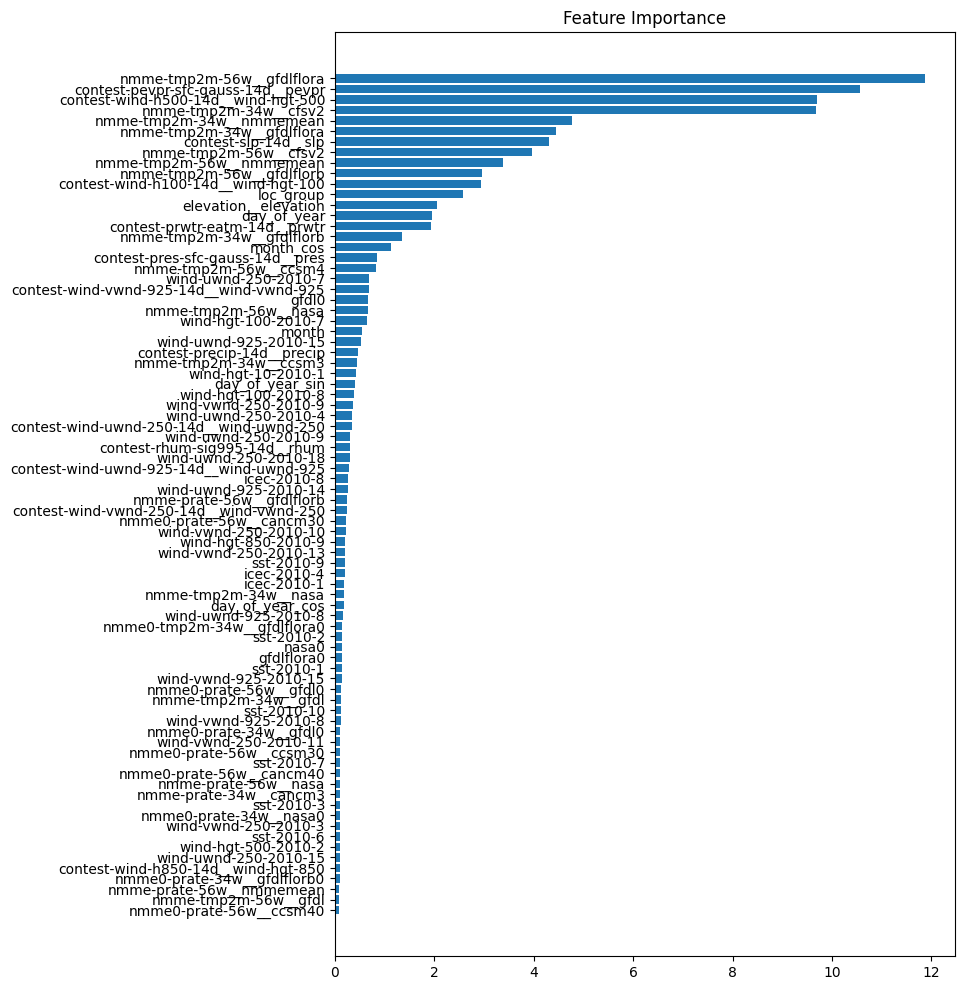

In [26]:
import matplotlib.pyplot as plt
feature_importance = bst.feature_importances_
max_features = 80
sorted_idx = np.argsort(feature_importance)[-max_features:]
fig = plt.figure(figsize=(8, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

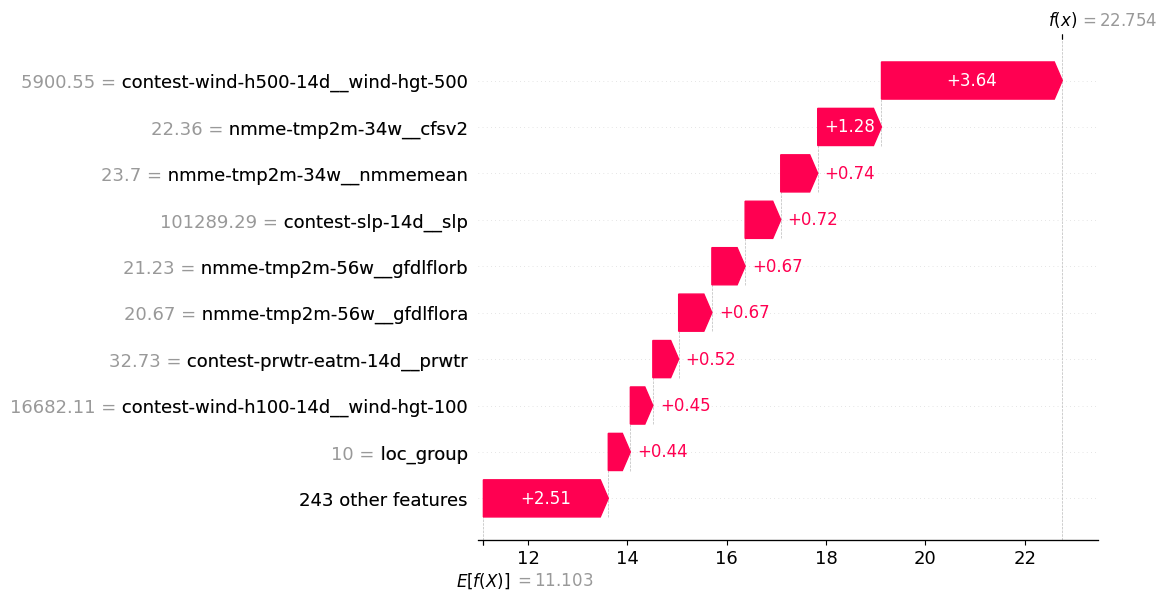

In [28]:
import shap

explainer = shap.Explainer(bst)
shap_values = explainer(X1)

shap.plots.waterfall(shap_values[0])

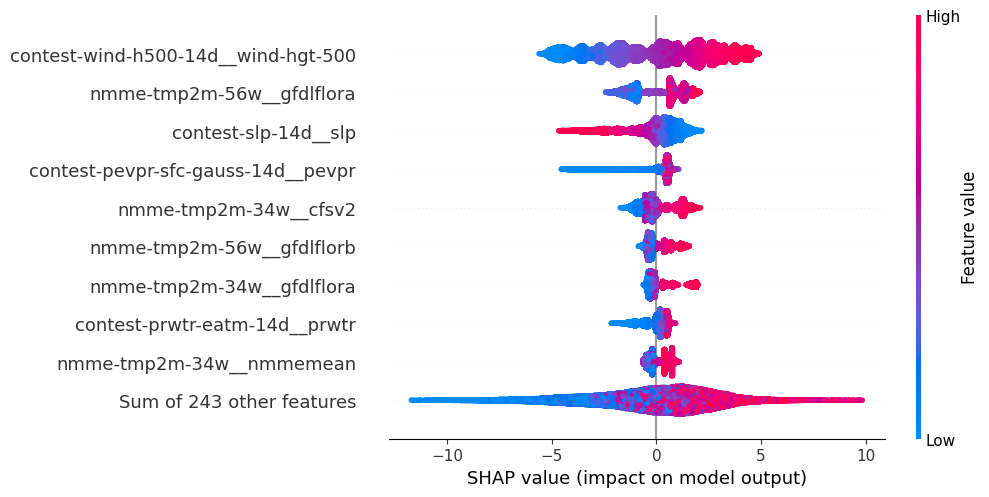

In [29]:
shap.plots.beeswarm(shap_values)

In [30]:
selected_cols = np.array(X_val.columns)[sorted_idx]
selected_cols

array(['nmme0-prate-56w__ccsm40', 'nmme-tmp2m-56w__gfdl',
       'nmme-prate-56w__nmmemean', 'nmme0-prate-34w__gfdlflorb0',
       'contest-wind-h850-14d__wind-hgt-850', 'wind-uwnd-250-2010-15',
       'wind-hgt-500-2010-2', 'sst-2010-6', 'wind-vwnd-250-2010-3',
       'nmme0-prate-34w__nasa0', 'sst-2010-3', 'nmme-prate-34w__cancm3',
       'nmme-prate-56w__nasa', 'nmme0-prate-56w__cancm40', 'sst-2010-7',
       'nmme0-prate-56w__ccsm30', 'wind-vwnd-250-2010-11',
       'nmme0-prate-34w__gfdl0', 'wind-vwnd-925-2010-8', 'sst-2010-10',
       'nmme-tmp2m-34w__gfdl', 'nmme0-prate-56w__gfdl0',
       'wind-vwnd-925-2010-15', 'sst-2010-1', 'gfdlflora0', 'nasa0',
       'sst-2010-2', 'nmme0-tmp2m-34w__gfdlflora0',
       'wind-uwnd-925-2010-8', 'day_of_year_cos', 'nmme-tmp2m-34w__nasa',
       'icec-2010-1', 'icec-2010-4', 'sst-2010-9',
       'wind-vwnd-250-2010-13', 'wind-hgt-850-2010-9',
       'wind-vwnd-250-2010-10', 'nmme0-prate-56w__cancm30',
       'contest-wind-vwnd-250-14d__wind-vw

In [31]:
X = train_df[selected_cols].values
y = train_df[target].values

skf = KFold(n_splits=5, random_state=2048, shuffle=True)
skf.get_n_splits(X, y)

train_index_list = []
test_index_list = []
train_x_list = []
val_x_list = []
train_y_list = []
val_y_list = []

for i, (train_index, test_index) in tqdm(enumerate(skf.split(X, y))):
    train_index_list.append(train_index)
    test_index_list.append(test_index)

    train_x_list.append(X[train_index, :])
    val_x_list.append(X[test_index, :])
    train_y_list.append(y[train_index])
    val_y_list.append(y[test_index])    
def train_catboost(x, y):
    print(x.shape, y.shape)
    
    cat_models = []
    for i in tqdm(range(5)):
        train_x, val_x = train_x_list[i], val_x_list[i]
        train_y, val_y = train_y_list[i], val_y_list[i]
        clf = CatBoostRegressor(iterations=5000, verbose=200, task_type="GPU",
                           devices='0:1')
        clf.fit(train_x, train_y, eval_set=[(val_x, val_y)], verbose=True, early_stopping_rounds=100)
        cat_models.append(clf)
    
    return cat_models
cat_models = train_catboost(X, y)

5it [00:00, 16.08it/s]


(139621, 80) (139621,)


  0%|                                                                                                | 0/5 [00:00<?, ?it/s]Warning: less than 75% gpu memory available for training. Free: 2140.5625 Total: 24268.3125


Learning rate set to 0.065327
0:	learn: 8.8475045	test: 8.8627418	best: 8.8627418 (0)	total: 33.5ms	remaining: 2m 47s
1:	learn: 8.3342295	test: 8.3471893	best: 8.3471893 (1)	total: 37.1ms	remaining: 1m 32s
2:	learn: 7.8588491	test: 7.8702737	best: 7.8702737 (2)	total: 40.6ms	remaining: 1m 7s
3:	learn: 7.4130446	test: 7.4219399	best: 7.4219399 (3)	total: 44.2ms	remaining: 55.2s
4:	learn: 6.9992044	test: 7.0065706	best: 7.0065706 (4)	total: 47.7ms	remaining: 47.7s
5:	learn: 6.6124465	test: 6.6185620	best: 6.6185620 (5)	total: 51.3ms	remaining: 42.7s
6:	learn: 6.2505934	test: 6.2561272	best: 6.2561272 (6)	total: 54.8ms	remaining: 39.1s
7:	learn: 5.9138060	test: 5.9182571	best: 5.9182571 (7)	total: 58.4ms	remaining: 36.5s
8:	learn: 5.5979480	test: 5.6017235	best: 5.6017235 (8)	total: 62ms	remaining: 34.4s
9:	learn: 5.3051195	test: 5.3082392	best: 5.3082392 (9)	total: 65.6ms	remaining: 32.8s
10:	learn: 5.0263828	test: 5.0285919	best: 5.0285919 (10)	total: 69.2ms	remaining: 31.4s
11:	learn: 

97:	learn: 1.2458099	test: 1.2560190	best: 1.2560190 (97)	total: 435ms	remaining: 21.8s
98:	learn: 1.2423912	test: 1.2524923	best: 1.2524923 (98)	total: 454ms	remaining: 22.5s
99:	learn: 1.2381795	test: 1.2482577	best: 1.2482577 (99)	total: 504ms	remaining: 24.7s
100:	learn: 1.2332145	test: 1.2431782	best: 1.2431782 (100)	total: 544ms	remaining: 26.4s
101:	learn: 1.2298714	test: 1.2395565	best: 1.2395565 (101)	total: 655ms	remaining: 31.5s
102:	learn: 1.2262260	test: 1.2361876	best: 1.2361876 (102)	total: 674ms	remaining: 32.1s
103:	learn: 1.2224147	test: 1.2324136	best: 1.2324136 (103)	total: 688ms	remaining: 32.4s
104:	learn: 1.2182746	test: 1.2282934	best: 1.2282934 (104)	total: 706ms	remaining: 32.9s
105:	learn: 1.2132014	test: 1.2235224	best: 1.2235224 (105)	total: 861ms	remaining: 39.8s
106:	learn: 1.2102777	test: 1.2207787	best: 1.2207787 (106)	total: 942ms	remaining: 43.1s
107:	learn: 1.2076613	test: 1.2183423	best: 1.2183423 (107)	total: 1.08s	remaining: 48.9s
108:	learn: 1.20

191:	learn: 0.9959288	test: 1.0103625	best: 1.0103625 (191)	total: 3.46s	remaining: 1m 26s
192:	learn: 0.9939575	test: 1.0084855	best: 1.0084855 (192)	total: 3.46s	remaining: 1m 26s
193:	learn: 0.9920606	test: 1.0067321	best: 1.0067321 (193)	total: 3.47s	remaining: 1m 25s
194:	learn: 0.9899766	test: 1.0046579	best: 1.0046579 (194)	total: 3.48s	remaining: 1m 25s
195:	learn: 0.9885381	test: 1.0032207	best: 1.0032207 (195)	total: 3.48s	remaining: 1m 25s
196:	learn: 0.9863898	test: 1.0011720	best: 1.0011720 (196)	total: 3.49s	remaining: 1m 25s
197:	learn: 0.9846051	test: 0.9992963	best: 0.9992963 (197)	total: 3.49s	remaining: 1m 24s
198:	learn: 0.9826598	test: 0.9973621	best: 0.9973621 (198)	total: 3.5s	remaining: 1m 24s
199:	learn: 0.9807072	test: 0.9953629	best: 0.9953629 (199)	total: 3.5s	remaining: 1m 24s
200:	learn: 0.9787225	test: 0.9934483	best: 0.9934483 (200)	total: 3.5s	remaining: 1m 23s
201:	learn: 0.9774606	test: 0.9922234	best: 0.9922234 (201)	total: 3.51s	remaining: 1m 23s
20

324:	learn: 0.8077446	test: 0.8248523	best: 0.8248523 (324)	total: 5.01s	remaining: 1m 12s
325:	learn: 0.8068741	test: 0.8239810	best: 0.8239810 (325)	total: 5.01s	remaining: 1m 11s
326:	learn: 0.8059777	test: 0.8229745	best: 0.8229745 (326)	total: 5.02s	remaining: 1m 11s
327:	learn: 0.8049234	test: 0.8221062	best: 0.8221062 (327)	total: 5.02s	remaining: 1m 11s
328:	learn: 0.8041458	test: 0.8212247	best: 0.8212247 (328)	total: 5.03s	remaining: 1m 11s
329:	learn: 0.8030834	test: 0.8201563	best: 0.8201563 (329)	total: 5.04s	remaining: 1m 11s
330:	learn: 0.8023630	test: 0.8194963	best: 0.8194963 (330)	total: 5.04s	remaining: 1m 11s
331:	learn: 0.8015297	test: 0.8187382	best: 0.8187382 (331)	total: 5.05s	remaining: 1m 10s
332:	learn: 0.8007196	test: 0.8178880	best: 0.8178880 (332)	total: 5.05s	remaining: 1m 10s
333:	learn: 0.7999133	test: 0.8171926	best: 0.8171926 (333)	total: 5.05s	remaining: 1m 10s
334:	learn: 0.7987673	test: 0.8161071	best: 0.8161071 (334)	total: 5.06s	remaining: 1m 10s

456:	learn: 0.6964216	test: 0.7151764	best: 0.7151764 (456)	total: 5.61s	remaining: 55.8s
457:	learn: 0.6955269	test: 0.7142819	best: 0.7142819 (457)	total: 5.62s	remaining: 55.7s
458:	learn: 0.6949750	test: 0.7137639	best: 0.7137639 (458)	total: 5.62s	remaining: 55.6s
459:	learn: 0.6942567	test: 0.7130836	best: 0.7130836 (459)	total: 5.62s	remaining: 55.5s
460:	learn: 0.6938001	test: 0.7126805	best: 0.7126805 (460)	total: 5.63s	remaining: 55.4s
461:	learn: 0.6929621	test: 0.7119585	best: 0.7119585 (461)	total: 5.63s	remaining: 55.3s
462:	learn: 0.6925202	test: 0.7115520	best: 0.7115520 (462)	total: 5.63s	remaining: 55.2s
463:	learn: 0.6917471	test: 0.7107562	best: 0.7107562 (463)	total: 5.64s	remaining: 55.1s
464:	learn: 0.6910470	test: 0.7100596	best: 0.7100596 (464)	total: 5.64s	remaining: 55s
465:	learn: 0.6904301	test: 0.7094139	best: 0.7094139 (465)	total: 5.64s	remaining: 54.9s
466:	learn: 0.6898097	test: 0.7088263	best: 0.7088263 (466)	total: 5.65s	remaining: 54.8s
467:	learn: 

561:	learn: 0.6375142	test: 0.6577336	best: 0.6577336 (561)	total: 6.8s	remaining: 53.7s
562:	learn: 0.6365267	test: 0.6567364	best: 0.6567364 (562)	total: 6.81s	remaining: 53.6s
563:	learn: 0.6359951	test: 0.6563120	best: 0.6563120 (563)	total: 6.81s	remaining: 53.6s
564:	learn: 0.6352974	test: 0.6556054	best: 0.6556054 (564)	total: 6.82s	remaining: 53.5s
565:	learn: 0.6347183	test: 0.6549623	best: 0.6549623 (565)	total: 6.82s	remaining: 53.5s
566:	learn: 0.6340941	test: 0.6543456	best: 0.6543456 (566)	total: 6.83s	remaining: 53.4s
567:	learn: 0.6336047	test: 0.6538443	best: 0.6538443 (567)	total: 6.83s	remaining: 53.3s
568:	learn: 0.6332847	test: 0.6535405	best: 0.6535405 (568)	total: 6.84s	remaining: 53.3s
569:	learn: 0.6323982	test: 0.6526784	best: 0.6526784 (569)	total: 6.85s	remaining: 53.2s
570:	learn: 0.6319527	test: 0.6522364	best: 0.6522364 (570)	total: 6.9s	remaining: 53.5s
571:	learn: 0.6316681	test: 0.6519339	best: 0.6519339 (571)	total: 6.93s	remaining: 53.7s
572:	learn: 

672:	learn: 0.5868188	test: 0.6081499	best: 0.6081499 (672)	total: 9.14s	remaining: 58.8s
673:	learn: 0.5863596	test: 0.6076332	best: 0.6076332 (673)	total: 9.26s	remaining: 59.4s
674:	learn: 0.5860914	test: 0.6073762	best: 0.6073762 (674)	total: 9.26s	remaining: 59.4s
675:	learn: 0.5856837	test: 0.6070135	best: 0.6070135 (675)	total: 9.27s	remaining: 59.3s
676:	learn: 0.5852854	test: 0.6066175	best: 0.6066175 (676)	total: 9.27s	remaining: 59.2s
677:	learn: 0.5848031	test: 0.6061562	best: 0.6061562 (677)	total: 9.28s	remaining: 59.1s
678:	learn: 0.5844685	test: 0.6058801	best: 0.6058801 (678)	total: 9.28s	remaining: 59.1s
679:	learn: 0.5842394	test: 0.6056557	best: 0.6056557 (679)	total: 9.28s	remaining: 59s
680:	learn: 0.5837613	test: 0.6051795	best: 0.6051795 (680)	total: 9.29s	remaining: 58.9s
681:	learn: 0.5834371	test: 0.6048465	best: 0.6048465 (681)	total: 9.29s	remaining: 58.8s
682:	learn: 0.5829047	test: 0.6043608	best: 0.6043608 (682)	total: 9.29s	remaining: 58.8s
683:	learn: 

769:	learn: 0.5510042	test: 0.5736913	best: 0.5736913 (769)	total: 10.8s	remaining: 59.1s
770:	learn: 0.5506576	test: 0.5733454	best: 0.5733454 (770)	total: 10.8s	remaining: 59.1s
771:	learn: 0.5503157	test: 0.5729993	best: 0.5729993 (771)	total: 10.8s	remaining: 59s
772:	learn: 0.5500936	test: 0.5727832	best: 0.5727832 (772)	total: 10.8s	remaining: 59s
773:	learn: 0.5497717	test: 0.5724525	best: 0.5724525 (773)	total: 10.8s	remaining: 58.9s
774:	learn: 0.5495767	test: 0.5722472	best: 0.5722472 (774)	total: 10.8s	remaining: 58.8s
775:	learn: 0.5491399	test: 0.5717789	best: 0.5717789 (775)	total: 10.8s	remaining: 58.8s
776:	learn: 0.5488191	test: 0.5714307	best: 0.5714307 (776)	total: 10.8s	remaining: 58.7s
777:	learn: 0.5485336	test: 0.5711166	best: 0.5711166 (777)	total: 10.8s	remaining: 58.6s
778:	learn: 0.5481703	test: 0.5708192	best: 0.5708192 (778)	total: 10.8s	remaining: 58.6s
779:	learn: 0.5478489	test: 0.5705324	best: 0.5705324 (779)	total: 10.8s	remaining: 58.5s
780:	learn: 0.

874:	learn: 0.5193774	test: 0.5433218	best: 0.5433218 (874)	total: 11.7s	remaining: 55.2s
875:	learn: 0.5190265	test: 0.5429587	best: 0.5429587 (875)	total: 11.7s	remaining: 55.2s
876:	learn: 0.5186861	test: 0.5426513	best: 0.5426513 (876)	total: 11.7s	remaining: 55.2s
877:	learn: 0.5184142	test: 0.5423940	best: 0.5423940 (877)	total: 11.8s	remaining: 55.6s
878:	learn: 0.5181933	test: 0.5421996	best: 0.5421996 (878)	total: 11.9s	remaining: 55.9s
879:	learn: 0.5178135	test: 0.5418288	best: 0.5418288 (879)	total: 11.9s	remaining: 55.8s
880:	learn: 0.5175775	test: 0.5416183	best: 0.5416183 (880)	total: 11.9s	remaining: 55.7s
881:	learn: 0.5173301	test: 0.5414481	best: 0.5414481 (881)	total: 11.9s	remaining: 55.7s
882:	learn: 0.5171046	test: 0.5412200	best: 0.5412200 (882)	total: 11.9s	remaining: 55.6s
883:	learn: 0.5167808	test: 0.5408864	best: 0.5408864 (883)	total: 11.9s	remaining: 55.6s
884:	learn: 0.5166236	test: 0.5407200	best: 0.5407200 (884)	total: 12s	remaining: 55.6s
885:	learn: 

969:	learn: 0.4950373	test: 0.5201590	best: 0.5201590 (969)	total: 15.7s	remaining: 1m 5s
970:	learn: 0.4947990	test: 0.5199543	best: 0.5199543 (970)	total: 15.7s	remaining: 1m 5s
971:	learn: 0.4945307	test: 0.5196866	best: 0.5196866 (971)	total: 15.8s	remaining: 1m 5s
972:	learn: 0.4943024	test: 0.5194955	best: 0.5194955 (972)	total: 16s	remaining: 1m 6s
973:	learn: 0.4938750	test: 0.5190985	best: 0.5190985 (973)	total: 16s	remaining: 1m 6s
974:	learn: 0.4936645	test: 0.5188878	best: 0.5188878 (974)	total: 16s	remaining: 1m 6s
975:	learn: 0.4933769	test: 0.5185589	best: 0.5185589 (975)	total: 16.1s	remaining: 1m 6s
976:	learn: 0.4931544	test: 0.5183579	best: 0.5183579 (976)	total: 16.1s	remaining: 1m 6s
977:	learn: 0.4929182	test: 0.5181238	best: 0.5181238 (977)	total: 16.1s	remaining: 1m 6s
978:	learn: 0.4927598	test: 0.5179378	best: 0.5179378 (978)	total: 16.2s	remaining: 1m 6s
979:	learn: 0.4925051	test: 0.5176883	best: 0.5176883 (979)	total: 16.2s	remaining: 1m 6s
980:	learn: 0.49

1084:	learn: 0.4698090	test: 0.4960462	best: 0.4960462 (1084)	total: 18.5s	remaining: 1m 6s
1085:	learn: 0.4696198	test: 0.4958560	best: 0.4958560 (1085)	total: 18.5s	remaining: 1m 6s
1086:	learn: 0.4694389	test: 0.4957067	best: 0.4957067 (1086)	total: 18.5s	remaining: 1m 6s
1087:	learn: 0.4692958	test: 0.4955725	best: 0.4955725 (1087)	total: 18.5s	remaining: 1m 6s
1088:	learn: 0.4690884	test: 0.4953657	best: 0.4953657 (1088)	total: 18.5s	remaining: 1m 6s
1089:	learn: 0.4689828	test: 0.4952595	best: 0.4952595 (1089)	total: 18.5s	remaining: 1m 6s
1090:	learn: 0.4688337	test: 0.4951168	best: 0.4951168 (1090)	total: 18.5s	remaining: 1m 6s
1091:	learn: 0.4686851	test: 0.4949798	best: 0.4949798 (1091)	total: 18.5s	remaining: 1m 6s
1092:	learn: 0.4684413	test: 0.4947292	best: 0.4947292 (1092)	total: 18.5s	remaining: 1m 6s
1093:	learn: 0.4682363	test: 0.4945173	best: 0.4945173 (1093)	total: 18.5s	remaining: 1m 6s
1094:	learn: 0.4679906	test: 0.4943236	best: 0.4943236 (1094)	total: 18.5s	remai

1213:	learn: 0.4461715	test: 0.4742551	best: 0.4742551 (1213)	total: 19.9s	remaining: 1m 2s
1214:	learn: 0.4460214	test: 0.4740957	best: 0.4740957 (1214)	total: 20s	remaining: 1m 2s
1215:	learn: 0.4458695	test: 0.4739510	best: 0.4739510 (1215)	total: 20s	remaining: 1m 2s
1216:	learn: 0.4456595	test: 0.4737557	best: 0.4737557 (1216)	total: 20s	remaining: 1m 2s
1217:	learn: 0.4454445	test: 0.4735790	best: 0.4735790 (1217)	total: 20s	remaining: 1m 2s
1218:	learn: 0.4453077	test: 0.4734619	best: 0.4734619 (1218)	total: 20s	remaining: 1m 1s
1219:	learn: 0.4451528	test: 0.4733167	best: 0.4733167 (1219)	total: 20s	remaining: 1m 1s
1220:	learn: 0.4448990	test: 0.4731051	best: 0.4731051 (1220)	total: 20s	remaining: 1m 1s
1221:	learn: 0.4446950	test: 0.4729195	best: 0.4729195 (1221)	total: 20s	remaining: 1m 1s
1222:	learn: 0.4445695	test: 0.4727977	best: 0.4727977 (1222)	total: 20s	remaining: 1m 1s
1223:	learn: 0.4443908	test: 0.4726304	best: 0.4726304 (1223)	total: 20s	remaining: 1m 1s
1224:	le

1308:	learn: 0.4305306	test: 0.4596265	best: 0.4596265 (1308)	total: 22.2s	remaining: 1m 2s
1309:	learn: 0.4303772	test: 0.4595018	best: 0.4595018 (1309)	total: 22.2s	remaining: 1m 2s
1310:	learn: 0.4302754	test: 0.4594038	best: 0.4594038 (1310)	total: 22.3s	remaining: 1m 2s
1311:	learn: 0.4301516	test: 0.4593091	best: 0.4593091 (1311)	total: 22.4s	remaining: 1m 2s
1312:	learn: 0.4300018	test: 0.4592134	best: 0.4592134 (1312)	total: 22.4s	remaining: 1m 2s
1313:	learn: 0.4299085	test: 0.4591213	best: 0.4591213 (1313)	total: 22.5s	remaining: 1m 3s
1314:	learn: 0.4297638	test: 0.4589644	best: 0.4589644 (1314)	total: 22.5s	remaining: 1m 3s
1315:	learn: 0.4295595	test: 0.4587338	best: 0.4587338 (1315)	total: 22.5s	remaining: 1m 3s
1316:	learn: 0.4293681	test: 0.4585785	best: 0.4585785 (1316)	total: 22.6s	remaining: 1m 3s
1317:	learn: 0.4291806	test: 0.4583991	best: 0.4583991 (1317)	total: 22.6s	remaining: 1m 3s
1318:	learn: 0.4290474	test: 0.4582783	best: 0.4582783 (1318)	total: 22.7s	remai

1398:	learn: 0.4172936	test: 0.4472673	best: 0.4472673 (1398)	total: 27s	remaining: 1m 9s
1399:	learn: 0.4171495	test: 0.4471306	best: 0.4471306 (1399)	total: 27.1s	remaining: 1m 9s
1400:	learn: 0.4170246	test: 0.4470043	best: 0.4470043 (1400)	total: 27.2s	remaining: 1m 9s
1401:	learn: 0.4167781	test: 0.4467804	best: 0.4467804 (1401)	total: 27.2s	remaining: 1m 9s
1402:	learn: 0.4166436	test: 0.4466484	best: 0.4466484 (1402)	total: 27.2s	remaining: 1m 9s
1403:	learn: 0.4165348	test: 0.4465080	best: 0.4465080 (1403)	total: 27.3s	remaining: 1m 9s
1404:	learn: 0.4164193	test: 0.4464044	best: 0.4464044 (1404)	total: 27.4s	remaining: 1m 10s
1405:	learn: 0.4162823	test: 0.4462511	best: 0.4462511 (1405)	total: 27.4s	remaining: 1m 10s
1406:	learn: 0.4162005	test: 0.4461588	best: 0.4461588 (1406)	total: 27.4s	remaining: 1m 10s
1407:	learn: 0.4160585	test: 0.4460288	best: 0.4460288 (1407)	total: 27.4s	remaining: 1m 10s
1408:	learn: 0.4159026	test: 0.4458603	best: 0.4458603 (1408)	total: 27.5s	rem

1489:	learn: 0.4045433	test: 0.4355383	best: 0.4355383 (1489)	total: 32.1s	remaining: 1m 15s
1490:	learn: 0.4044032	test: 0.4354321	best: 0.4354321 (1490)	total: 32.2s	remaining: 1m 15s
1491:	learn: 0.4043412	test: 0.4353660	best: 0.4353660 (1491)	total: 32.2s	remaining: 1m 15s
1492:	learn: 0.4042143	test: 0.4352682	best: 0.4352682 (1492)	total: 32.3s	remaining: 1m 15s
1493:	learn: 0.4040859	test: 0.4351556	best: 0.4351556 (1493)	total: 32.3s	remaining: 1m 15s
1494:	learn: 0.4039770	test: 0.4350470	best: 0.4350470 (1494)	total: 32.3s	remaining: 1m 15s
1495:	learn: 0.4038665	test: 0.4349707	best: 0.4349707 (1495)	total: 32.4s	remaining: 1m 15s
1496:	learn: 0.4037769	test: 0.4348876	best: 0.4348876 (1496)	total: 32.4s	remaining: 1m 15s
1497:	learn: 0.4036541	test: 0.4347638	best: 0.4347638 (1497)	total: 32.5s	remaining: 1m 15s
1498:	learn: 0.4035275	test: 0.4346356	best: 0.4346356 (1498)	total: 32.5s	remaining: 1m 15s
1499:	learn: 0.4033911	test: 0.4345131	best: 0.4345131 (1499)	total: 3

1603:	learn: 0.3907902	test: 0.4226274	best: 0.4226274 (1603)	total: 36.4s	remaining: 1m 17s
1604:	learn: 0.3906697	test: 0.4225199	best: 0.4225199 (1604)	total: 36.5s	remaining: 1m 17s
1605:	learn: 0.3905402	test: 0.4223619	best: 0.4223619 (1605)	total: 36.5s	remaining: 1m 17s
1606:	learn: 0.3904390	test: 0.4222856	best: 0.4222856 (1606)	total: 36.5s	remaining: 1m 16s
1607:	learn: 0.3903363	test: 0.4221773	best: 0.4221773 (1607)	total: 36.5s	remaining: 1m 16s
1608:	learn: 0.3902132	test: 0.4220689	best: 0.4220689 (1608)	total: 36.5s	remaining: 1m 16s
1609:	learn: 0.3901079	test: 0.4219728	best: 0.4219728 (1609)	total: 36.5s	remaining: 1m 16s
1610:	learn: 0.3899901	test: 0.4218761	best: 0.4218761 (1610)	total: 36.5s	remaining: 1m 16s
1611:	learn: 0.3898836	test: 0.4217580	best: 0.4217580 (1611)	total: 36.5s	remaining: 1m 16s
1612:	learn: 0.3897436	test: 0.4216370	best: 0.4216370 (1612)	total: 36.5s	remaining: 1m 16s
1613:	learn: 0.3896077	test: 0.4214900	best: 0.4214900 (1613)	total: 3

1706:	learn: 0.3794073	test: 0.4119998	best: 0.4119998 (1706)	total: 37.1s	remaining: 1m 11s
1707:	learn: 0.3793178	test: 0.4119230	best: 0.4119230 (1707)	total: 37.1s	remaining: 1m 11s
1708:	learn: 0.3791890	test: 0.4117976	best: 0.4117976 (1708)	total: 37.2s	remaining: 1m 11s
1709:	learn: 0.3790943	test: 0.4117042	best: 0.4117042 (1709)	total: 37.2s	remaining: 1m 11s
1710:	learn: 0.3789746	test: 0.4115996	best: 0.4115996 (1710)	total: 37.3s	remaining: 1m 11s
1711:	learn: 0.3788747	test: 0.4115027	best: 0.4115027 (1711)	total: 37.4s	remaining: 1m 11s
1712:	learn: 0.3787743	test: 0.4114127	best: 0.4114127 (1712)	total: 37.4s	remaining: 1m 11s
1713:	learn: 0.3785985	test: 0.4112305	best: 0.4112305 (1713)	total: 37.4s	remaining: 1m 11s
1714:	learn: 0.3784748	test: 0.4111488	best: 0.4111488 (1714)	total: 37.4s	remaining: 1m 11s
1715:	learn: 0.3783925	test: 0.4110864	best: 0.4110864 (1715)	total: 37.5s	remaining: 1m 11s
1716:	learn: 0.3782653	test: 0.4109883	best: 0.4109883 (1716)	total: 3

1798:	learn: 0.3698017	test: 0.4031587	best: 0.4031587 (1798)	total: 41.8s	remaining: 1m 14s
1799:	learn: 0.3697142	test: 0.4030702	best: 0.4030702 (1799)	total: 41.9s	remaining: 1m 14s
1800:	learn: 0.3696334	test: 0.4029930	best: 0.4029930 (1800)	total: 41.9s	remaining: 1m 14s
1801:	learn: 0.3695404	test: 0.4028947	best: 0.4028947 (1801)	total: 42s	remaining: 1m 14s
1802:	learn: 0.3694692	test: 0.4028254	best: 0.4028254 (1802)	total: 42s	remaining: 1m 14s
1803:	learn: 0.3693790	test: 0.4027392	best: 0.4027392 (1803)	total: 42.1s	remaining: 1m 14s
1804:	learn: 0.3692459	test: 0.4025981	best: 0.4025981 (1804)	total: 42.1s	remaining: 1m 14s
1805:	learn: 0.3691354	test: 0.4025173	best: 0.4025173 (1805)	total: 42.2s	remaining: 1m 14s
1806:	learn: 0.3690525	test: 0.4024414	best: 0.4024414 (1806)	total: 42.3s	remaining: 1m 14s
1807:	learn: 0.3689461	test: 0.4023576	best: 0.4023576 (1807)	total: 42.3s	remaining: 1m 14s
1808:	learn: 0.3688419	test: 0.4022530	best: 0.4022530 (1808)	total: 42.3s

1889:	learn: 0.3614328	test: 0.3955313	best: 0.3955313 (1889)	total: 47.1s	remaining: 1m 17s
1890:	learn: 0.3613623	test: 0.3954735	best: 0.3954735 (1890)	total: 47.2s	remaining: 1m 17s
1891:	learn: 0.3612755	test: 0.3954098	best: 0.3954098 (1891)	total: 47.2s	remaining: 1m 17s
1892:	learn: 0.3612021	test: 0.3953386	best: 0.3953386 (1892)	total: 47.2s	remaining: 1m 17s
1893:	learn: 0.3610813	test: 0.3952016	best: 0.3952016 (1893)	total: 47.3s	remaining: 1m 17s
1894:	learn: 0.3609189	test: 0.3950590	best: 0.3950590 (1894)	total: 47.3s	remaining: 1m 17s
1895:	learn: 0.3606629	test: 0.3948161	best: 0.3948161 (1895)	total: 47.4s	remaining: 1m 17s
1896:	learn: 0.3605624	test: 0.3947365	best: 0.3947365 (1896)	total: 47.4s	remaining: 1m 17s
1897:	learn: 0.3604537	test: 0.3946318	best: 0.3946318 (1897)	total: 47.5s	remaining: 1m 17s
1898:	learn: 0.3603646	test: 0.3945539	best: 0.3945539 (1898)	total: 47.5s	remaining: 1m 17s
1899:	learn: 0.3602822	test: 0.3944673	best: 0.3944673 (1899)	total: 4

1979:	learn: 0.3532045	test: 0.3879564	best: 0.3879564 (1979)	total: 51.7s	remaining: 1m 18s
1980:	learn: 0.3530850	test: 0.3878417	best: 0.3878417 (1980)	total: 51.7s	remaining: 1m 18s
1981:	learn: 0.3529817	test: 0.3877314	best: 0.3877314 (1981)	total: 51.8s	remaining: 1m 18s
1982:	learn: 0.3529079	test: 0.3876661	best: 0.3876661 (1982)	total: 52s	remaining: 1m 19s
1983:	learn: 0.3528447	test: 0.3876175	best: 0.3876175 (1983)	total: 52s	remaining: 1m 18s
1984:	learn: 0.3527743	test: 0.3875707	best: 0.3875707 (1984)	total: 52s	remaining: 1m 18s
1985:	learn: 0.3526976	test: 0.3874944	best: 0.3874944 (1985)	total: 52.1s	remaining: 1m 19s
1986:	learn: 0.3526162	test: 0.3874013	best: 0.3874013 (1986)	total: 52.2s	remaining: 1m 19s
1987:	learn: 0.3525178	test: 0.3873270	best: 0.3873270 (1987)	total: 52.2s	remaining: 1m 19s
1988:	learn: 0.3524326	test: 0.3872591	best: 0.3872591 (1988)	total: 52.2s	remaining: 1m 19s
1989:	learn: 0.3523536	test: 0.3871739	best: 0.3871739 (1989)	total: 52.3s	r

2072:	learn: 0.3451944	test: 0.3806224	best: 0.3806224 (2072)	total: 56.6s	remaining: 1m 19s
2073:	learn: 0.3451129	test: 0.3805392	best: 0.3805392 (2073)	total: 56.6s	remaining: 1m 19s
2074:	learn: 0.3450733	test: 0.3805097	best: 0.3805097 (2074)	total: 56.7s	remaining: 1m 19s
2075:	learn: 0.3449790	test: 0.3804488	best: 0.3804488 (2075)	total: 56.8s	remaining: 1m 19s
2076:	learn: 0.3448920	test: 0.3803584	best: 0.3803584 (2076)	total: 56.8s	remaining: 1m 19s
2077:	learn: 0.3448329	test: 0.3803068	best: 0.3803068 (2077)	total: 56.9s	remaining: 1m 19s
2078:	learn: 0.3447562	test: 0.3802400	best: 0.3802400 (2078)	total: 56.9s	remaining: 1m 19s
2079:	learn: 0.3446829	test: 0.3801784	best: 0.3801784 (2079)	total: 56.9s	remaining: 1m 19s
2080:	learn: 0.3446273	test: 0.3801204	best: 0.3801204 (2080)	total: 57s	remaining: 1m 19s
2081:	learn: 0.3445710	test: 0.3800688	best: 0.3800688 (2081)	total: 57s	remaining: 1m 19s
2082:	learn: 0.3445083	test: 0.3800126	best: 0.3800126 (2082)	total: 57s	r

2161:	learn: 0.3385134	test: 0.3746331	best: 0.3746331 (2161)	total: 1m 1s	remaining: 1m 20s
2162:	learn: 0.3384320	test: 0.3745513	best: 0.3745513 (2162)	total: 1m 1s	remaining: 1m 20s
2163:	learn: 0.3383771	test: 0.3745149	best: 0.3745149 (2163)	total: 1m 1s	remaining: 1m 20s
2164:	learn: 0.3382676	test: 0.3743951	best: 0.3743951 (2164)	total: 1m 1s	remaining: 1m 20s
2165:	learn: 0.3381749	test: 0.3743103	best: 0.3743103 (2165)	total: 1m 1s	remaining: 1m 20s
2166:	learn: 0.3380833	test: 0.3742120	best: 0.3742120 (2166)	total: 1m 1s	remaining: 1m 20s
2167:	learn: 0.3380256	test: 0.3741495	best: 0.3741495 (2167)	total: 1m 1s	remaining: 1m 20s
2168:	learn: 0.3379624	test: 0.3740906	best: 0.3740906 (2168)	total: 1m 1s	remaining: 1m 20s
2169:	learn: 0.3378867	test: 0.3740130	best: 0.3740130 (2169)	total: 1m 1s	remaining: 1m 20s
2170:	learn: 0.3378350	test: 0.3739609	best: 0.3739609 (2170)	total: 1m 1s	remaining: 1m 20s
2171:	learn: 0.3377664	test: 0.3739079	best: 0.3739079 (2171)	total: 1

2255:	learn: 0.3314976	test: 0.3680422	best: 0.3680422 (2255)	total: 1m 5s	remaining: 1m 19s
2256:	learn: 0.3314377	test: 0.3679951	best: 0.3679951 (2256)	total: 1m 5s	remaining: 1m 19s
2257:	learn: 0.3313456	test: 0.3678993	best: 0.3678993 (2257)	total: 1m 5s	remaining: 1m 19s
2258:	learn: 0.3312448	test: 0.3678194	best: 0.3678194 (2258)	total: 1m 5s	remaining: 1m 19s
2259:	learn: 0.3311625	test: 0.3677546	best: 0.3677546 (2259)	total: 1m 5s	remaining: 1m 19s
2260:	learn: 0.3310637	test: 0.3676778	best: 0.3676778 (2260)	total: 1m 5s	remaining: 1m 19s
2261:	learn: 0.3310177	test: 0.3676208	best: 0.3676208 (2261)	total: 1m 6s	remaining: 1m 19s
2262:	learn: 0.3309467	test: 0.3675518	best: 0.3675518 (2262)	total: 1m 6s	remaining: 1m 19s
2263:	learn: 0.3308759	test: 0.3674975	best: 0.3674975 (2263)	total: 1m 6s	remaining: 1m 19s
2264:	learn: 0.3308134	test: 0.3674384	best: 0.3674384 (2264)	total: 1m 6s	remaining: 1m 19s
2265:	learn: 0.3307343	test: 0.3673703	best: 0.3673703 (2265)	total: 1

2348:	learn: 0.3251106	test: 0.3621809	best: 0.3621809 (2348)	total: 1m 10s	remaining: 1m 20s
2349:	learn: 0.3250628	test: 0.3621353	best: 0.3621353 (2349)	total: 1m 10s	remaining: 1m 20s
2350:	learn: 0.3249813	test: 0.3620608	best: 0.3620608 (2350)	total: 1m 11s	remaining: 1m 20s
2351:	learn: 0.3249136	test: 0.3619989	best: 0.3619989 (2351)	total: 1m 11s	remaining: 1m 20s
2352:	learn: 0.3248363	test: 0.3619245	best: 0.3619245 (2352)	total: 1m 11s	remaining: 1m 20s
2353:	learn: 0.3247481	test: 0.3618357	best: 0.3618357 (2353)	total: 1m 11s	remaining: 1m 20s
2354:	learn: 0.3246599	test: 0.3617474	best: 0.3617474 (2354)	total: 1m 11s	remaining: 1m 20s
2355:	learn: 0.3245909	test: 0.3616582	best: 0.3616582 (2355)	total: 1m 11s	remaining: 1m 20s
2356:	learn: 0.3245044	test: 0.3615664	best: 0.3615664 (2356)	total: 1m 11s	remaining: 1m 20s
2357:	learn: 0.3244484	test: 0.3615170	best: 0.3615170 (2357)	total: 1m 11s	remaining: 1m 20s
2358:	learn: 0.3243702	test: 0.3614406	best: 0.3614406 (2358

2440:	learn: 0.3190551	test: 0.3564837	best: 0.3564837 (2440)	total: 1m 14s	remaining: 1m 18s
2441:	learn: 0.3190110	test: 0.3564383	best: 0.3564383 (2441)	total: 1m 14s	remaining: 1m 18s
2442:	learn: 0.3189803	test: 0.3564069	best: 0.3564069 (2442)	total: 1m 14s	remaining: 1m 18s
2443:	learn: 0.3189362	test: 0.3563764	best: 0.3563764 (2443)	total: 1m 14s	remaining: 1m 18s
2444:	learn: 0.3188789	test: 0.3563283	best: 0.3563283 (2444)	total: 1m 14s	remaining: 1m 18s
2445:	learn: 0.3188133	test: 0.3562456	best: 0.3562456 (2445)	total: 1m 14s	remaining: 1m 18s
2446:	learn: 0.3187650	test: 0.3562073	best: 0.3562073 (2446)	total: 1m 14s	remaining: 1m 18s
2447:	learn: 0.3187146	test: 0.3561712	best: 0.3561712 (2447)	total: 1m 15s	remaining: 1m 18s
2448:	learn: 0.3186442	test: 0.3560980	best: 0.3560980 (2448)	total: 1m 15s	remaining: 1m 18s
2449:	learn: 0.3185830	test: 0.3560382	best: 0.3560382 (2449)	total: 1m 15s	remaining: 1m 18s
2450:	learn: 0.3185067	test: 0.3559733	best: 0.3559733 (2450

2531:	learn: 0.3132501	test: 0.3510498	best: 0.3510498 (2531)	total: 1m 19s	remaining: 1m 17s
2532:	learn: 0.3131616	test: 0.3509733	best: 0.3509733 (2532)	total: 1m 19s	remaining: 1m 17s
2533:	learn: 0.3131184	test: 0.3509368	best: 0.3509368 (2533)	total: 1m 19s	remaining: 1m 17s
2534:	learn: 0.3130370	test: 0.3508566	best: 0.3508566 (2534)	total: 1m 19s	remaining: 1m 17s
2535:	learn: 0.3128976	test: 0.3506919	best: 0.3506919 (2535)	total: 1m 19s	remaining: 1m 17s
2536:	learn: 0.3128549	test: 0.3506466	best: 0.3506466 (2536)	total: 1m 19s	remaining: 1m 17s
2537:	learn: 0.3127870	test: 0.3505730	best: 0.3505730 (2537)	total: 1m 20s	remaining: 1m 17s
2538:	learn: 0.3127277	test: 0.3505272	best: 0.3505272 (2538)	total: 1m 20s	remaining: 1m 17s
2539:	learn: 0.3126615	test: 0.3504529	best: 0.3504529 (2539)	total: 1m 20s	remaining: 1m 17s
2540:	learn: 0.3125902	test: 0.3503903	best: 0.3503903 (2540)	total: 1m 20s	remaining: 1m 17s
2541:	learn: 0.3125388	test: 0.3503371	best: 0.3503371 (2541

2620:	learn: 0.3078766	test: 0.3461655	best: 0.3461655 (2620)	total: 1m 25s	remaining: 1m 17s
2621:	learn: 0.3078035	test: 0.3461081	best: 0.3461081 (2621)	total: 1m 25s	remaining: 1m 17s
2622:	learn: 0.3077633	test: 0.3460685	best: 0.3460685 (2622)	total: 1m 25s	remaining: 1m 17s
2623:	learn: 0.3077010	test: 0.3460144	best: 0.3460144 (2623)	total: 1m 25s	remaining: 1m 17s
2624:	learn: 0.3076525	test: 0.3459826	best: 0.3459826 (2624)	total: 1m 25s	remaining: 1m 17s
2625:	learn: 0.3075702	test: 0.3459010	best: 0.3459010 (2625)	total: 1m 25s	remaining: 1m 17s
2626:	learn: 0.3075063	test: 0.3458599	best: 0.3458599 (2626)	total: 1m 25s	remaining: 1m 17s
2627:	learn: 0.3074699	test: 0.3458224	best: 0.3458224 (2627)	total: 1m 25s	remaining: 1m 17s
2628:	learn: 0.3074226	test: 0.3457793	best: 0.3457793 (2628)	total: 1m 25s	remaining: 1m 17s
2629:	learn: 0.3073753	test: 0.3457335	best: 0.3457335 (2629)	total: 1m 25s	remaining: 1m 17s
2630:	learn: 0.3073245	test: 0.3456900	best: 0.3456900 (2630

2724:	learn: 0.3016416	test: 0.3405434	best: 0.3405434 (2724)	total: 1m 29s	remaining: 1m 14s
2725:	learn: 0.3015794	test: 0.3404823	best: 0.3404823 (2725)	total: 1m 29s	remaining: 1m 14s
2726:	learn: 0.3015204	test: 0.3404234	best: 0.3404234 (2726)	total: 1m 29s	remaining: 1m 14s
2727:	learn: 0.3014548	test: 0.3403500	best: 0.3403500 (2727)	total: 1m 29s	remaining: 1m 14s
2728:	learn: 0.3013958	test: 0.3403088	best: 0.3403088 (2728)	total: 1m 29s	remaining: 1m 14s
2729:	learn: 0.3013484	test: 0.3402631	best: 0.3402631 (2729)	total: 1m 29s	remaining: 1m 14s
2730:	learn: 0.3013113	test: 0.3402266	best: 0.3402266 (2730)	total: 1m 29s	remaining: 1m 14s
2731:	learn: 0.3012606	test: 0.3401835	best: 0.3401835 (2731)	total: 1m 29s	remaining: 1m 14s
2732:	learn: 0.3012210	test: 0.3401523	best: 0.3401523 (2732)	total: 1m 30s	remaining: 1m 14s
2733:	learn: 0.3011830	test: 0.3401228	best: 0.3401228 (2733)	total: 1m 30s	remaining: 1m 14s
2734:	learn: 0.3011441	test: 0.3400902	best: 0.3400902 (2734

2813:	learn: 0.2966437	test: 0.3360037	best: 0.3360037 (2813)	total: 1m 35s	remaining: 1m 14s
2814:	learn: 0.2965955	test: 0.3359424	best: 0.3359424 (2814)	total: 1m 35s	remaining: 1m 14s
2815:	learn: 0.2965572	test: 0.3359184	best: 0.3359184 (2815)	total: 1m 35s	remaining: 1m 14s
2816:	learn: 0.2965210	test: 0.3358854	best: 0.3358854 (2816)	total: 1m 35s	remaining: 1m 14s
2817:	learn: 0.2964639	test: 0.3358356	best: 0.3358356 (2817)	total: 1m 35s	remaining: 1m 14s
2818:	learn: 0.2964111	test: 0.3357896	best: 0.3357896 (2818)	total: 1m 36s	remaining: 1m 14s
2819:	learn: 0.2963735	test: 0.3357661	best: 0.3357661 (2819)	total: 1m 36s	remaining: 1m 14s
2820:	learn: 0.2963067	test: 0.3357048	best: 0.3357048 (2820)	total: 1m 36s	remaining: 1m 14s
2821:	learn: 0.2962514	test: 0.3356568	best: 0.3356568 (2821)	total: 1m 36s	remaining: 1m 14s
2822:	learn: 0.2961964	test: 0.3356111	best: 0.3356111 (2822)	total: 1m 36s	remaining: 1m 14s
2823:	learn: 0.2961405	test: 0.3355694	best: 0.3355694 (2823

2905:	learn: 0.2918282	test: 0.3315945	best: 0.3315945 (2905)	total: 1m 40s	remaining: 1m 12s
2906:	learn: 0.2917974	test: 0.3315633	best: 0.3315633 (2906)	total: 1m 40s	remaining: 1m 12s
2907:	learn: 0.2917530	test: 0.3315137	best: 0.3315137 (2907)	total: 1m 40s	remaining: 1m 12s
2908:	learn: 0.2916935	test: 0.3314659	best: 0.3314659 (2908)	total: 1m 40s	remaining: 1m 12s
2909:	learn: 0.2916511	test: 0.3314161	best: 0.3314161 (2909)	total: 1m 40s	remaining: 1m 12s
2910:	learn: 0.2915640	test: 0.3313274	best: 0.3313274 (2910)	total: 1m 40s	remaining: 1m 12s
2911:	learn: 0.2915311	test: 0.3312937	best: 0.3312937 (2911)	total: 1m 40s	remaining: 1m 12s
2912:	learn: 0.2914681	test: 0.3312367	best: 0.3312367 (2912)	total: 1m 41s	remaining: 1m 12s
2913:	learn: 0.2914234	test: 0.3311933	best: 0.3311933 (2913)	total: 1m 41s	remaining: 1m 12s
2914:	learn: 0.2913729	test: 0.3311449	best: 0.3311449 (2914)	total: 1m 41s	remaining: 1m 12s
2915:	learn: 0.2913305	test: 0.3311096	best: 0.3311096 (2915

3009:	learn: 0.2867130	test: 0.3268207	best: 0.3268207 (3009)	total: 1m 43s	remaining: 1m 8s
3010:	learn: 0.2866715	test: 0.3267855	best: 0.3267855 (3010)	total: 1m 43s	remaining: 1m 8s
3011:	learn: 0.2866131	test: 0.3267386	best: 0.3267386 (3011)	total: 1m 43s	remaining: 1m 8s
3012:	learn: 0.2865652	test: 0.3267006	best: 0.3267006 (3012)	total: 1m 43s	remaining: 1m 8s
3013:	learn: 0.2865298	test: 0.3266723	best: 0.3266723 (3013)	total: 1m 43s	remaining: 1m 8s
3014:	learn: 0.2864769	test: 0.3266325	best: 0.3266325 (3014)	total: 1m 43s	remaining: 1m 8s
3015:	learn: 0.2864251	test: 0.3265870	best: 0.3265870 (3015)	total: 1m 43s	remaining: 1m 8s
3016:	learn: 0.2863782	test: 0.3265468	best: 0.3265468 (3016)	total: 1m 43s	remaining: 1m 8s
3017:	learn: 0.2863423	test: 0.3265088	best: 0.3265088 (3017)	total: 1m 43s	remaining: 1m 8s
3018:	learn: 0.2863016	test: 0.3264713	best: 0.3264713 (3018)	total: 1m 43s	remaining: 1m 8s
3019:	learn: 0.2862652	test: 0.3264352	best: 0.3264352 (3019)	total: 1

3101:	learn: 0.2823282	test: 0.3229497	best: 0.3229497 (3101)	total: 1m 48s	remaining: 1m 6s
3102:	learn: 0.2822535	test: 0.3228847	best: 0.3228847 (3102)	total: 1m 48s	remaining: 1m 6s
3103:	learn: 0.2822121	test: 0.3228362	best: 0.3228362 (3103)	total: 1m 48s	remaining: 1m 6s
3104:	learn: 0.2821717	test: 0.3227828	best: 0.3227828 (3104)	total: 1m 48s	remaining: 1m 6s
3105:	learn: 0.2821268	test: 0.3227602	best: 0.3227602 (3105)	total: 1m 48s	remaining: 1m 6s
3106:	learn: 0.2820834	test: 0.3227230	best: 0.3227230 (3106)	total: 1m 48s	remaining: 1m 6s
3107:	learn: 0.2820271	test: 0.3226748	best: 0.3226748 (3107)	total: 1m 48s	remaining: 1m 6s
3108:	learn: 0.2819783	test: 0.3226288	best: 0.3226288 (3108)	total: 1m 48s	remaining: 1m 6s
3109:	learn: 0.2819268	test: 0.3225868	best: 0.3225868 (3109)	total: 1m 48s	remaining: 1m 6s
3110:	learn: 0.2818933	test: 0.3225587	best: 0.3225587 (3110)	total: 1m 48s	remaining: 1m 6s
3111:	learn: 0.2818599	test: 0.3225359	best: 0.3225359 (3111)	total: 1

3190:	learn: 0.2783308	test: 0.3193460	best: 0.3193460 (3190)	total: 1m 53s	remaining: 1m 4s
3191:	learn: 0.2782961	test: 0.3193148	best: 0.3193148 (3191)	total: 1m 53s	remaining: 1m 4s
3192:	learn: 0.2782559	test: 0.3192641	best: 0.3192641 (3192)	total: 1m 53s	remaining: 1m 4s
3193:	learn: 0.2782268	test: 0.3192416	best: 0.3192416 (3193)	total: 1m 53s	remaining: 1m 4s
3194:	learn: 0.2781984	test: 0.3192175	best: 0.3192175 (3194)	total: 1m 53s	remaining: 1m 4s
3195:	learn: 0.2781510	test: 0.3191694	best: 0.3191694 (3195)	total: 1m 53s	remaining: 1m 4s
3196:	learn: 0.2781080	test: 0.3191440	best: 0.3191440 (3196)	total: 1m 53s	remaining: 1m 4s
3197:	learn: 0.2780581	test: 0.3190863	best: 0.3190863 (3197)	total: 1m 53s	remaining: 1m 4s
3198:	learn: 0.2780145	test: 0.3190397	best: 0.3190397 (3198)	total: 1m 53s	remaining: 1m 4s
3199:	learn: 0.2779715	test: 0.3189952	best: 0.3189952 (3199)	total: 1m 53s	remaining: 1m 4s
3200:	learn: 0.2779267	test: 0.3189574	best: 0.3189574 (3200)	total: 1

3282:	learn: 0.2743647	test: 0.3157049	best: 0.3157049 (3282)	total: 1m 58s	remaining: 1m 2s
3283:	learn: 0.2743169	test: 0.3156679	best: 0.3156679 (3283)	total: 1m 58s	remaining: 1m 2s
3284:	learn: 0.2742821	test: 0.3156346	best: 0.3156346 (3284)	total: 1m 58s	remaining: 1m 2s
3285:	learn: 0.2742545	test: 0.3156051	best: 0.3156051 (3285)	total: 1m 58s	remaining: 1m 1s
3286:	learn: 0.2741962	test: 0.3155539	best: 0.3155539 (3286)	total: 1m 58s	remaining: 1m 1s
3287:	learn: 0.2741588	test: 0.3155144	best: 0.3155144 (3287)	total: 1m 58s	remaining: 1m 1s
3288:	learn: 0.2741341	test: 0.3154913	best: 0.3154913 (3288)	total: 1m 59s	remaining: 1m 1s
3289:	learn: 0.2740997	test: 0.3154648	best: 0.3154648 (3289)	total: 1m 59s	remaining: 1m 1s
3290:	learn: 0.2740663	test: 0.3154331	best: 0.3154331 (3290)	total: 1m 59s	remaining: 1m 1s
3291:	learn: 0.2740093	test: 0.3153701	best: 0.3153701 (3291)	total: 1m 59s	remaining: 1m 1s
3292:	learn: 0.2739758	test: 0.3153457	best: 0.3153457 (3292)	total: 1

3376:	learn: 0.2705380	test: 0.3122877	best: 0.3122877 (3376)	total: 2m 3s	remaining: 59.5s
3377:	learn: 0.2705034	test: 0.3122626	best: 0.3122626 (3377)	total: 2m 3s	remaining: 59.5s
3378:	learn: 0.2704694	test: 0.3122307	best: 0.3122307 (3378)	total: 2m 3s	remaining: 59.4s
3379:	learn: 0.2704190	test: 0.3121696	best: 0.3121696 (3379)	total: 2m 3s	remaining: 59.4s
3380:	learn: 0.2703781	test: 0.3121292	best: 0.3121292 (3380)	total: 2m 4s	remaining: 59.4s
3381:	learn: 0.2703304	test: 0.3120900	best: 0.3120900 (3381)	total: 2m 4s	remaining: 59.4s
3382:	learn: 0.2702833	test: 0.3120566	best: 0.3120566 (3382)	total: 2m 4s	remaining: 59.4s
3383:	learn: 0.2702373	test: 0.3120093	best: 0.3120093 (3383)	total: 2m 4s	remaining: 59.4s
3384:	learn: 0.2701808	test: 0.3119559	best: 0.3119559 (3384)	total: 2m 4s	remaining: 59.3s
3385:	learn: 0.2701301	test: 0.3119060	best: 0.3119060 (3385)	total: 2m 4s	remaining: 59.3s
3386:	learn: 0.2700801	test: 0.3118649	best: 0.3118649 (3386)	total: 2m 4s	remai

3467:	learn: 0.2667954	test: 0.3088423	best: 0.3088423 (3467)	total: 2m 8s	remaining: 56.9s
3468:	learn: 0.2667569	test: 0.3088112	best: 0.3088112 (3468)	total: 2m 8s	remaining: 56.9s
3469:	learn: 0.2667145	test: 0.3087734	best: 0.3087734 (3469)	total: 2m 8s	remaining: 56.8s
3470:	learn: 0.2666687	test: 0.3087420	best: 0.3087420 (3470)	total: 2m 9s	remaining: 56.8s
3471:	learn: 0.2666231	test: 0.3087038	best: 0.3087038 (3471)	total: 2m 9s	remaining: 56.8s
3472:	learn: 0.2665601	test: 0.3086243	best: 0.3086243 (3472)	total: 2m 9s	remaining: 56.8s
3473:	learn: 0.2665364	test: 0.3085982	best: 0.3085982 (3473)	total: 2m 9s	remaining: 56.8s
3474:	learn: 0.2664953	test: 0.3085696	best: 0.3085696 (3474)	total: 2m 9s	remaining: 56.7s
3475:	learn: 0.2664660	test: 0.3085405	best: 0.3085405 (3475)	total: 2m 9s	remaining: 56.7s
3476:	learn: 0.2664421	test: 0.3085190	best: 0.3085190 (3476)	total: 2m 9s	remaining: 56.6s
3477:	learn: 0.2663990	test: 0.3084904	best: 0.3084904 (3477)	total: 2m 9s	remai

3557:	learn: 0.2634477	test: 0.3058297	best: 0.3058297 (3557)	total: 2m 13s	remaining: 54.1s
3558:	learn: 0.2634158	test: 0.3058052	best: 0.3058052 (3558)	total: 2m 13s	remaining: 54.1s
3559:	learn: 0.2633768	test: 0.3057700	best: 0.3057700 (3559)	total: 2m 13s	remaining: 54.1s
3560:	learn: 0.2633312	test: 0.3057246	best: 0.3057246 (3560)	total: 2m 13s	remaining: 54s
3561:	learn: 0.2632976	test: 0.3056961	best: 0.3056961 (3561)	total: 2m 13s	remaining: 54s
3562:	learn: 0.2632623	test: 0.3056709	best: 0.3056709 (3562)	total: 2m 13s	remaining: 54s
3563:	learn: 0.2632319	test: 0.3056448	best: 0.3056448 (3563)	total: 2m 13s	remaining: 54s
3564:	learn: 0.2632122	test: 0.3056248	best: 0.3056248 (3564)	total: 2m 13s	remaining: 53.9s
3565:	learn: 0.2631680	test: 0.3055841	best: 0.3055841 (3565)	total: 2m 14s	remaining: 53.9s
3566:	learn: 0.2631376	test: 0.3055510	best: 0.3055510 (3566)	total: 2m 14s	remaining: 53.9s
3567:	learn: 0.2631033	test: 0.3055151	best: 0.3055151 (3567)	total: 2m 14s	re

3646:	learn: 0.2602688	test: 0.3029875	best: 0.3029875 (3646)	total: 2m 18s	remaining: 51.4s
3647:	learn: 0.2602210	test: 0.3029502	best: 0.3029502 (3647)	total: 2m 18s	remaining: 51.4s
3648:	learn: 0.2601913	test: 0.3029270	best: 0.3029270 (3648)	total: 2m 18s	remaining: 51.3s
3649:	learn: 0.2601625	test: 0.3028987	best: 0.3028987 (3649)	total: 2m 18s	remaining: 51.3s
3650:	learn: 0.2601375	test: 0.3028814	best: 0.3028814 (3650)	total: 2m 18s	remaining: 51.3s
3651:	learn: 0.2601102	test: 0.3028605	best: 0.3028605 (3651)	total: 2m 18s	remaining: 51.2s
3652:	learn: 0.2600722	test: 0.3028388	best: 0.3028388 (3652)	total: 2m 18s	remaining: 51.2s
3653:	learn: 0.2600374	test: 0.3028064	best: 0.3028064 (3653)	total: 2m 18s	remaining: 51.1s
3654:	learn: 0.2600100	test: 0.3027853	best: 0.3027853 (3654)	total: 2m 18s	remaining: 51.1s
3655:	learn: 0.2599673	test: 0.3027483	best: 0.3027483 (3655)	total: 2m 18s	remaining: 51.1s
3656:	learn: 0.2599330	test: 0.3027251	best: 0.3027251 (3656)	total: 2

3750:	learn: 0.2564993	test: 0.2996812	best: 0.2996812 (3750)	total: 2m 21s	remaining: 47.2s
3751:	learn: 0.2564697	test: 0.2996510	best: 0.2996510 (3751)	total: 2m 21s	remaining: 47.2s
3752:	learn: 0.2564319	test: 0.2996259	best: 0.2996259 (3752)	total: 2m 21s	remaining: 47.1s
3753:	learn: 0.2564045	test: 0.2995968	best: 0.2995968 (3753)	total: 2m 21s	remaining: 47.1s
3754:	learn: 0.2563651	test: 0.2995648	best: 0.2995648 (3754)	total: 2m 21s	remaining: 47s
3755:	learn: 0.2562821	test: 0.2994964	best: 0.2994964 (3755)	total: 2m 21s	remaining: 47s
3756:	learn: 0.2562443	test: 0.2994562	best: 0.2994562 (3756)	total: 2m 21s	remaining: 46.9s
3757:	learn: 0.2561932	test: 0.2994106	best: 0.2994106 (3757)	total: 2m 21s	remaining: 46.9s
3758:	learn: 0.2561700	test: 0.2993918	best: 0.2993918 (3758)	total: 2m 21s	remaining: 46.8s
3759:	learn: 0.2561358	test: 0.2993616	best: 0.2993616 (3759)	total: 2m 21s	remaining: 46.8s
3760:	learn: 0.2560901	test: 0.2992951	best: 0.2992951 (3760)	total: 2m 21

3845:	learn: 0.2531975	test: 0.2967239	best: 0.2967239 (3845)	total: 2m 22s	remaining: 42.7s
3846:	learn: 0.2531785	test: 0.2967062	best: 0.2967062 (3846)	total: 2m 22s	remaining: 42.7s
3847:	learn: 0.2531552	test: 0.2966856	best: 0.2966856 (3847)	total: 2m 22s	remaining: 42.7s
3848:	learn: 0.2531312	test: 0.2966636	best: 0.2966636 (3848)	total: 2m 22s	remaining: 42.6s
3849:	learn: 0.2531049	test: 0.2966363	best: 0.2966363 (3849)	total: 2m 22s	remaining: 42.6s
3850:	learn: 0.2530727	test: 0.2966064	best: 0.2966064 (3850)	total: 2m 22s	remaining: 42.5s
3851:	learn: 0.2530303	test: 0.2965709	best: 0.2965709 (3851)	total: 2m 22s	remaining: 42.5s
3852:	learn: 0.2529879	test: 0.2965450	best: 0.2965450 (3852)	total: 2m 22s	remaining: 42.5s
3853:	learn: 0.2529483	test: 0.2965239	best: 0.2965239 (3853)	total: 2m 22s	remaining: 42.4s
3854:	learn: 0.2529092	test: 0.2964813	best: 0.2964813 (3854)	total: 2m 22s	remaining: 42.4s
3855:	learn: 0.2528751	test: 0.2964526	best: 0.2964526 (3855)	total: 2

3939:	learn: 0.2500732	test: 0.2939376	best: 0.2939376 (3939)	total: 2m 25s	remaining: 39.1s
3940:	learn: 0.2500458	test: 0.2939183	best: 0.2939183 (3940)	total: 2m 25s	remaining: 39.1s
3941:	learn: 0.2500049	test: 0.2938865	best: 0.2938865 (3941)	total: 2m 25s	remaining: 39s
3942:	learn: 0.2499805	test: 0.2938738	best: 0.2938738 (3942)	total: 2m 25s	remaining: 39s
3943:	learn: 0.2499457	test: 0.2938396	best: 0.2938396 (3943)	total: 2m 25s	remaining: 39s
3944:	learn: 0.2499131	test: 0.2937985	best: 0.2937985 (3944)	total: 2m 25s	remaining: 38.9s
3945:	learn: 0.2498893	test: 0.2937807	best: 0.2937807 (3945)	total: 2m 25s	remaining: 38.9s
3946:	learn: 0.2498620	test: 0.2937551	best: 0.2937551 (3946)	total: 2m 25s	remaining: 38.8s
3947:	learn: 0.2498241	test: 0.2937218	best: 0.2937218 (3947)	total: 2m 25s	remaining: 38.8s
3948:	learn: 0.2497844	test: 0.2936883	best: 0.2936883 (3948)	total: 2m 25s	remaining: 38.8s
3949:	learn: 0.2497479	test: 0.2936569	best: 0.2936569 (3949)	total: 2m 25s	

4034:	learn: 0.2468111	test: 0.2909501	best: 0.2909501 (4034)	total: 2m 28s	remaining: 35.4s
4035:	learn: 0.2467769	test: 0.2909225	best: 0.2909225 (4035)	total: 2m 28s	remaining: 35.4s
4036:	learn: 0.2467371	test: 0.2908854	best: 0.2908854 (4036)	total: 2m 28s	remaining: 35.4s
4037:	learn: 0.2467078	test: 0.2908633	best: 0.2908633 (4037)	total: 2m 28s	remaining: 35.3s
4038:	learn: 0.2466602	test: 0.2908298	best: 0.2908298 (4038)	total: 2m 28s	remaining: 35.3s
4039:	learn: 0.2466313	test: 0.2908023	best: 0.2908023 (4039)	total: 2m 28s	remaining: 35.2s
4040:	learn: 0.2466010	test: 0.2907668	best: 0.2907668 (4040)	total: 2m 28s	remaining: 35.2s
4041:	learn: 0.2465693	test: 0.2907369	best: 0.2907369 (4041)	total: 2m 28s	remaining: 35.2s
4042:	learn: 0.2465383	test: 0.2907082	best: 0.2907082 (4042)	total: 2m 28s	remaining: 35.1s
4043:	learn: 0.2465091	test: 0.2906846	best: 0.2906846 (4043)	total: 2m 28s	remaining: 35.1s
4044:	learn: 0.2464580	test: 0.2906313	best: 0.2906313 (4044)	total: 2

4129:	learn: 0.2437917	test: 0.2882263	best: 0.2882263 (4129)	total: 2m 30s	remaining: 31.8s
4130:	learn: 0.2437654	test: 0.2881984	best: 0.2881984 (4130)	total: 2m 31s	remaining: 31.8s
4131:	learn: 0.2437381	test: 0.2881675	best: 0.2881675 (4131)	total: 2m 31s	remaining: 31.7s
4132:	learn: 0.2436867	test: 0.2881222	best: 0.2881222 (4132)	total: 2m 31s	remaining: 31.7s
4133:	learn: 0.2436575	test: 0.2880917	best: 0.2880917 (4133)	total: 2m 31s	remaining: 31.7s
4134:	learn: 0.2436229	test: 0.2880548	best: 0.2880548 (4134)	total: 2m 31s	remaining: 31.6s
4135:	learn: 0.2435978	test: 0.2880353	best: 0.2880353 (4135)	total: 2m 31s	remaining: 31.6s
4136:	learn: 0.2435577	test: 0.2880022	best: 0.2880022 (4136)	total: 2m 31s	remaining: 31.5s
4137:	learn: 0.2435309	test: 0.2879805	best: 0.2879805 (4137)	total: 2m 31s	remaining: 31.5s
4138:	learn: 0.2434849	test: 0.2879476	best: 0.2879476 (4138)	total: 2m 31s	remaining: 31.5s
4139:	learn: 0.2434578	test: 0.2879252	best: 0.2879252 (4139)	total: 2

4222:	learn: 0.2410219	test: 0.2856859	best: 0.2856859 (4222)	total: 2m 33s	remaining: 28.3s
4223:	learn: 0.2409906	test: 0.2856573	best: 0.2856573 (4223)	total: 2m 33s	remaining: 28.3s
4224:	learn: 0.2409512	test: 0.2856362	best: 0.2856362 (4224)	total: 2m 33s	remaining: 28.2s
4225:	learn: 0.2409226	test: 0.2856066	best: 0.2856066 (4225)	total: 2m 33s	remaining: 28.2s
4226:	learn: 0.2408768	test: 0.2855606	best: 0.2855606 (4226)	total: 2m 33s	remaining: 28.1s
4227:	learn: 0.2408548	test: 0.2855491	best: 0.2855491 (4227)	total: 2m 33s	remaining: 28.1s
4228:	learn: 0.2408282	test: 0.2855318	best: 0.2855318 (4228)	total: 2m 34s	remaining: 28.1s
4229:	learn: 0.2408006	test: 0.2855127	best: 0.2855127 (4229)	total: 2m 34s	remaining: 28s
4230:	learn: 0.2407751	test: 0.2854879	best: 0.2854879 (4230)	total: 2m 34s	remaining: 28s
4231:	learn: 0.2407452	test: 0.2854579	best: 0.2854579 (4231)	total: 2m 34s	remaining: 28s
4232:	learn: 0.2407177	test: 0.2854194	best: 0.2854194 (4232)	total: 2m 34s	

4315:	learn: 0.2381567	test: 0.2831620	best: 0.2831620 (4315)	total: 2m 36s	remaining: 24.8s
4316:	learn: 0.2381334	test: 0.2831382	best: 0.2831382 (4316)	total: 2m 36s	remaining: 24.8s
4317:	learn: 0.2381007	test: 0.2831100	best: 0.2831100 (4317)	total: 2m 36s	remaining: 24.8s
4318:	learn: 0.2380688	test: 0.2830834	best: 0.2830834 (4318)	total: 2m 36s	remaining: 24.7s
4319:	learn: 0.2380369	test: 0.2830539	best: 0.2830539 (4319)	total: 2m 36s	remaining: 24.7s
4320:	learn: 0.2380049	test: 0.2830245	best: 0.2830245 (4320)	total: 2m 36s	remaining: 24.7s
4321:	learn: 0.2379710	test: 0.2829910	best: 0.2829910 (4321)	total: 2m 36s	remaining: 24.6s
4322:	learn: 0.2379444	test: 0.2829717	best: 0.2829717 (4322)	total: 2m 36s	remaining: 24.6s
4323:	learn: 0.2379203	test: 0.2829436	best: 0.2829436 (4323)	total: 2m 36s	remaining: 24.5s
4324:	learn: 0.2378868	test: 0.2829181	best: 0.2829181 (4324)	total: 2m 36s	remaining: 24.5s
4325:	learn: 0.2378576	test: 0.2828946	best: 0.2828946 (4325)	total: 2

4412:	learn: 0.2352729	test: 0.2805304	best: 0.2805304 (4412)	total: 2m 39s	remaining: 21.2s
4413:	learn: 0.2352458	test: 0.2805097	best: 0.2805097 (4413)	total: 2m 39s	remaining: 21.2s
4414:	learn: 0.2352202	test: 0.2804876	best: 0.2804876 (4414)	total: 2m 39s	remaining: 21.2s
4415:	learn: 0.2352033	test: 0.2804693	best: 0.2804693 (4415)	total: 2m 39s	remaining: 21.1s
4416:	learn: 0.2351773	test: 0.2804455	best: 0.2804455 (4416)	total: 2m 39s	remaining: 21.1s
4417:	learn: 0.2351647	test: 0.2804321	best: 0.2804321 (4417)	total: 2m 39s	remaining: 21s
4418:	learn: 0.2351399	test: 0.2804186	best: 0.2804186 (4418)	total: 2m 39s	remaining: 21s
4419:	learn: 0.2351063	test: 0.2803821	best: 0.2803821 (4419)	total: 2m 39s	remaining: 21s
4420:	learn: 0.2350754	test: 0.2803561	best: 0.2803561 (4420)	total: 2m 39s	remaining: 20.9s
4421:	learn: 0.2350460	test: 0.2803295	best: 0.2803295 (4421)	total: 2m 39s	remaining: 20.9s
4422:	learn: 0.2350067	test: 0.2802971	best: 0.2802971 (4422)	total: 2m 39s	

4501:	learn: 0.2328406	test: 0.2784022	best: 0.2784022 (4501)	total: 2m 42s	remaining: 17.9s
4502:	learn: 0.2328167	test: 0.2783795	best: 0.2783795 (4502)	total: 2m 42s	remaining: 17.9s
4503:	learn: 0.2327827	test: 0.2783526	best: 0.2783526 (4503)	total: 2m 42s	remaining: 17.9s
4504:	learn: 0.2327588	test: 0.2783323	best: 0.2783323 (4504)	total: 2m 42s	remaining: 17.8s
4505:	learn: 0.2327342	test: 0.2783165	best: 0.2783165 (4505)	total: 2m 42s	remaining: 17.8s
4506:	learn: 0.2327001	test: 0.2782805	best: 0.2782805 (4506)	total: 2m 42s	remaining: 17.8s
4507:	learn: 0.2326779	test: 0.2782585	best: 0.2782585 (4507)	total: 2m 42s	remaining: 17.7s
4508:	learn: 0.2326604	test: 0.2782401	best: 0.2782401 (4508)	total: 2m 42s	remaining: 17.7s
4509:	learn: 0.2326310	test: 0.2782270	best: 0.2782270 (4509)	total: 2m 42s	remaining: 17.7s
4510:	learn: 0.2325990	test: 0.2781924	best: 0.2781924 (4510)	total: 2m 42s	remaining: 17.6s
4511:	learn: 0.2325679	test: 0.2781681	best: 0.2781681 (4511)	total: 2

4591:	learn: 0.2303698	test: 0.2761800	best: 0.2761800 (4591)	total: 2m 44s	remaining: 14.6s
4592:	learn: 0.2303394	test: 0.2761598	best: 0.2761598 (4592)	total: 2m 44s	remaining: 14.6s
4593:	learn: 0.2303163	test: 0.2761422	best: 0.2761422 (4593)	total: 2m 44s	remaining: 14.6s
4594:	learn: 0.2303010	test: 0.2761333	best: 0.2761333 (4594)	total: 2m 44s	remaining: 14.5s
4595:	learn: 0.2302756	test: 0.2761133	best: 0.2761133 (4595)	total: 2m 44s	remaining: 14.5s
4596:	learn: 0.2302597	test: 0.2761014	best: 0.2761014 (4596)	total: 2m 44s	remaining: 14.5s
4597:	learn: 0.2302358	test: 0.2760804	best: 0.2760804 (4597)	total: 2m 45s	remaining: 14.4s
4598:	learn: 0.2302179	test: 0.2760622	best: 0.2760622 (4598)	total: 2m 45s	remaining: 14.4s
4599:	learn: 0.2301881	test: 0.2760431	best: 0.2760431 (4599)	total: 2m 45s	remaining: 14.4s
4600:	learn: 0.2301431	test: 0.2760057	best: 0.2760057 (4600)	total: 2m 45s	remaining: 14.3s
4601:	learn: 0.2301235	test: 0.2759899	best: 0.2759899 (4601)	total: 2

4684:	learn: 0.2279471	test: 0.2740973	best: 0.2740973 (4684)	total: 2m 47s	remaining: 11.3s
4685:	learn: 0.2279101	test: 0.2740658	best: 0.2740658 (4685)	total: 2m 47s	remaining: 11.2s
4686:	learn: 0.2278690	test: 0.2740290	best: 0.2740290 (4686)	total: 2m 47s	remaining: 11.2s
4687:	learn: 0.2278400	test: 0.2740062	best: 0.2740062 (4687)	total: 2m 47s	remaining: 11.2s
4688:	learn: 0.2278204	test: 0.2739940	best: 0.2739940 (4688)	total: 2m 47s	remaining: 11.1s
4689:	learn: 0.2277752	test: 0.2739522	best: 0.2739522 (4689)	total: 2m 47s	remaining: 11.1s
4690:	learn: 0.2277500	test: 0.2739338	best: 0.2739338 (4690)	total: 2m 47s	remaining: 11.1s
4691:	learn: 0.2277149	test: 0.2739101	best: 0.2739101 (4691)	total: 2m 47s	remaining: 11s
4692:	learn: 0.2276979	test: 0.2739023	best: 0.2739023 (4692)	total: 2m 47s	remaining: 11s
4693:	learn: 0.2276689	test: 0.2738840	best: 0.2738840 (4693)	total: 2m 47s	remaining: 10.9s
4694:	learn: 0.2276520	test: 0.2738613	best: 0.2738613 (4694)	total: 2m 47

4778:	learn: 0.2255082	test: 0.2720404	best: 0.2720404 (4778)	total: 2m 50s	remaining: 7.88s
4779:	learn: 0.2254888	test: 0.2720289	best: 0.2720289 (4779)	total: 2m 50s	remaining: 7.85s
4780:	learn: 0.2254609	test: 0.2720099	best: 0.2720099 (4780)	total: 2m 50s	remaining: 7.81s
4781:	learn: 0.2254453	test: 0.2719936	best: 0.2719936 (4781)	total: 2m 50s	remaining: 7.77s
4782:	learn: 0.2254313	test: 0.2719763	best: 0.2719763 (4782)	total: 2m 50s	remaining: 7.74s
4783:	learn: 0.2254003	test: 0.2719391	best: 0.2719391 (4783)	total: 2m 50s	remaining: 7.7s
4784:	learn: 0.2253845	test: 0.2719281	best: 0.2719281 (4784)	total: 2m 50s	remaining: 7.67s
4785:	learn: 0.2253472	test: 0.2719154	best: 0.2719154 (4785)	total: 2m 50s	remaining: 7.63s
4786:	learn: 0.2253300	test: 0.2719023	best: 0.2719023 (4786)	total: 2m 50s	remaining: 7.59s
4787:	learn: 0.2253050	test: 0.2718817	best: 0.2718817 (4787)	total: 2m 50s	remaining: 7.56s
4788:	learn: 0.2252894	test: 0.2718625	best: 0.2718625 (4788)	total: 2m

4872:	learn: 0.2232598	test: 0.2700766	best: 0.2700766 (4872)	total: 2m 53s	remaining: 4.52s
4873:	learn: 0.2232342	test: 0.2700479	best: 0.2700479 (4873)	total: 2m 53s	remaining: 4.48s
4874:	learn: 0.2232018	test: 0.2700175	best: 0.2700175 (4874)	total: 2m 53s	remaining: 4.44s
4875:	learn: 0.2231704	test: 0.2699834	best: 0.2699834 (4875)	total: 2m 53s	remaining: 4.41s
4876:	learn: 0.2231597	test: 0.2699748	best: 0.2699748 (4876)	total: 2m 53s	remaining: 4.37s
4877:	learn: 0.2231284	test: 0.2699411	best: 0.2699411 (4877)	total: 2m 53s	remaining: 4.34s
4878:	learn: 0.2230950	test: 0.2699186	best: 0.2699186 (4878)	total: 2m 53s	remaining: 4.3s
4879:	learn: 0.2230761	test: 0.2699008	best: 0.2699008 (4879)	total: 2m 53s	remaining: 4.27s
4880:	learn: 0.2230538	test: 0.2698790	best: 0.2698790 (4880)	total: 2m 53s	remaining: 4.23s
4881:	learn: 0.2230308	test: 0.2698516	best: 0.2698516 (4881)	total: 2m 53s	remaining: 4.2s
4882:	learn: 0.2230160	test: 0.2698435	best: 0.2698435 (4882)	total: 2m 

4965:	learn: 0.2210742	test: 0.2681500	best: 0.2681500 (4965)	total: 2m 56s	remaining: 1.21s
4966:	learn: 0.2210513	test: 0.2681324	best: 0.2681324 (4966)	total: 2m 56s	remaining: 1.17s
4967:	learn: 0.2210373	test: 0.2681208	best: 0.2681208 (4967)	total: 2m 56s	remaining: 1.14s
4968:	learn: 0.2210179	test: 0.2681067	best: 0.2681067 (4968)	total: 2m 56s	remaining: 1.1s
4969:	learn: 0.2209960	test: 0.2680895	best: 0.2680895 (4969)	total: 2m 56s	remaining: 1.06s
4970:	learn: 0.2209736	test: 0.2680732	best: 0.2680732 (4970)	total: 2m 56s	remaining: 1.03s
4971:	learn: 0.2209572	test: 0.2680516	best: 0.2680516 (4971)	total: 2m 56s	remaining: 993ms
4972:	learn: 0.2209338	test: 0.2680273	best: 0.2680273 (4972)	total: 2m 56s	remaining: 958ms
4973:	learn: 0.2208919	test: 0.2679850	best: 0.2679850 (4973)	total: 2m 56s	remaining: 922ms
4974:	learn: 0.2208747	test: 0.2679721	best: 0.2679721 (4974)	total: 2m 56s	remaining: 887ms
4975:	learn: 0.2208633	test: 0.2679604	best: 0.2679604 (4975)	total: 2m

 20%|█████████████████▍                                                                     | 1/5 [03:02<12:11, 182.98s/it]Warning: less than 75% gpu memory available for training. Free: 2140.5625 Total: 24268.3125


Learning rate set to 0.065327
0:	learn: 8.8401990	test: 8.8988802	best: 8.8988802 (0)	total: 40.9ms	remaining: 3m 24s
1:	learn: 8.3275567	test: 8.3847857	best: 8.3847857 (1)	total: 69.1ms	remaining: 2m 52s
2:	learn: 7.8511482	test: 7.9063413	best: 7.9063413 (2)	total: 111ms	remaining: 3m 4s
3:	learn: 7.4038936	test: 7.4571494	best: 7.4571494 (3)	total: 149ms	remaining: 3m 5s
4:	learn: 6.9910805	test: 7.0425697	best: 7.0425697 (4)	total: 174ms	remaining: 2m 54s
5:	learn: 6.6014511	test: 6.6520250	best: 6.6520250 (5)	total: 198ms	remaining: 2m 45s
6:	learn: 6.2379902	test: 6.2865797	best: 6.2865797 (6)	total: 222ms	remaining: 2m 38s
7:	learn: 5.9025092	test: 5.9488777	best: 5.9488777 (7)	total: 268ms	remaining: 2m 46s
8:	learn: 5.5877946	test: 5.6323896	best: 5.6323896 (8)	total: 291ms	remaining: 2m 41s
9:	learn: 5.2927862	test: 5.3365087	best: 5.3365087 (9)	total: 327ms	remaining: 2m 43s
10:	learn: 5.0179321	test: 5.0590834	best: 5.0590834 (10)	total: 351ms	remaining: 2m 39s
11:	learn: 

99:	learn: 1.2443081	test: 1.2530048	best: 1.2530048 (99)	total: 3.09s	remaining: 2m 31s
100:	learn: 1.2400406	test: 1.2489520	best: 1.2489520 (100)	total: 3.13s	remaining: 2m 31s
101:	learn: 1.2355643	test: 1.2444272	best: 1.2444272 (101)	total: 3.15s	remaining: 2m 31s
102:	learn: 1.2323487	test: 1.2412643	best: 1.2412643 (102)	total: 3.18s	remaining: 2m 31s
103:	learn: 1.2287009	test: 1.2377519	best: 1.2377519 (103)	total: 3.21s	remaining: 2m 31s
104:	learn: 1.2246047	test: 1.2339565	best: 1.2339565 (104)	total: 3.22s	remaining: 2m 30s
105:	learn: 1.2207075	test: 1.2299005	best: 1.2299005 (105)	total: 3.25s	remaining: 2m 29s
106:	learn: 1.2156831	test: 1.2249604	best: 1.2249604 (106)	total: 3.27s	remaining: 2m 29s
107:	learn: 1.2120341	test: 1.2215976	best: 1.2215976 (107)	total: 3.31s	remaining: 2m 29s
108:	learn: 1.2092332	test: 1.2191003	best: 1.2191003 (108)	total: 3.34s	remaining: 2m 30s
109:	learn: 1.2057387	test: 1.2157731	best: 1.2157731 (109)	total: 3.37s	remaining: 2m 29s
1

195:	learn: 0.9892866	test: 1.0047588	best: 1.0047588 (195)	total: 5.93s	remaining: 2m 25s
196:	learn: 0.9871124	test: 1.0026100	best: 1.0026100 (196)	total: 5.97s	remaining: 2m 25s
197:	learn: 0.9852978	test: 1.0008922	best: 1.0008922 (197)	total: 5.99s	remaining: 2m 25s
198:	learn: 0.9837748	test: 0.9995701	best: 0.9995701 (198)	total: 6.02s	remaining: 2m 25s
199:	learn: 0.9819680	test: 0.9979471	best: 0.9979471 (199)	total: 6.05s	remaining: 2m 25s
200:	learn: 0.9796383	test: 0.9957063	best: 0.9957063 (200)	total: 6.08s	remaining: 2m 25s
201:	learn: 0.9777643	test: 0.9939642	best: 0.9939642 (201)	total: 6.12s	remaining: 2m 25s
202:	learn: 0.9766008	test: 0.9928679	best: 0.9928679 (202)	total: 6.17s	remaining: 2m 25s
203:	learn: 0.9749577	test: 0.9914226	best: 0.9914226 (203)	total: 6.19s	remaining: 2m 25s
204:	learn: 0.9732234	test: 0.9896986	best: 0.9896986 (204)	total: 6.23s	remaining: 2m 25s
205:	learn: 0.9713728	test: 0.9878800	best: 0.9878800 (205)	total: 6.27s	remaining: 2m 25s

288:	learn: 0.8534877	test: 0.8733472	best: 0.8733472 (288)	total: 8.76s	remaining: 2m 22s
289:	learn: 0.8522496	test: 0.8721457	best: 0.8721457 (289)	total: 8.78s	remaining: 2m 22s
290:	learn: 0.8513066	test: 0.8713231	best: 0.8713231 (290)	total: 8.81s	remaining: 2m 22s
291:	learn: 0.8497130	test: 0.8697893	best: 0.8697893 (291)	total: 8.85s	remaining: 2m 22s
292:	learn: 0.8484379	test: 0.8685091	best: 0.8685091 (292)	total: 8.87s	remaining: 2m 22s
293:	learn: 0.8471020	test: 0.8671886	best: 0.8671886 (293)	total: 8.88s	remaining: 2m 22s
294:	learn: 0.8459986	test: 0.8660974	best: 0.8660974 (294)	total: 8.89s	remaining: 2m 21s
295:	learn: 0.8451906	test: 0.8653555	best: 0.8653555 (295)	total: 8.89s	remaining: 2m 21s
296:	learn: 0.8428316	test: 0.8628584	best: 0.8628584 (296)	total: 8.9s	remaining: 2m 20s
297:	learn: 0.8415801	test: 0.8615659	best: 0.8615659 (297)	total: 8.9s	remaining: 2m 20s
298:	learn: 0.8403091	test: 0.8603120	best: 0.8603120 (298)	total: 8.91s	remaining: 2m 20s
2

385:	learn: 0.7527083	test: 0.7743506	best: 0.7743506 (385)	total: 9.37s	remaining: 1m 52s
386:	learn: 0.7519975	test: 0.7736165	best: 0.7736165 (386)	total: 9.38s	remaining: 1m 51s
387:	learn: 0.7509283	test: 0.7725547	best: 0.7725547 (387)	total: 9.38s	remaining: 1m 51s
388:	learn: 0.7500631	test: 0.7717687	best: 0.7717687 (388)	total: 9.38s	remaining: 1m 51s
389:	learn: 0.7490393	test: 0.7708431	best: 0.7708431 (389)	total: 9.39s	remaining: 1m 50s
390:	learn: 0.7481687	test: 0.7700250	best: 0.7700250 (390)	total: 9.39s	remaining: 1m 50s
391:	learn: 0.7473838	test: 0.7691595	best: 0.7691595 (391)	total: 9.4s	remaining: 1m 50s
392:	learn: 0.7466924	test: 0.7685278	best: 0.7685278 (392)	total: 9.4s	remaining: 1m 50s
393:	learn: 0.7458658	test: 0.7676943	best: 0.7676943 (393)	total: 9.41s	remaining: 1m 49s
394:	learn: 0.7448983	test: 0.7667430	best: 0.7667430 (394)	total: 9.41s	remaining: 1m 49s
395:	learn: 0.7443197	test: 0.7661331	best: 0.7661331 (395)	total: 9.41s	remaining: 1m 49s
3

520:	learn: 0.6604087	test: 0.6835946	best: 0.6835946 (520)	total: 9.98s	remaining: 1m 25s
521:	learn: 0.6599264	test: 0.6831938	best: 0.6831938 (521)	total: 9.98s	remaining: 1m 25s
522:	learn: 0.6593192	test: 0.6826225	best: 0.6826225 (522)	total: 9.99s	remaining: 1m 25s
523:	learn: 0.6587626	test: 0.6820945	best: 0.6820945 (523)	total: 9.99s	remaining: 1m 25s
524:	learn: 0.6579710	test: 0.6813659	best: 0.6813659 (524)	total: 10s	remaining: 1m 25s
525:	learn: 0.6574829	test: 0.6809128	best: 0.6809128 (525)	total: 10s	remaining: 1m 25s
526:	learn: 0.6569759	test: 0.6803886	best: 0.6803886 (526)	total: 10s	remaining: 1m 24s
527:	learn: 0.6563615	test: 0.6798012	best: 0.6798012 (527)	total: 10s	remaining: 1m 24s
528:	learn: 0.6554697	test: 0.6789030	best: 0.6789030 (528)	total: 10s	remaining: 1m 24s
529:	learn: 0.6549430	test: 0.6783784	best: 0.6783784 (529)	total: 10s	remaining: 1m 24s
530:	learn: 0.6543221	test: 0.6778010	best: 0.6778010 (530)	total: 10s	remaining: 1m 24s
531:	learn: 0

652:	learn: 0.5940084	test: 0.6191820	best: 0.6191820 (652)	total: 10.6s	remaining: 1m 10s
653:	learn: 0.5935875	test: 0.6187841	best: 0.6187841 (653)	total: 10.6s	remaining: 1m 10s
654:	learn: 0.5928956	test: 0.6181270	best: 0.6181270 (654)	total: 10.6s	remaining: 1m 10s
655:	learn: 0.5926225	test: 0.6178117	best: 0.6178117 (655)	total: 10.6s	remaining: 1m 10s
656:	learn: 0.5922504	test: 0.6174624	best: 0.6174624 (656)	total: 10.6s	remaining: 1m 10s
657:	learn: 0.5917444	test: 0.6169920	best: 0.6169920 (657)	total: 10.6s	remaining: 1m 10s
658:	learn: 0.5911768	test: 0.6164386	best: 0.6164386 (658)	total: 10.6s	remaining: 1m 9s
659:	learn: 0.5909145	test: 0.6162305	best: 0.6162305 (659)	total: 10.6s	remaining: 1m 9s
660:	learn: 0.5905539	test: 0.6158925	best: 0.6158925 (660)	total: 10.6s	remaining: 1m 9s
661:	learn: 0.5900995	test: 0.6154954	best: 0.6154954 (661)	total: 10.6s	remaining: 1m 9s
662:	learn: 0.5895680	test: 0.6149750	best: 0.6149750 (662)	total: 10.6s	remaining: 1m 9s
663:

747:	learn: 0.5577362	test: 0.5840277	best: 0.5840277 (747)	total: 11.9s	remaining: 1m 7s
748:	learn: 0.5569890	test: 0.5832599	best: 0.5832599 (748)	total: 12s	remaining: 1m 7s
749:	learn: 0.5567658	test: 0.5830513	best: 0.5830513 (749)	total: 12.1s	remaining: 1m 8s
750:	learn: 0.5564308	test: 0.5827584	best: 0.5827584 (750)	total: 12.1s	remaining: 1m 8s
751:	learn: 0.5561741	test: 0.5824752	best: 0.5824752 (751)	total: 12.2s	remaining: 1m 8s
752:	learn: 0.5559070	test: 0.5822451	best: 0.5822451 (752)	total: 12.3s	remaining: 1m 9s
753:	learn: 0.5555788	test: 0.5819701	best: 0.5819701 (753)	total: 12.3s	remaining: 1m 9s
754:	learn: 0.5553648	test: 0.5817537	best: 0.5817537 (754)	total: 12.3s	remaining: 1m 9s
755:	learn: 0.5549895	test: 0.5814277	best: 0.5814277 (755)	total: 12.4s	remaining: 1m 9s
756:	learn: 0.5545001	test: 0.5809544	best: 0.5809544 (756)	total: 12.5s	remaining: 1m 10s
757:	learn: 0.5540513	test: 0.5805261	best: 0.5805261 (757)	total: 12.5s	remaining: 1m 9s
758:	learn:

839:	learn: 0.5294646	test: 0.5567092	best: 0.5567092 (839)	total: 16s	remaining: 1m 19s
840:	learn: 0.5292024	test: 0.5564606	best: 0.5564606 (840)	total: 16.1s	remaining: 1m 19s
841:	learn: 0.5289896	test: 0.5562446	best: 0.5562446 (841)	total: 16.2s	remaining: 1m 19s
842:	learn: 0.5286125	test: 0.5558629	best: 0.5558629 (842)	total: 16.2s	remaining: 1m 19s
843:	learn: 0.5283449	test: 0.5556138	best: 0.5556138 (843)	total: 16.3s	remaining: 1m 20s
844:	learn: 0.5279581	test: 0.5551822	best: 0.5551822 (844)	total: 16.3s	remaining: 1m 20s
845:	learn: 0.5277204	test: 0.5549540	best: 0.5549540 (845)	total: 16.3s	remaining: 1m 20s
846:	learn: 0.5274317	test: 0.5546578	best: 0.5546578 (846)	total: 16.4s	remaining: 1m 20s
847:	learn: 0.5271505	test: 0.5544084	best: 0.5544084 (847)	total: 16.5s	remaining: 1m 20s
848:	learn: 0.5269799	test: 0.5542500	best: 0.5542500 (848)	total: 16.5s	remaining: 1m 20s
849:	learn: 0.5266983	test: 0.5539909	best: 0.5539909 (849)	total: 16.6s	remaining: 1m 20s
8

931:	learn: 0.5048611	test: 0.5327133	best: 0.5327133 (931)	total: 21.7s	remaining: 1m 34s
932:	learn: 0.5045595	test: 0.5324219	best: 0.5324219 (932)	total: 21.8s	remaining: 1m 34s
933:	learn: 0.5043359	test: 0.5321770	best: 0.5321770 (933)	total: 21.8s	remaining: 1m 35s
934:	learn: 0.5040838	test: 0.5319242	best: 0.5319242 (934)	total: 21.9s	remaining: 1m 35s
935:	learn: 0.5038672	test: 0.5316915	best: 0.5316915 (935)	total: 21.9s	remaining: 1m 35s
936:	learn: 0.5036598	test: 0.5314798	best: 0.5314798 (936)	total: 21.9s	remaining: 1m 35s
937:	learn: 0.5034740	test: 0.5313267	best: 0.5313267 (937)	total: 22.1s	remaining: 1m 35s
938:	learn: 0.5031981	test: 0.5310739	best: 0.5310739 (938)	total: 22.2s	remaining: 1m 36s
939:	learn: 0.5030173	test: 0.5309013	best: 0.5309013 (939)	total: 22.3s	remaining: 1m 36s
940:	learn: 0.5026601	test: 0.5304955	best: 0.5304955 (940)	total: 22.4s	remaining: 1m 36s
941:	learn: 0.5024466	test: 0.5303038	best: 0.5303038 (941)	total: 22.5s	remaining: 1m 36s

1036:	learn: 0.4811884	test: 0.5101418	best: 0.5101418 (1036)	total: 27s	remaining: 1m 43s
1037:	learn: 0.4809561	test: 0.5099066	best: 0.5099066 (1037)	total: 27.1s	remaining: 1m 43s
1038:	learn: 0.4808153	test: 0.5097610	best: 0.5097610 (1038)	total: 27.2s	remaining: 1m 43s
1039:	learn: 0.4806464	test: 0.5096280	best: 0.5096280 (1039)	total: 27.2s	remaining: 1m 43s
1040:	learn: 0.4804356	test: 0.5094343	best: 0.5094343 (1040)	total: 27.2s	remaining: 1m 43s
1041:	learn: 0.4802890	test: 0.5092988	best: 0.5092988 (1041)	total: 27.4s	remaining: 1m 44s
1042:	learn: 0.4801408	test: 0.5091662	best: 0.5091662 (1042)	total: 27.5s	remaining: 1m 44s
1043:	learn: 0.4798880	test: 0.5089018	best: 0.5089018 (1043)	total: 27.6s	remaining: 1m 44s
1044:	learn: 0.4796583	test: 0.5086632	best: 0.5086632 (1044)	total: 27.6s	remaining: 1m 44s
1045:	learn: 0.4793506	test: 0.5083501	best: 0.5083501 (1045)	total: 27.7s	remaining: 1m 44s
1046:	learn: 0.4790714	test: 0.5080538	best: 0.5080538 (1046)	total: 27.

1127:	learn: 0.4628567	test: 0.4925471	best: 0.4925471 (1127)	total: 32.6s	remaining: 1m 51s
1128:	learn: 0.4626201	test: 0.4923118	best: 0.4923118 (1128)	total: 32.7s	remaining: 1m 52s
1129:	learn: 0.4623716	test: 0.4920601	best: 0.4920601 (1129)	total: 32.8s	remaining: 1m 52s
1130:	learn: 0.4621495	test: 0.4918571	best: 0.4918571 (1130)	total: 32.8s	remaining: 1m 52s
1131:	learn: 0.4619144	test: 0.4916084	best: 0.4916084 (1131)	total: 32.9s	remaining: 1m 52s
1132:	learn: 0.4616314	test: 0.4913653	best: 0.4913653 (1132)	total: 33s	remaining: 1m 52s
1133:	learn: 0.4614983	test: 0.4912339	best: 0.4912339 (1133)	total: 33s	remaining: 1m 52s
1134:	learn: 0.4611164	test: 0.4908140	best: 0.4908140 (1134)	total: 33s	remaining: 1m 52s
1135:	learn: 0.4608391	test: 0.4905548	best: 0.4905548 (1135)	total: 33s	remaining: 1m 52s
1136:	learn: 0.4606879	test: 0.4904120	best: 0.4904120 (1136)	total: 33.1s	remaining: 1m 52s
1137:	learn: 0.4604929	test: 0.4902339	best: 0.4902339 (1137)	total: 33.2s	rem

1217:	learn: 0.4462190	test: 0.4765699	best: 0.4765699 (1217)	total: 37.6s	remaining: 1m 56s
1218:	learn: 0.4460601	test: 0.4764245	best: 0.4764245 (1218)	total: 37.7s	remaining: 1m 56s
1219:	learn: 0.4458812	test: 0.4762597	best: 0.4762597 (1219)	total: 37.7s	remaining: 1m 56s
1220:	learn: 0.4457051	test: 0.4761222	best: 0.4761222 (1220)	total: 37.8s	remaining: 1m 56s
1221:	learn: 0.4455207	test: 0.4759203	best: 0.4759203 (1221)	total: 37.8s	remaining: 1m 56s
1222:	learn: 0.4453457	test: 0.4757502	best: 0.4757502 (1222)	total: 37.8s	remaining: 1m 56s
1223:	learn: 0.4452112	test: 0.4755993	best: 0.4755993 (1223)	total: 37.8s	remaining: 1m 56s
1224:	learn: 0.4450705	test: 0.4754447	best: 0.4754447 (1224)	total: 37.9s	remaining: 1m 56s
1225:	learn: 0.4449111	test: 0.4752927	best: 0.4752927 (1225)	total: 37.9s	remaining: 1m 56s
1226:	learn: 0.4446536	test: 0.4750276	best: 0.4750276 (1226)	total: 38s	remaining: 1m 56s
1227:	learn: 0.4444772	test: 0.4748571	best: 0.4748571 (1227)	total: 38.

1308:	learn: 0.4316133	test: 0.4626636	best: 0.4626636 (1308)	total: 42.4s	remaining: 1m 59s
1309:	learn: 0.4313677	test: 0.4624051	best: 0.4624051 (1309)	total: 42.5s	remaining: 1m 59s
1310:	learn: 0.4312361	test: 0.4622579	best: 0.4622579 (1310)	total: 42.6s	remaining: 1m 59s
1311:	learn: 0.4311282	test: 0.4621570	best: 0.4621570 (1311)	total: 42.6s	remaining: 1m 59s
1312:	learn: 0.4310138	test: 0.4620718	best: 0.4620718 (1312)	total: 42.7s	remaining: 1m 59s
1313:	learn: 0.4309098	test: 0.4619707	best: 0.4619707 (1313)	total: 42.8s	remaining: 2m
1314:	learn: 0.4307624	test: 0.4618242	best: 0.4618242 (1314)	total: 42.9s	remaining: 2m
1315:	learn: 0.4306065	test: 0.4616714	best: 0.4616714 (1315)	total: 42.9s	remaining: 2m
1316:	learn: 0.4305292	test: 0.4616106	best: 0.4616106 (1316)	total: 42.9s	remaining: 2m
1317:	learn: 0.4303807	test: 0.4614687	best: 0.4614687 (1317)	total: 43.1s	remaining: 2m
1318:	learn: 0.4301331	test: 0.4611947	best: 0.4611947 (1318)	total: 43.1s	remaining: 2m
1

1401:	learn: 0.4180456	test: 0.4495860	best: 0.4495860 (1401)	total: 47.9s	remaining: 2m 2s
1402:	learn: 0.4178617	test: 0.4494163	best: 0.4494163 (1402)	total: 47.9s	remaining: 2m 2s
1403:	learn: 0.4177542	test: 0.4493034	best: 0.4493034 (1403)	total: 47.9s	remaining: 2m 2s
1404:	learn: 0.4176448	test: 0.4491896	best: 0.4491896 (1404)	total: 47.9s	remaining: 2m 2s
1405:	learn: 0.4175250	test: 0.4490866	best: 0.4490866 (1405)	total: 48s	remaining: 2m 2s
1406:	learn: 0.4172884	test: 0.4488319	best: 0.4488319 (1406)	total: 48s	remaining: 2m 2s
1407:	learn: 0.4172155	test: 0.4487592	best: 0.4487592 (1407)	total: 48.2s	remaining: 2m 2s
1408:	learn: 0.4170254	test: 0.4485567	best: 0.4485567 (1408)	total: 48.3s	remaining: 2m 3s
1409:	learn: 0.4169264	test: 0.4484756	best: 0.4484756 (1409)	total: 48.3s	remaining: 2m 3s
1410:	learn: 0.4167857	test: 0.4483645	best: 0.4483645 (1410)	total: 48.3s	remaining: 2m 2s
1411:	learn: 0.4166554	test: 0.4482317	best: 0.4482317 (1411)	total: 48.4s	remaining

1493:	learn: 0.4055378	test: 0.4376291	best: 0.4376291 (1493)	total: 53.1s	remaining: 2m 4s
1494:	learn: 0.4053661	test: 0.4374723	best: 0.4374723 (1494)	total: 53.2s	remaining: 2m 4s
1495:	learn: 0.4052437	test: 0.4373329	best: 0.4373329 (1495)	total: 53.3s	remaining: 2m 4s
1496:	learn: 0.4050918	test: 0.4372188	best: 0.4372188 (1496)	total: 53.4s	remaining: 2m 4s
1497:	learn: 0.4049820	test: 0.4371375	best: 0.4371375 (1497)	total: 53.5s	remaining: 2m 4s
1498:	learn: 0.4048877	test: 0.4370548	best: 0.4370548 (1498)	total: 53.6s	remaining: 2m 5s
1499:	learn: 0.4047161	test: 0.4368616	best: 0.4368616 (1499)	total: 53.6s	remaining: 2m 5s
1500:	learn: 0.4046148	test: 0.4367490	best: 0.4367490 (1500)	total: 53.7s	remaining: 2m 5s
1501:	learn: 0.4044388	test: 0.4366033	best: 0.4366033 (1501)	total: 53.7s	remaining: 2m 5s
1502:	learn: 0.4043014	test: 0.4364914	best: 0.4364914 (1502)	total: 53.8s	remaining: 2m 5s
1503:	learn: 0.4041014	test: 0.4362907	best: 0.4362907 (1503)	total: 53.8s	remai

1585:	learn: 0.3943294	test: 0.4269175	best: 0.4269175 (1585)	total: 58.1s	remaining: 2m 5s
1586:	learn: 0.3942624	test: 0.4268677	best: 0.4268677 (1586)	total: 58.2s	remaining: 2m 5s
1587:	learn: 0.3941583	test: 0.4267641	best: 0.4267641 (1587)	total: 58.3s	remaining: 2m 5s
1588:	learn: 0.3940220	test: 0.4266342	best: 0.4266342 (1588)	total: 58.3s	remaining: 2m 5s
1589:	learn: 0.3938960	test: 0.4265358	best: 0.4265358 (1589)	total: 58.4s	remaining: 2m 5s
1590:	learn: 0.3937671	test: 0.4264123	best: 0.4264123 (1590)	total: 58.5s	remaining: 2m 5s
1591:	learn: 0.3936373	test: 0.4263020	best: 0.4263020 (1591)	total: 58.5s	remaining: 2m 5s
1592:	learn: 0.3934968	test: 0.4261821	best: 0.4261821 (1592)	total: 58.5s	remaining: 2m 5s
1593:	learn: 0.3933771	test: 0.4260790	best: 0.4260790 (1593)	total: 58.6s	remaining: 2m 5s
1594:	learn: 0.3932771	test: 0.4259826	best: 0.4259826 (1594)	total: 58.7s	remaining: 2m 5s
1595:	learn: 0.3931685	test: 0.4258742	best: 0.4258742 (1595)	total: 58.7s	remai

1676:	learn: 0.3842609	test: 0.4173127	best: 0.4173127 (1676)	total: 1m 3s	remaining: 2m 5s
1677:	learn: 0.3841695	test: 0.4172077	best: 0.4172077 (1677)	total: 1m 3s	remaining: 2m 5s
1678:	learn: 0.3840807	test: 0.4171304	best: 0.4171304 (1678)	total: 1m 3s	remaining: 2m 5s
1679:	learn: 0.3839840	test: 0.4170489	best: 0.4170489 (1679)	total: 1m 3s	remaining: 2m 5s
1680:	learn: 0.3838742	test: 0.4169352	best: 0.4169352 (1680)	total: 1m 3s	remaining: 2m 5s
1681:	learn: 0.3837927	test: 0.4168671	best: 0.4168671 (1681)	total: 1m 3s	remaining: 2m 5s
1682:	learn: 0.3837064	test: 0.4167875	best: 0.4167875 (1682)	total: 1m 3s	remaining: 2m 5s
1683:	learn: 0.3836047	test: 0.4166926	best: 0.4166926 (1683)	total: 1m 3s	remaining: 2m 5s
1684:	learn: 0.3835042	test: 0.4165955	best: 0.4165955 (1684)	total: 1m 3s	remaining: 2m 5s
1685:	learn: 0.3833225	test: 0.4164009	best: 0.4164009 (1685)	total: 1m 4s	remaining: 2m 5s
1686:	learn: 0.3831276	test: 0.4161941	best: 0.4161941 (1686)	total: 1m 4s	remai

1768:	learn: 0.3745351	test: 0.4082328	best: 0.4082328 (1768)	total: 1m 8s	remaining: 2m 5s
1769:	learn: 0.3743989	test: 0.4081095	best: 0.4081095 (1769)	total: 1m 8s	remaining: 2m 5s
1770:	learn: 0.3743161	test: 0.4080410	best: 0.4080410 (1770)	total: 1m 8s	remaining: 2m 5s
1771:	learn: 0.3742334	test: 0.4079519	best: 0.4079519 (1771)	total: 1m 8s	remaining: 2m 5s
1772:	learn: 0.3741434	test: 0.4078418	best: 0.4078418 (1772)	total: 1m 8s	remaining: 2m 5s
1773:	learn: 0.3740571	test: 0.4077589	best: 0.4077589 (1773)	total: 1m 8s	remaining: 2m 5s
1774:	learn: 0.3739612	test: 0.4076747	best: 0.4076747 (1774)	total: 1m 8s	remaining: 2m 5s
1775:	learn: 0.3738796	test: 0.4076081	best: 0.4076081 (1775)	total: 1m 9s	remaining: 2m 5s
1776:	learn: 0.3738040	test: 0.4075344	best: 0.4075344 (1776)	total: 1m 9s	remaining: 2m 5s
1777:	learn: 0.3737461	test: 0.4074861	best: 0.4074861 (1777)	total: 1m 9s	remaining: 2m 5s
1778:	learn: 0.3736205	test: 0.4073592	best: 0.4073592 (1778)	total: 1m 9s	remai

1859:	learn: 0.3655269	test: 0.3997124	best: 0.3997124 (1859)	total: 1m 14s	remaining: 2m 4s
1860:	learn: 0.3653672	test: 0.3995514	best: 0.3995514 (1860)	total: 1m 14s	remaining: 2m 4s
1861:	learn: 0.3653029	test: 0.3994939	best: 0.3994939 (1861)	total: 1m 14s	remaining: 2m 4s
1862:	learn: 0.3652270	test: 0.3994166	best: 0.3994166 (1862)	total: 1m 14s	remaining: 2m 4s
1863:	learn: 0.3651273	test: 0.3993159	best: 0.3993159 (1863)	total: 1m 14s	remaining: 2m 4s
1864:	learn: 0.3650729	test: 0.3992674	best: 0.3992674 (1864)	total: 1m 14s	remaining: 2m 4s
1865:	learn: 0.3649632	test: 0.3991682	best: 0.3991682 (1865)	total: 1m 14s	remaining: 2m 4s
1866:	learn: 0.3647873	test: 0.3989992	best: 0.3989992 (1866)	total: 1m 14s	remaining: 2m 4s
1867:	learn: 0.3646949	test: 0.3989062	best: 0.3989062 (1867)	total: 1m 14s	remaining: 2m 4s
1868:	learn: 0.3646332	test: 0.3988458	best: 0.3988458 (1868)	total: 1m 14s	remaining: 2m 4s
1869:	learn: 0.3645410	test: 0.3987671	best: 0.3987671 (1869)	total: 1

1949:	learn: 0.3572232	test: 0.3918197	best: 0.3918197 (1949)	total: 1m 19s	remaining: 2m 4s
1950:	learn: 0.3571390	test: 0.3917223	best: 0.3917223 (1950)	total: 1m 19s	remaining: 2m 4s
1951:	learn: 0.3570220	test: 0.3916191	best: 0.3916191 (1951)	total: 1m 19s	remaining: 2m 4s
1952:	learn: 0.3569603	test: 0.3915541	best: 0.3915541 (1952)	total: 1m 19s	remaining: 2m 4s
1953:	learn: 0.3568337	test: 0.3914162	best: 0.3914162 (1953)	total: 1m 19s	remaining: 2m 4s
1954:	learn: 0.3567399	test: 0.3913372	best: 0.3913372 (1954)	total: 1m 19s	remaining: 2m 3s
1955:	learn: 0.3566099	test: 0.3912100	best: 0.3912100 (1955)	total: 1m 19s	remaining: 2m 3s
1956:	learn: 0.3565141	test: 0.3911255	best: 0.3911255 (1956)	total: 1m 19s	remaining: 2m 3s
1957:	learn: 0.3564192	test: 0.3910394	best: 0.3910394 (1957)	total: 1m 19s	remaining: 2m 4s
1958:	learn: 0.3563197	test: 0.3909540	best: 0.3909540 (1958)	total: 1m 20s	remaining: 2m 4s
1959:	learn: 0.3562220	test: 0.3908558	best: 0.3908558 (1959)	total: 1

2041:	learn: 0.3491769	test: 0.3842929	best: 0.3842929 (2041)	total: 1m 24s	remaining: 2m 2s
2042:	learn: 0.3490989	test: 0.3842249	best: 0.3842249 (2042)	total: 1m 24s	remaining: 2m 2s
2043:	learn: 0.3490247	test: 0.3841672	best: 0.3841672 (2043)	total: 1m 25s	remaining: 2m 2s
2044:	learn: 0.3489559	test: 0.3841070	best: 0.3841070 (2044)	total: 1m 25s	remaining: 2m 2s
2045:	learn: 0.3488869	test: 0.3840337	best: 0.3840337 (2045)	total: 1m 25s	remaining: 2m 2s
2046:	learn: 0.3488097	test: 0.3839493	best: 0.3839493 (2046)	total: 1m 25s	remaining: 2m 2s
2047:	learn: 0.3487313	test: 0.3838528	best: 0.3838528 (2047)	total: 1m 25s	remaining: 2m 2s
2048:	learn: 0.3486431	test: 0.3837659	best: 0.3837659 (2048)	total: 1m 25s	remaining: 2m 2s
2049:	learn: 0.3485624	test: 0.3836926	best: 0.3836926 (2049)	total: 1m 25s	remaining: 2m 2s
2050:	learn: 0.3484853	test: 0.3836254	best: 0.3836254 (2050)	total: 1m 25s	remaining: 2m 2s
2051:	learn: 0.3484167	test: 0.3835723	best: 0.3835723 (2051)	total: 1

2141:	learn: 0.3410649	test: 0.3767066	best: 0.3767066 (2141)	total: 1m 27s	remaining: 1m 57s
2142:	learn: 0.3408924	test: 0.3765287	best: 0.3765287 (2142)	total: 1m 27s	remaining: 1m 57s
2143:	learn: 0.3408093	test: 0.3764510	best: 0.3764510 (2143)	total: 1m 27s	remaining: 1m 57s
2144:	learn: 0.3407317	test: 0.3763876	best: 0.3763876 (2144)	total: 1m 27s	remaining: 1m 56s
2145:	learn: 0.3406800	test: 0.3763456	best: 0.3763456 (2145)	total: 1m 27s	remaining: 1m 56s
2146:	learn: 0.3406093	test: 0.3762751	best: 0.3762751 (2146)	total: 1m 27s	remaining: 1m 56s
2147:	learn: 0.3405134	test: 0.3761701	best: 0.3761701 (2147)	total: 1m 27s	remaining: 1m 56s
2148:	learn: 0.3404615	test: 0.3761266	best: 0.3761266 (2148)	total: 1m 27s	remaining: 1m 56s
2149:	learn: 0.3403759	test: 0.3760300	best: 0.3760300 (2149)	total: 1m 27s	remaining: 1m 56s
2150:	learn: 0.3403266	test: 0.3759837	best: 0.3759837 (2150)	total: 1m 27s	remaining: 1m 56s
2151:	learn: 0.3402143	test: 0.3758780	best: 0.3758780 (2151

2234:	learn: 0.3340177	test: 0.3700107	best: 0.3700107 (2234)	total: 1m 31s	remaining: 1m 53s
2235:	learn: 0.3339487	test: 0.3699585	best: 0.3699585 (2235)	total: 1m 31s	remaining: 1m 53s
2236:	learn: 0.3338746	test: 0.3698944	best: 0.3698944 (2236)	total: 1m 31s	remaining: 1m 53s
2237:	learn: 0.3338069	test: 0.3698357	best: 0.3698357 (2237)	total: 1m 31s	remaining: 1m 53s
2238:	learn: 0.3337486	test: 0.3697719	best: 0.3697719 (2238)	total: 1m 31s	remaining: 1m 53s
2239:	learn: 0.3336561	test: 0.3696998	best: 0.3696998 (2239)	total: 1m 31s	remaining: 1m 53s
2240:	learn: 0.3336006	test: 0.3696498	best: 0.3696498 (2240)	total: 1m 32s	remaining: 1m 53s
2241:	learn: 0.3335182	test: 0.3695823	best: 0.3695823 (2241)	total: 1m 32s	remaining: 1m 53s
2242:	learn: 0.3334314	test: 0.3694913	best: 0.3694913 (2242)	total: 1m 32s	remaining: 1m 53s
2243:	learn: 0.3333381	test: 0.3694161	best: 0.3694161 (2243)	total: 1m 32s	remaining: 1m 53s
2244:	learn: 0.3332739	test: 0.3693681	best: 0.3693681 (2244

2322:	learn: 0.3276568	test: 0.3642023	best: 0.3642023 (2322)	total: 1m 35s	remaining: 1m 50s
2323:	learn: 0.3276140	test: 0.3641641	best: 0.3641641 (2323)	total: 1m 35s	remaining: 1m 50s
2324:	learn: 0.3275623	test: 0.3641122	best: 0.3641122 (2324)	total: 1m 35s	remaining: 1m 50s
2325:	learn: 0.3274768	test: 0.3640423	best: 0.3640423 (2325)	total: 1m 35s	remaining: 1m 50s
2326:	learn: 0.3274108	test: 0.3639816	best: 0.3639816 (2326)	total: 1m 35s	remaining: 1m 50s
2327:	learn: 0.3273369	test: 0.3639150	best: 0.3639150 (2327)	total: 1m 35s	remaining: 1m 50s
2328:	learn: 0.3272754	test: 0.3638463	best: 0.3638463 (2328)	total: 1m 35s	remaining: 1m 50s
2329:	learn: 0.3271701	test: 0.3637347	best: 0.3637347 (2329)	total: 1m 35s	remaining: 1m 49s
2330:	learn: 0.3271187	test: 0.3636726	best: 0.3636726 (2330)	total: 1m 36s	remaining: 1m 50s
2331:	learn: 0.3270540	test: 0.3636082	best: 0.3636082 (2331)	total: 1m 36s	remaining: 1m 49s
2332:	learn: 0.3269903	test: 0.3635776	best: 0.3635776 (2332

2410:	learn: 0.3219131	test: 0.3588543	best: 0.3588543 (2410)	total: 1m 41s	remaining: 1m 48s
2411:	learn: 0.3218539	test: 0.3588077	best: 0.3588077 (2411)	total: 1m 41s	remaining: 1m 48s
2412:	learn: 0.3218060	test: 0.3587625	best: 0.3587625 (2412)	total: 1m 41s	remaining: 1m 48s
2413:	learn: 0.3217129	test: 0.3586822	best: 0.3586822 (2413)	total: 1m 41s	remaining: 1m 48s
2414:	learn: 0.3216756	test: 0.3586460	best: 0.3586460 (2414)	total: 1m 41s	remaining: 1m 48s
2415:	learn: 0.3216178	test: 0.3586011	best: 0.3586011 (2415)	total: 1m 41s	remaining: 1m 48s
2416:	learn: 0.3215610	test: 0.3585585	best: 0.3585585 (2416)	total: 1m 41s	remaining: 1m 48s
2417:	learn: 0.3214755	test: 0.3584742	best: 0.3584742 (2417)	total: 1m 41s	remaining: 1m 48s
2418:	learn: 0.3214236	test: 0.3584405	best: 0.3584405 (2418)	total: 1m 41s	remaining: 1m 48s
2419:	learn: 0.3213665	test: 0.3583831	best: 0.3583831 (2419)	total: 1m 41s	remaining: 1m 48s
2420:	learn: 0.3213103	test: 0.3583293	best: 0.3583293 (2420

2500:	learn: 0.3162639	test: 0.3536815	best: 0.3536815 (2500)	total: 1m 46s	remaining: 1m 46s
2501:	learn: 0.3161976	test: 0.3536299	best: 0.3536299 (2501)	total: 1m 46s	remaining: 1m 46s
2502:	learn: 0.3161455	test: 0.3535853	best: 0.3535853 (2502)	total: 1m 47s	remaining: 1m 46s
2503:	learn: 0.3160800	test: 0.3535270	best: 0.3535270 (2503)	total: 1m 47s	remaining: 1m 46s
2504:	learn: 0.3160090	test: 0.3534583	best: 0.3534583 (2504)	total: 1m 47s	remaining: 1m 46s
2505:	learn: 0.3159542	test: 0.3534104	best: 0.3534104 (2505)	total: 1m 47s	remaining: 1m 46s
2506:	learn: 0.3158853	test: 0.3533518	best: 0.3533518 (2506)	total: 1m 47s	remaining: 1m 46s
2507:	learn: 0.3158225	test: 0.3532765	best: 0.3532765 (2507)	total: 1m 47s	remaining: 1m 46s
2508:	learn: 0.3157575	test: 0.3532041	best: 0.3532041 (2508)	total: 1m 47s	remaining: 1m 46s
2509:	learn: 0.3156791	test: 0.3531462	best: 0.3531462 (2509)	total: 1m 47s	remaining: 1m 46s
2510:	learn: 0.3156040	test: 0.3530682	best: 0.3530682 (2510

2589:	learn: 0.3107357	test: 0.3485919	best: 0.3485919 (2589)	total: 1m 52s	remaining: 1m 44s
2590:	learn: 0.3106797	test: 0.3485315	best: 0.3485315 (2590)	total: 1m 52s	remaining: 1m 44s
2591:	learn: 0.3106369	test: 0.3484880	best: 0.3484880 (2591)	total: 1m 52s	remaining: 1m 44s
2592:	learn: 0.3105992	test: 0.3484692	best: 0.3484692 (2592)	total: 1m 52s	remaining: 1m 44s
2593:	learn: 0.3105222	test: 0.3483699	best: 0.3483699 (2593)	total: 1m 52s	remaining: 1m 44s
2594:	learn: 0.3104424	test: 0.3483074	best: 0.3483074 (2594)	total: 1m 52s	remaining: 1m 44s
2595:	learn: 0.3104131	test: 0.3482686	best: 0.3482686 (2595)	total: 1m 52s	remaining: 1m 44s
2596:	learn: 0.3103557	test: 0.3482064	best: 0.3482064 (2596)	total: 1m 52s	remaining: 1m 44s
2597:	learn: 0.3102832	test: 0.3481441	best: 0.3481441 (2597)	total: 1m 52s	remaining: 1m 44s
2598:	learn: 0.3102256	test: 0.3481001	best: 0.3481001 (2598)	total: 1m 52s	remaining: 1m 44s
2599:	learn: 0.3101856	test: 0.3480734	best: 0.3480734 (2599

2678:	learn: 0.3056975	test: 0.3438725	best: 0.3438725 (2678)	total: 1m 56s	remaining: 1m 41s
2679:	learn: 0.3056292	test: 0.3438114	best: 0.3438114 (2679)	total: 1m 56s	remaining: 1m 41s
2680:	learn: 0.3055779	test: 0.3437568	best: 0.3437568 (2680)	total: 1m 56s	remaining: 1m 41s
2681:	learn: 0.3055162	test: 0.3436921	best: 0.3436921 (2681)	total: 1m 57s	remaining: 1m 41s
2682:	learn: 0.3054522	test: 0.3436233	best: 0.3436233 (2682)	total: 1m 57s	remaining: 1m 41s
2683:	learn: 0.3054010	test: 0.3435711	best: 0.3435711 (2683)	total: 1m 57s	remaining: 1m 41s
2684:	learn: 0.3053622	test: 0.3435271	best: 0.3435271 (2684)	total: 1m 57s	remaining: 1m 41s
2685:	learn: 0.3053191	test: 0.3434994	best: 0.3434994 (2685)	total: 1m 57s	remaining: 1m 41s
2686:	learn: 0.3052692	test: 0.3434545	best: 0.3434545 (2686)	total: 1m 57s	remaining: 1m 41s
2687:	learn: 0.3051942	test: 0.3433901	best: 0.3433901 (2687)	total: 1m 57s	remaining: 1m 40s
2688:	learn: 0.3051542	test: 0.3433412	best: 0.3433412 (2688

2768:	learn: 0.3005739	test: 0.3390561	best: 0.3390561 (2768)	total: 2m 1s	remaining: 1m 38s
2769:	learn: 0.3005158	test: 0.3390017	best: 0.3390017 (2769)	total: 2m 1s	remaining: 1m 38s
2770:	learn: 0.3004445	test: 0.3389455	best: 0.3389455 (2770)	total: 2m 2s	remaining: 1m 38s
2771:	learn: 0.3003999	test: 0.3389103	best: 0.3389103 (2771)	total: 2m 2s	remaining: 1m 38s
2772:	learn: 0.3003616	test: 0.3388789	best: 0.3388789 (2772)	total: 2m 2s	remaining: 1m 38s
2773:	learn: 0.3003061	test: 0.3388197	best: 0.3388197 (2773)	total: 2m 2s	remaining: 1m 38s
2774:	learn: 0.3002519	test: 0.3387708	best: 0.3387708 (2774)	total: 2m 2s	remaining: 1m 38s
2775:	learn: 0.3001977	test: 0.3387352	best: 0.3387352 (2775)	total: 2m 2s	remaining: 1m 38s
2776:	learn: 0.3001520	test: 0.3386940	best: 0.3386940 (2776)	total: 2m 2s	remaining: 1m 38s
2777:	learn: 0.3000932	test: 0.3386389	best: 0.3386389 (2777)	total: 2m 2s	remaining: 1m 37s
2778:	learn: 0.3000553	test: 0.3385985	best: 0.3385985 (2778)	total: 2

2857:	learn: 0.2957182	test: 0.3345931	best: 0.3345931 (2857)	total: 2m 6s	remaining: 1m 34s
2858:	learn: 0.2956650	test: 0.3345448	best: 0.3345448 (2858)	total: 2m 6s	remaining: 1m 34s
2859:	learn: 0.2956194	test: 0.3345006	best: 0.3345006 (2859)	total: 2m 6s	remaining: 1m 34s
2860:	learn: 0.2955549	test: 0.3344617	best: 0.3344617 (2860)	total: 2m 6s	remaining: 1m 34s
2861:	learn: 0.2954913	test: 0.3344052	best: 0.3344052 (2861)	total: 2m 6s	remaining: 1m 34s
2862:	learn: 0.2953334	test: 0.3342709	best: 0.3342709 (2862)	total: 2m 6s	remaining: 1m 34s
2863:	learn: 0.2952705	test: 0.3341967	best: 0.3341967 (2863)	total: 2m 7s	remaining: 1m 34s
2864:	learn: 0.2952219	test: 0.3341455	best: 0.3341455 (2864)	total: 2m 7s	remaining: 1m 34s
2865:	learn: 0.2951467	test: 0.3340690	best: 0.3340690 (2865)	total: 2m 7s	remaining: 1m 34s
2866:	learn: 0.2951129	test: 0.3340400	best: 0.3340400 (2866)	total: 2m 7s	remaining: 1m 34s
2867:	learn: 0.2950736	test: 0.3340028	best: 0.3340028 (2867)	total: 2

2946:	learn: 0.2911544	test: 0.3302427	best: 0.3302427 (2946)	total: 2m 11s	remaining: 1m 31s
2947:	learn: 0.2911109	test: 0.3302037	best: 0.3302037 (2947)	total: 2m 11s	remaining: 1m 31s
2948:	learn: 0.2910501	test: 0.3301625	best: 0.3301625 (2948)	total: 2m 11s	remaining: 1m 31s
2949:	learn: 0.2909930	test: 0.3301111	best: 0.3301111 (2949)	total: 2m 11s	remaining: 1m 31s
2950:	learn: 0.2909227	test: 0.3300372	best: 0.3300372 (2950)	total: 2m 11s	remaining: 1m 31s
2951:	learn: 0.2908617	test: 0.3299787	best: 0.3299787 (2951)	total: 2m 11s	remaining: 1m 31s
2952:	learn: 0.2908221	test: 0.3299386	best: 0.3299386 (2952)	total: 2m 11s	remaining: 1m 31s
2953:	learn: 0.2907649	test: 0.3298822	best: 0.3298822 (2953)	total: 2m 12s	remaining: 1m 31s
2954:	learn: 0.2907144	test: 0.3298338	best: 0.3298338 (2954)	total: 2m 12s	remaining: 1m 31s
2955:	learn: 0.2906230	test: 0.3297379	best: 0.3297379 (2955)	total: 2m 12s	remaining: 1m 31s
2956:	learn: 0.2905678	test: 0.3296909	best: 0.3296909 (2956

3047:	learn: 0.2862244	test: 0.3256088	best: 0.3256088 (3047)	total: 2m 15s	remaining: 1m 26s
3048:	learn: 0.2861724	test: 0.3255609	best: 0.3255609 (3048)	total: 2m 15s	remaining: 1m 26s
3049:	learn: 0.2861199	test: 0.3255077	best: 0.3255077 (3049)	total: 2m 15s	remaining: 1m 26s
3050:	learn: 0.2860731	test: 0.3254706	best: 0.3254706 (3050)	total: 2m 15s	remaining: 1m 26s
3051:	learn: 0.2860104	test: 0.3254100	best: 0.3254100 (3051)	total: 2m 16s	remaining: 1m 26s
3052:	learn: 0.2859522	test: 0.3253712	best: 0.3253712 (3052)	total: 2m 16s	remaining: 1m 26s
3053:	learn: 0.2859092	test: 0.3253391	best: 0.3253391 (3053)	total: 2m 16s	remaining: 1m 26s
3054:	learn: 0.2858551	test: 0.3252925	best: 0.3252925 (3054)	total: 2m 16s	remaining: 1m 26s
3055:	learn: 0.2858094	test: 0.3252535	best: 0.3252535 (3055)	total: 2m 16s	remaining: 1m 26s
3056:	learn: 0.2857617	test: 0.3252139	best: 0.3252139 (3056)	total: 2m 16s	remaining: 1m 26s
3057:	learn: 0.2857124	test: 0.3251764	best: 0.3251764 (3057

3138:	learn: 0.2819876	test: 0.3218201	best: 0.3218201 (3138)	total: 2m 20s	remaining: 1m 23s
3139:	learn: 0.2819432	test: 0.3217719	best: 0.3217719 (3139)	total: 2m 20s	remaining: 1m 23s
3140:	learn: 0.2819167	test: 0.3217552	best: 0.3217552 (3140)	total: 2m 21s	remaining: 1m 23s
3141:	learn: 0.2818746	test: 0.3217161	best: 0.3217161 (3141)	total: 2m 21s	remaining: 1m 23s
3142:	learn: 0.2818287	test: 0.3216783	best: 0.3216783 (3142)	total: 2m 21s	remaining: 1m 23s
3143:	learn: 0.2817959	test: 0.3216513	best: 0.3216513 (3143)	total: 2m 21s	remaining: 1m 23s
3144:	learn: 0.2817561	test: 0.3216248	best: 0.3216248 (3144)	total: 2m 21s	remaining: 1m 23s
3145:	learn: 0.2817100	test: 0.3215791	best: 0.3215791 (3145)	total: 2m 21s	remaining: 1m 23s
3146:	learn: 0.2816430	test: 0.3215146	best: 0.3215146 (3146)	total: 2m 21s	remaining: 1m 23s
3147:	learn: 0.2816003	test: 0.3214615	best: 0.3214615 (3147)	total: 2m 21s	remaining: 1m 23s
3148:	learn: 0.2815571	test: 0.3214261	best: 0.3214261 (3148

3229:	learn: 0.2779545	test: 0.3182040	best: 0.3182040 (3229)	total: 2m 26s	remaining: 1m 20s
3230:	learn: 0.2779299	test: 0.3181835	best: 0.3181835 (3230)	total: 2m 26s	remaining: 1m 20s
3231:	learn: 0.2778693	test: 0.3181209	best: 0.3181209 (3231)	total: 2m 26s	remaining: 1m 20s
3232:	learn: 0.2778176	test: 0.3180653	best: 0.3180653 (3232)	total: 2m 26s	remaining: 1m 19s
3233:	learn: 0.2777584	test: 0.3180112	best: 0.3180112 (3233)	total: 2m 26s	remaining: 1m 19s
3234:	learn: 0.2777159	test: 0.3179788	best: 0.3179788 (3234)	total: 2m 26s	remaining: 1m 19s
3235:	learn: 0.2776739	test: 0.3179395	best: 0.3179395 (3235)	total: 2m 26s	remaining: 1m 19s
3236:	learn: 0.2776167	test: 0.3178740	best: 0.3178740 (3236)	total: 2m 26s	remaining: 1m 19s
3237:	learn: 0.2775800	test: 0.3178368	best: 0.3178368 (3237)	total: 2m 26s	remaining: 1m 19s
3238:	learn: 0.2775106	test: 0.3177656	best: 0.3177656 (3238)	total: 2m 26s	remaining: 1m 19s
3239:	learn: 0.2774760	test: 0.3177291	best: 0.3177291 (3239

3322:	learn: 0.2738212	test: 0.3143655	best: 0.3143655 (3322)	total: 2m 31s	remaining: 1m 16s
3323:	learn: 0.2737784	test: 0.3143170	best: 0.3143170 (3323)	total: 2m 31s	remaining: 1m 16s
3324:	learn: 0.2737342	test: 0.3142798	best: 0.3142798 (3324)	total: 2m 31s	remaining: 1m 16s
3325:	learn: 0.2737053	test: 0.3142594	best: 0.3142594 (3325)	total: 2m 31s	remaining: 1m 16s
3326:	learn: 0.2736464	test: 0.3142125	best: 0.3142125 (3326)	total: 2m 31s	remaining: 1m 16s
3327:	learn: 0.2735944	test: 0.3141704	best: 0.3141704 (3327)	total: 2m 31s	remaining: 1m 16s
3328:	learn: 0.2735461	test: 0.3141242	best: 0.3141242 (3328)	total: 2m 31s	remaining: 1m 16s
3329:	learn: 0.2735061	test: 0.3140964	best: 0.3140964 (3329)	total: 2m 32s	remaining: 1m 16s
3330:	learn: 0.2734635	test: 0.3140625	best: 0.3140625 (3330)	total: 2m 32s	remaining: 1m 16s
3331:	learn: 0.2734146	test: 0.3140172	best: 0.3140172 (3331)	total: 2m 32s	remaining: 1m 16s
3332:	learn: 0.2733678	test: 0.3139703	best: 0.3139703 (3332

3411:	learn: 0.2699914	test: 0.3108901	best: 0.3108901 (3411)	total: 2m 35s	remaining: 1m 12s
3412:	learn: 0.2699323	test: 0.3108422	best: 0.3108422 (3412)	total: 2m 35s	remaining: 1m 12s
3413:	learn: 0.2698977	test: 0.3107951	best: 0.3107951 (3413)	total: 2m 35s	remaining: 1m 12s
3414:	learn: 0.2698737	test: 0.3107776	best: 0.3107776 (3414)	total: 2m 35s	remaining: 1m 12s
3415:	learn: 0.2698190	test: 0.3107174	best: 0.3107174 (3415)	total: 2m 35s	remaining: 1m 12s
3416:	learn: 0.2697789	test: 0.3106787	best: 0.3106787 (3416)	total: 2m 35s	remaining: 1m 12s
3417:	learn: 0.2697380	test: 0.3106357	best: 0.3106357 (3417)	total: 2m 35s	remaining: 1m 11s
3418:	learn: 0.2697001	test: 0.3105990	best: 0.3105990 (3418)	total: 2m 35s	remaining: 1m 11s
3419:	learn: 0.2696634	test: 0.3105668	best: 0.3105668 (3419)	total: 2m 35s	remaining: 1m 11s
3420:	learn: 0.2696294	test: 0.3105283	best: 0.3105283 (3420)	total: 2m 35s	remaining: 1m 11s
3421:	learn: 0.2695947	test: 0.3105071	best: 0.3105071 (3421

3501:	learn: 0.2664841	test: 0.3076985	best: 0.3076985 (3501)	total: 2m 38s	remaining: 1m 7s
3502:	learn: 0.2664519	test: 0.3076731	best: 0.3076731 (3502)	total: 2m 38s	remaining: 1m 7s
3503:	learn: 0.2663893	test: 0.3076173	best: 0.3076173 (3503)	total: 2m 38s	remaining: 1m 7s
3504:	learn: 0.2663530	test: 0.3075706	best: 0.3075706 (3504)	total: 2m 38s	remaining: 1m 7s
3505:	learn: 0.2663115	test: 0.3075299	best: 0.3075299 (3505)	total: 2m 38s	remaining: 1m 7s
3506:	learn: 0.2662725	test: 0.3074977	best: 0.3074977 (3506)	total: 2m 38s	remaining: 1m 7s
3507:	learn: 0.2662271	test: 0.3074535	best: 0.3074535 (3507)	total: 2m 38s	remaining: 1m 7s
3508:	learn: 0.2662013	test: 0.3074276	best: 0.3074276 (3508)	total: 2m 38s	remaining: 1m 7s
3509:	learn: 0.2661805	test: 0.3074099	best: 0.3074099 (3509)	total: 2m 38s	remaining: 1m 7s
3510:	learn: 0.2661522	test: 0.3073784	best: 0.3073784 (3510)	total: 2m 38s	remaining: 1m 7s
3511:	learn: 0.2661213	test: 0.3073512	best: 0.3073512 (3511)	total: 2

3590:	learn: 0.2630560	test: 0.3046059	best: 0.3046059 (3590)	total: 2m 43s	remaining: 1m 4s
3591:	learn: 0.2630209	test: 0.3045709	best: 0.3045709 (3591)	total: 2m 43s	remaining: 1m 4s
3592:	learn: 0.2629804	test: 0.3045352	best: 0.3045352 (3592)	total: 2m 43s	remaining: 1m 3s
3593:	learn: 0.2629220	test: 0.3044827	best: 0.3044827 (3593)	total: 2m 43s	remaining: 1m 3s
3594:	learn: 0.2628871	test: 0.3044506	best: 0.3044506 (3594)	total: 2m 43s	remaining: 1m 3s
3595:	learn: 0.2628266	test: 0.3043816	best: 0.3043816 (3595)	total: 2m 43s	remaining: 1m 3s
3596:	learn: 0.2627918	test: 0.3043523	best: 0.3043523 (3596)	total: 2m 43s	remaining: 1m 3s
3597:	learn: 0.2627477	test: 0.3043156	best: 0.3043156 (3597)	total: 2m 43s	remaining: 1m 3s
3598:	learn: 0.2627158	test: 0.3042827	best: 0.3042827 (3598)	total: 2m 43s	remaining: 1m 3s
3599:	learn: 0.2626806	test: 0.3042404	best: 0.3042404 (3599)	total: 2m 43s	remaining: 1m 3s
3600:	learn: 0.2626418	test: 0.3042057	best: 0.3042057 (3600)	total: 2

3680:	learn: 0.2596836	test: 0.3014692	best: 0.3014692 (3680)	total: 2m 48s	remaining: 1m
3681:	learn: 0.2596503	test: 0.3014339	best: 0.3014339 (3681)	total: 2m 48s	remaining: 1m
3682:	learn: 0.2596237	test: 0.3014031	best: 0.3014031 (3682)	total: 2m 48s	remaining: 1m
3683:	learn: 0.2595828	test: 0.3013659	best: 0.3013659 (3683)	total: 2m 48s	remaining: 1m
3684:	learn: 0.2595381	test: 0.3013255	best: 0.3013255 (3684)	total: 2m 48s	remaining: 1m
3685:	learn: 0.2595000	test: 0.3013002	best: 0.3013002 (3685)	total: 2m 48s	remaining: 1m
3686:	learn: 0.2594727	test: 0.3012728	best: 0.3012728 (3686)	total: 2m 48s	remaining: 1m
3687:	learn: 0.2594385	test: 0.3012374	best: 0.3012374 (3687)	total: 2m 49s	remaining: 1m
3688:	learn: 0.2594023	test: 0.3012062	best: 0.3012062 (3688)	total: 2m 49s	remaining: 1m
3689:	learn: 0.2593626	test: 0.3011660	best: 0.3011660 (3689)	total: 2m 49s	remaining: 1m
3690:	learn: 0.2593281	test: 0.3011310	best: 0.3011310 (3690)	total: 2m 49s	remaining: 1m
3691:	lear

3771:	learn: 0.2565015	test: 0.2985227	best: 0.2985227 (3771)	total: 2m 53s	remaining: 56.6s
3772:	learn: 0.2564722	test: 0.2985010	best: 0.2985010 (3772)	total: 2m 53s	remaining: 56.5s
3773:	learn: 0.2564480	test: 0.2984781	best: 0.2984781 (3773)	total: 2m 53s	remaining: 56.5s
3774:	learn: 0.2564198	test: 0.2984502	best: 0.2984502 (3774)	total: 2m 53s	remaining: 56.5s
3775:	learn: 0.2563820	test: 0.2984178	best: 0.2984178 (3775)	total: 2m 54s	remaining: 56.4s
3776:	learn: 0.2563516	test: 0.2983972	best: 0.2983972 (3776)	total: 2m 54s	remaining: 56.4s
3777:	learn: 0.2563248	test: 0.2983655	best: 0.2983655 (3777)	total: 2m 54s	remaining: 56.3s
3778:	learn: 0.2562898	test: 0.2983330	best: 0.2983330 (3778)	total: 2m 54s	remaining: 56.3s
3779:	learn: 0.2562635	test: 0.2983149	best: 0.2983149 (3779)	total: 2m 54s	remaining: 56.3s
3780:	learn: 0.2562389	test: 0.2982909	best: 0.2982909 (3780)	total: 2m 54s	remaining: 56.2s
3781:	learn: 0.2562063	test: 0.2982636	best: 0.2982636 (3781)	total: 2

3860:	learn: 0.2534854	test: 0.2957962	best: 0.2957962 (3860)	total: 2m 58s	remaining: 52.8s
3861:	learn: 0.2534376	test: 0.2957539	best: 0.2957539 (3861)	total: 2m 58s	remaining: 52.7s
3862:	learn: 0.2533969	test: 0.2957225	best: 0.2957225 (3862)	total: 2m 58s	remaining: 52.7s
3863:	learn: 0.2533680	test: 0.2956951	best: 0.2956951 (3863)	total: 2m 59s	remaining: 52.6s
3864:	learn: 0.2533389	test: 0.2956687	best: 0.2956687 (3864)	total: 2m 59s	remaining: 52.6s
3865:	learn: 0.2533005	test: 0.2956211	best: 0.2956211 (3865)	total: 2m 59s	remaining: 52.5s
3866:	learn: 0.2532668	test: 0.2955984	best: 0.2955984 (3866)	total: 2m 59s	remaining: 52.5s
3867:	learn: 0.2532238	test: 0.2955557	best: 0.2955557 (3867)	total: 2m 59s	remaining: 52.4s
3868:	learn: 0.2531798	test: 0.2955131	best: 0.2955131 (3868)	total: 2m 59s	remaining: 52.4s
3869:	learn: 0.2531441	test: 0.2954866	best: 0.2954866 (3869)	total: 2m 59s	remaining: 52.3s
3870:	learn: 0.2531192	test: 0.2954661	best: 0.2954661 (3870)	total: 2

3952:	learn: 0.2503530	test: 0.2928988	best: 0.2928988 (3952)	total: 3m 2s	remaining: 48.3s
3953:	learn: 0.2503265	test: 0.2928667	best: 0.2928667 (3953)	total: 3m 2s	remaining: 48.3s
3954:	learn: 0.2502844	test: 0.2928255	best: 0.2928255 (3954)	total: 3m 2s	remaining: 48.2s
3955:	learn: 0.2502526	test: 0.2927887	best: 0.2927887 (3955)	total: 3m 2s	remaining: 48.2s
3956:	learn: 0.2502253	test: 0.2927672	best: 0.2927672 (3956)	total: 3m 2s	remaining: 48.2s
3957:	learn: 0.2502018	test: 0.2927499	best: 0.2927499 (3957)	total: 3m 2s	remaining: 48.1s
3958:	learn: 0.2501683	test: 0.2927250	best: 0.2927250 (3958)	total: 3m 2s	remaining: 48.1s
3959:	learn: 0.2501356	test: 0.2926994	best: 0.2926994 (3959)	total: 3m 2s	remaining: 48.1s
3960:	learn: 0.2500961	test: 0.2926576	best: 0.2926576 (3960)	total: 3m 3s	remaining: 48s
3961:	learn: 0.2500661	test: 0.2926311	best: 0.2926311 (3961)	total: 3m 3s	remaining: 48s
3962:	learn: 0.2500510	test: 0.2926176	best: 0.2926176 (3962)	total: 3m 3s	remaining

4042:	learn: 0.2472463	test: 0.2900774	best: 0.2900774 (4042)	total: 3m 7s	remaining: 44.4s
4043:	learn: 0.2472069	test: 0.2900390	best: 0.2900390 (4043)	total: 3m 7s	remaining: 44.4s
4044:	learn: 0.2471853	test: 0.2900192	best: 0.2900192 (4044)	total: 3m 7s	remaining: 44.4s
4045:	learn: 0.2471462	test: 0.2899786	best: 0.2899786 (4045)	total: 3m 7s	remaining: 44.3s
4046:	learn: 0.2471123	test: 0.2899470	best: 0.2899470 (4046)	total: 3m 8s	remaining: 44.3s
4047:	learn: 0.2470892	test: 0.2899253	best: 0.2899253 (4047)	total: 3m 8s	remaining: 44.2s
4048:	learn: 0.2470519	test: 0.2898766	best: 0.2898766 (4048)	total: 3m 8s	remaining: 44.2s
4049:	learn: 0.2470146	test: 0.2898479	best: 0.2898479 (4049)	total: 3m 8s	remaining: 44.1s
4050:	learn: 0.2469577	test: 0.2897884	best: 0.2897884 (4050)	total: 3m 8s	remaining: 44.1s
4051:	learn: 0.2469300	test: 0.2897651	best: 0.2897651 (4051)	total: 3m 8s	remaining: 44s
4052:	learn: 0.2468937	test: 0.2897297	best: 0.2897297 (4052)	total: 3m 8s	remaini

4132:	learn: 0.2443485	test: 0.2874730	best: 0.2874730 (4132)	total: 3m 13s	remaining: 40.6s
4133:	learn: 0.2443190	test: 0.2874437	best: 0.2874437 (4133)	total: 3m 13s	remaining: 40.5s
4134:	learn: 0.2442924	test: 0.2874272	best: 0.2874272 (4134)	total: 3m 13s	remaining: 40.5s
4135:	learn: 0.2442612	test: 0.2873963	best: 0.2873963 (4135)	total: 3m 13s	remaining: 40.4s
4136:	learn: 0.2442441	test: 0.2873730	best: 0.2873730 (4136)	total: 3m 13s	remaining: 40.4s
4137:	learn: 0.2442187	test: 0.2873537	best: 0.2873537 (4137)	total: 3m 13s	remaining: 40.3s
4138:	learn: 0.2441845	test: 0.2873286	best: 0.2873286 (4138)	total: 3m 13s	remaining: 40.3s
4139:	learn: 0.2441627	test: 0.2873103	best: 0.2873103 (4139)	total: 3m 13s	remaining: 40.2s
4140:	learn: 0.2441201	test: 0.2872761	best: 0.2872761 (4140)	total: 3m 13s	remaining: 40.2s
4141:	learn: 0.2440788	test: 0.2872450	best: 0.2872450 (4141)	total: 3m 13s	remaining: 40.1s
4142:	learn: 0.2440495	test: 0.2872126	best: 0.2872126 (4142)	total: 3

4222:	learn: 0.2416072	test: 0.2850098	best: 0.2850098 (4222)	total: 3m 17s	remaining: 36.4s
4223:	learn: 0.2415711	test: 0.2849739	best: 0.2849739 (4223)	total: 3m 17s	remaining: 36.3s
4224:	learn: 0.2415540	test: 0.2849556	best: 0.2849556 (4224)	total: 3m 17s	remaining: 36.3s
4225:	learn: 0.2415220	test: 0.2849172	best: 0.2849172 (4225)	total: 3m 17s	remaining: 36.2s
4226:	learn: 0.2414934	test: 0.2848909	best: 0.2848909 (4226)	total: 3m 17s	remaining: 36.2s
4227:	learn: 0.2414575	test: 0.2848632	best: 0.2848632 (4227)	total: 3m 18s	remaining: 36.2s
4228:	learn: 0.2414235	test: 0.2848298	best: 0.2848298 (4228)	total: 3m 18s	remaining: 36.1s
4229:	learn: 0.2413914	test: 0.2848086	best: 0.2848086 (4229)	total: 3m 18s	remaining: 36.1s
4230:	learn: 0.2413687	test: 0.2847876	best: 0.2847876 (4230)	total: 3m 18s	remaining: 36s
4231:	learn: 0.2413519	test: 0.2847742	best: 0.2847742 (4231)	total: 3m 18s	remaining: 36s
4232:	learn: 0.2413184	test: 0.2847363	best: 0.2847363 (4232)	total: 3m 18

4311:	learn: 0.2389399	test: 0.2826682	best: 0.2826682 (4311)	total: 3m 22s	remaining: 32.3s
4312:	learn: 0.2389128	test: 0.2826487	best: 0.2826487 (4312)	total: 3m 22s	remaining: 32.3s
4313:	learn: 0.2388718	test: 0.2826097	best: 0.2826097 (4313)	total: 3m 22s	remaining: 32.3s
4314:	learn: 0.2388431	test: 0.2825752	best: 0.2825752 (4314)	total: 3m 22s	remaining: 32.2s
4315:	learn: 0.2388151	test: 0.2825461	best: 0.2825461 (4315)	total: 3m 22s	remaining: 32.2s
4316:	learn: 0.2387787	test: 0.2825115	best: 0.2825115 (4316)	total: 3m 23s	remaining: 32.1s
4317:	learn: 0.2387341	test: 0.2824693	best: 0.2824693 (4317)	total: 3m 23s	remaining: 32.1s
4318:	learn: 0.2387134	test: 0.2824521	best: 0.2824521 (4318)	total: 3m 23s	remaining: 32.1s
4319:	learn: 0.2386925	test: 0.2824334	best: 0.2824334 (4319)	total: 3m 23s	remaining: 32s
4320:	learn: 0.2386770	test: 0.2824140	best: 0.2824140 (4320)	total: 3m 23s	remaining: 31.9s
4321:	learn: 0.2386290	test: 0.2823898	best: 0.2823898 (4321)	total: 3m 

4401:	learn: 0.2364372	test: 0.2804442	best: 0.2804442 (4401)	total: 3m 28s	remaining: 28.3s
4402:	learn: 0.2364097	test: 0.2804130	best: 0.2804130 (4402)	total: 3m 28s	remaining: 28.2s
4403:	learn: 0.2363855	test: 0.2803948	best: 0.2803948 (4403)	total: 3m 28s	remaining: 28.2s
4404:	learn: 0.2363588	test: 0.2803767	best: 0.2803767 (4404)	total: 3m 28s	remaining: 28.1s
4405:	learn: 0.2363263	test: 0.2803490	best: 0.2803490 (4405)	total: 3m 28s	remaining: 28.1s
4406:	learn: 0.2362969	test: 0.2803254	best: 0.2803254 (4406)	total: 3m 28s	remaining: 28s
4407:	learn: 0.2362533	test: 0.2802718	best: 0.2802718 (4407)	total: 3m 28s	remaining: 28s
4408:	learn: 0.2362369	test: 0.2802564	best: 0.2802564 (4408)	total: 3m 28s	remaining: 27.9s
4409:	learn: 0.2361942	test: 0.2802310	best: 0.2802310 (4409)	total: 3m 28s	remaining: 27.9s
4410:	learn: 0.2361520	test: 0.2801906	best: 0.2801906 (4410)	total: 3m 28s	remaining: 27.9s
4411:	learn: 0.2361267	test: 0.2801641	best: 0.2801641 (4411)	total: 3m 28

4493:	learn: 0.2338527	test: 0.2780364	best: 0.2780364 (4493)	total: 3m 33s	remaining: 24s
4494:	learn: 0.2338131	test: 0.2779968	best: 0.2779968 (4494)	total: 3m 33s	remaining: 24s
4495:	learn: 0.2337971	test: 0.2779771	best: 0.2779771 (4495)	total: 3m 33s	remaining: 23.9s
4496:	learn: 0.2337679	test: 0.2779435	best: 0.2779435 (4496)	total: 3m 33s	remaining: 23.9s
4497:	learn: 0.2337381	test: 0.2779086	best: 0.2779086 (4497)	total: 3m 33s	remaining: 23.8s
4498:	learn: 0.2337236	test: 0.2778891	best: 0.2778891 (4498)	total: 3m 33s	remaining: 23.8s
4499:	learn: 0.2336999	test: 0.2778722	best: 0.2778722 (4499)	total: 3m 33s	remaining: 23.7s
4500:	learn: 0.2336662	test: 0.2778356	best: 0.2778356 (4500)	total: 3m 33s	remaining: 23.7s
4501:	learn: 0.2336334	test: 0.2778031	best: 0.2778031 (4501)	total: 3m 33s	remaining: 23.6s
4502:	learn: 0.2336029	test: 0.2777731	best: 0.2777731 (4502)	total: 3m 33s	remaining: 23.6s
4503:	learn: 0.2335885	test: 0.2777572	best: 0.2777572 (4503)	total: 3m 33

4587:	learn: 0.2313091	test: 0.2757220	best: 0.2757220 (4587)	total: 3m 37s	remaining: 19.5s
4588:	learn: 0.2312928	test: 0.2757088	best: 0.2757088 (4588)	total: 3m 37s	remaining: 19.5s
4589:	learn: 0.2312634	test: 0.2756851	best: 0.2756851 (4589)	total: 3m 37s	remaining: 19.4s
4590:	learn: 0.2312369	test: 0.2756544	best: 0.2756544 (4590)	total: 3m 37s	remaining: 19.4s
4591:	learn: 0.2312049	test: 0.2756301	best: 0.2756301 (4591)	total: 3m 37s	remaining: 19.3s
4592:	learn: 0.2311787	test: 0.2756164	best: 0.2756164 (4592)	total: 3m 37s	remaining: 19.3s
4593:	learn: 0.2311494	test: 0.2755949	best: 0.2755949 (4593)	total: 3m 37s	remaining: 19.3s
4594:	learn: 0.2311237	test: 0.2755718	best: 0.2755718 (4594)	total: 3m 37s	remaining: 19.2s
4595:	learn: 0.2310967	test: 0.2755563	best: 0.2755563 (4595)	total: 3m 37s	remaining: 19.2s
4596:	learn: 0.2310725	test: 0.2755354	best: 0.2755354 (4596)	total: 3m 38s	remaining: 19.1s
4597:	learn: 0.2310437	test: 0.2755078	best: 0.2755078 (4597)	total: 3

4715:	learn: 0.2279904	test: 0.2727232	best: 0.2727232 (4715)	total: 3m 42s	remaining: 13.4s
4716:	learn: 0.2279692	test: 0.2726991	best: 0.2726991 (4716)	total: 3m 42s	remaining: 13.3s
4717:	learn: 0.2279431	test: 0.2726769	best: 0.2726769 (4717)	total: 3m 42s	remaining: 13.3s
4718:	learn: 0.2279107	test: 0.2726586	best: 0.2726586 (4718)	total: 3m 42s	remaining: 13.2s
4719:	learn: 0.2278875	test: 0.2726429	best: 0.2726429 (4719)	total: 3m 42s	remaining: 13.2s
4720:	learn: 0.2278615	test: 0.2726202	best: 0.2726202 (4720)	total: 3m 42s	remaining: 13.1s
4721:	learn: 0.2278366	test: 0.2725974	best: 0.2725974 (4721)	total: 3m 42s	remaining: 13.1s
4722:	learn: 0.2278160	test: 0.2725818	best: 0.2725818 (4722)	total: 3m 42s	remaining: 13s
4723:	learn: 0.2277943	test: 0.2725618	best: 0.2725618 (4723)	total: 3m 42s	remaining: 13s
4724:	learn: 0.2277664	test: 0.2725381	best: 0.2725381 (4724)	total: 3m 42s	remaining: 12.9s
4725:	learn: 0.2277373	test: 0.2725058	best: 0.2725058 (4725)	total: 3m 42

4808:	learn: 0.2255240	test: 0.2705504	best: 0.2705504 (4808)	total: 3m 42s	remaining: 8.85s
4809:	learn: 0.2255052	test: 0.2705365	best: 0.2705365 (4809)	total: 3m 42s	remaining: 8.8s
4810:	learn: 0.2254751	test: 0.2705080	best: 0.2705080 (4810)	total: 3m 42s	remaining: 8.76s
4811:	learn: 0.2254527	test: 0.2704909	best: 0.2704909 (4811)	total: 3m 42s	remaining: 8.71s
4812:	learn: 0.2254339	test: 0.2704755	best: 0.2704755 (4812)	total: 3m 42s	remaining: 8.66s
4813:	learn: 0.2254123	test: 0.2704485	best: 0.2704485 (4813)	total: 3m 42s	remaining: 8.61s
4814:	learn: 0.2253906	test: 0.2704240	best: 0.2704240 (4814)	total: 3m 42s	remaining: 8.56s
4815:	learn: 0.2253676	test: 0.2703903	best: 0.2703903 (4815)	total: 3m 42s	remaining: 8.52s
4816:	learn: 0.2253465	test: 0.2703668	best: 0.2703668 (4816)	total: 3m 42s	remaining: 8.47s
4817:	learn: 0.2253286	test: 0.2703596	best: 0.2703596 (4817)	total: 3m 42s	remaining: 8.42s
4818:	learn: 0.2253002	test: 0.2703415	best: 0.2703415 (4818)	total: 3m

4899:	learn: 0.2233934	test: 0.2685561	best: 0.2685561 (4899)	total: 3m 43s	remaining: 4.57s
4900:	learn: 0.2233673	test: 0.2685349	best: 0.2685349 (4900)	total: 3m 43s	remaining: 4.52s
4901:	learn: 0.2233353	test: 0.2685154	best: 0.2685154 (4901)	total: 3m 43s	remaining: 4.47s
4902:	learn: 0.2233109	test: 0.2684944	best: 0.2684944 (4902)	total: 3m 43s	remaining: 4.43s
4903:	learn: 0.2232758	test: 0.2684632	best: 0.2684632 (4903)	total: 3m 43s	remaining: 4.38s
4904:	learn: 0.2232469	test: 0.2684435	best: 0.2684435 (4904)	total: 3m 44s	remaining: 4.34s
4905:	learn: 0.2232208	test: 0.2684191	best: 0.2684191 (4905)	total: 3m 44s	remaining: 4.29s
4906:	learn: 0.2232038	test: 0.2684066	best: 0.2684066 (4906)	total: 3m 44s	remaining: 4.25s
4907:	learn: 0.2231808	test: 0.2683876	best: 0.2683876 (4907)	total: 3m 44s	remaining: 4.2s
4908:	learn: 0.2231548	test: 0.2683731	best: 0.2683731 (4908)	total: 3m 44s	remaining: 4.16s
4909:	learn: 0.2231240	test: 0.2683478	best: 0.2683478 (4909)	total: 3m

4990:	learn: 0.2211656	test: 0.2666092	best: 0.2666092 (4990)	total: 3m 47s	remaining: 410ms
4991:	learn: 0.2211457	test: 0.2665941	best: 0.2665941 (4991)	total: 3m 47s	remaining: 365ms
4992:	learn: 0.2211208	test: 0.2665769	best: 0.2665769 (4992)	total: 3m 47s	remaining: 319ms
4993:	learn: 0.2211065	test: 0.2665686	best: 0.2665686 (4993)	total: 3m 47s	remaining: 274ms
4994:	learn: 0.2210896	test: 0.2665513	best: 0.2665513 (4994)	total: 3m 47s	remaining: 228ms
4995:	learn: 0.2210644	test: 0.2665250	best: 0.2665250 (4995)	total: 3m 47s	remaining: 183ms
4996:	learn: 0.2210381	test: 0.2664945	best: 0.2664945 (4996)	total: 3m 48s	remaining: 137ms
4997:	learn: 0.2210197	test: 0.2664868	best: 0.2664868 (4997)	total: 3m 48s	remaining: 91.3ms
4998:	learn: 0.2209952	test: 0.2664646	best: 0.2664646 (4998)	total: 3m 48s	remaining: 45.7ms
4999:	learn: 0.2209687	test: 0.2664466	best: 0.2664466 (4999)	total: 3m 48s	remaining: 0us
bestTest = 0.2664465708
bestIteration = 4999


 40%|██████████████████████████████████▊                                                    | 2/5 [06:56<10:37, 212.48s/it]Warning: less than 75% gpu memory available for training. Free: 2140.5625 Total: 24268.3125


Learning rate set to 0.065327
0:	learn: 8.8624683	test: 8.7997231	best: 8.7997231 (0)	total: 5.61ms	remaining: 28.1s
1:	learn: 8.3487127	test: 8.2895699	best: 8.2895699 (1)	total: 24.6ms	remaining: 1m 1s
2:	learn: 7.8710275	test: 7.8146582	best: 7.8146582 (2)	total: 28.5ms	remaining: 47.5s
3:	learn: 7.4231327	test: 7.3692064	best: 7.3692064 (3)	total: 35.5ms	remaining: 44.4s
4:	learn: 7.0092319	test: 6.9583758	best: 6.9583758 (4)	total: 39.4ms	remaining: 39.4s
5:	learn: 6.6188064	test: 6.5708798	best: 6.5708798 (5)	total: 43.3ms	remaining: 36.1s
6:	learn: 6.2544751	test: 6.2091878	best: 6.2091878 (6)	total: 214ms	remaining: 2m 32s
7:	learn: 5.9172477	test: 5.8749730	best: 5.8749730 (7)	total: 221ms	remaining: 2m 17s
8:	learn: 5.6018225	test: 5.5618342	best: 5.5618342 (8)	total: 234ms	remaining: 2m 9s
9:	learn: 5.3064883	test: 5.2702592	best: 5.2702592 (9)	total: 296ms	remaining: 2m 27s
10:	learn: 5.0330299	test: 5.0003612	best: 5.0003612 (10)	total: 387ms	remaining: 2m 55s
11:	learn: 4

118:	learn: 1.1787376	test: 1.1904883	best: 1.1904883 (118)	total: 3.35s	remaining: 2m 17s
119:	learn: 1.1759651	test: 1.1876412	best: 1.1876412 (119)	total: 3.36s	remaining: 2m 16s
120:	learn: 1.1730415	test: 1.1848080	best: 1.1848080 (120)	total: 3.37s	remaining: 2m 15s
121:	learn: 1.1701119	test: 1.1819401	best: 1.1819401 (121)	total: 3.38s	remaining: 2m 14s
122:	learn: 1.1671237	test: 1.1789699	best: 1.1789699 (122)	total: 3.38s	remaining: 2m 13s
123:	learn: 1.1646465	test: 1.1766315	best: 1.1766315 (123)	total: 3.38s	remaining: 2m 13s
124:	learn: 1.1619464	test: 1.1741111	best: 1.1741111 (124)	total: 3.39s	remaining: 2m 12s
125:	learn: 1.1585326	test: 1.1708280	best: 1.1708280 (125)	total: 3.39s	remaining: 2m 11s
126:	learn: 1.1560955	test: 1.1683680	best: 1.1683680 (126)	total: 3.39s	remaining: 2m 10s
127:	learn: 1.1533393	test: 1.1655584	best: 1.1655584 (127)	total: 3.4s	remaining: 2m 9s
128:	learn: 1.1502021	test: 1.1626514	best: 1.1626514 (128)	total: 3.4s	remaining: 2m 8s
129

209:	learn: 0.9708664	test: 0.9853224	best: 0.9853224 (209)	total: 5.61s	remaining: 2m 7s
210:	learn: 0.9686543	test: 0.9831944	best: 0.9831944 (210)	total: 5.62s	remaining: 2m 7s
211:	learn: 0.9675018	test: 0.9820235	best: 0.9820235 (211)	total: 5.63s	remaining: 2m 7s
212:	learn: 0.9658769	test: 0.9804152	best: 0.9804152 (212)	total: 5.72s	remaining: 2m 8s
213:	learn: 0.9640645	test: 0.9785520	best: 0.9785520 (213)	total: 5.96s	remaining: 2m 13s
214:	learn: 0.9624337	test: 0.9770731	best: 0.9770731 (214)	total: 6s	remaining: 2m 13s
215:	learn: 0.9604417	test: 0.9750434	best: 0.9750434 (215)	total: 6.1s	remaining: 2m 15s
216:	learn: 0.9592391	test: 0.9738549	best: 0.9738549 (216)	total: 6.11s	remaining: 2m 14s
217:	learn: 0.9577030	test: 0.9723650	best: 0.9723650 (217)	total: 6.16s	remaining: 2m 15s
218:	learn: 0.9564557	test: 0.9711563	best: 0.9711563 (218)	total: 6.21s	remaining: 2m 15s
219:	learn: 0.9541625	test: 0.9687984	best: 0.9687984 (219)	total: 6.33s	remaining: 2m 17s
220:	le

305:	learn: 0.8318825	test: 0.8504311	best: 0.8504311 (305)	total: 10.8s	remaining: 2m 45s
306:	learn: 0.8310412	test: 0.8495599	best: 0.8495599 (306)	total: 10.8s	remaining: 2m 45s
307:	learn: 0.8302459	test: 0.8486776	best: 0.8486776 (307)	total: 10.9s	remaining: 2m 45s
308:	learn: 0.8293728	test: 0.8478228	best: 0.8478228 (308)	total: 10.9s	remaining: 2m 45s
309:	learn: 0.8281316	test: 0.8466049	best: 0.8466049 (309)	total: 10.9s	remaining: 2m 45s
310:	learn: 0.8272830	test: 0.8457869	best: 0.8457869 (310)	total: 11s	remaining: 2m 46s
311:	learn: 0.8256645	test: 0.8440969	best: 0.8440969 (311)	total: 11.2s	remaining: 2m 47s
312:	learn: 0.8246308	test: 0.8430053	best: 0.8430053 (312)	total: 11.3s	remaining: 2m 48s
313:	learn: 0.8232765	test: 0.8417435	best: 0.8417435 (313)	total: 11.3s	remaining: 2m 48s
314:	learn: 0.8225634	test: 0.8410105	best: 0.8410105 (314)	total: 11.3s	remaining: 2m 48s
315:	learn: 0.8219149	test: 0.8403627	best: 0.8403627 (315)	total: 11.4s	remaining: 2m 48s
3

396:	learn: 0.7472142	test: 0.7666540	best: 0.7666540 (396)	total: 15.5s	remaining: 2m 59s
397:	learn: 0.7462301	test: 0.7657775	best: 0.7657775 (397)	total: 15.5s	remaining: 2m 59s
398:	learn: 0.7454768	test: 0.7649802	best: 0.7649802 (398)	total: 15.5s	remaining: 2m 58s
399:	learn: 0.7445636	test: 0.7641138	best: 0.7641138 (399)	total: 15.5s	remaining: 2m 58s
400:	learn: 0.7439085	test: 0.7634803	best: 0.7634803 (400)	total: 15.5s	remaining: 2m 58s
401:	learn: 0.7432637	test: 0.7628466	best: 0.7628466 (401)	total: 15.6s	remaining: 2m 58s
402:	learn: 0.7424961	test: 0.7620655	best: 0.7620655 (402)	total: 15.6s	remaining: 2m 57s
403:	learn: 0.7416391	test: 0.7612771	best: 0.7612771 (403)	total: 15.6s	remaining: 2m 57s
404:	learn: 0.7406350	test: 0.7602560	best: 0.7602560 (404)	total: 15.7s	remaining: 2m 57s
405:	learn: 0.7395439	test: 0.7591303	best: 0.7591303 (405)	total: 15.7s	remaining: 2m 57s
406:	learn: 0.7389249	test: 0.7584658	best: 0.7584658 (406)	total: 15.7s	remaining: 2m 56s

490:	learn: 0.6791330	test: 0.7001002	best: 0.7001002 (490)	total: 19.7s	remaining: 3m
491:	learn: 0.6781015	test: 0.6990375	best: 0.6990375 (491)	total: 19.7s	remaining: 3m
492:	learn: 0.6773328	test: 0.6982373	best: 0.6982373 (492)	total: 19.7s	remaining: 3m
493:	learn: 0.6767930	test: 0.6977663	best: 0.6977663 (493)	total: 19.7s	remaining: 2m 59s
494:	learn: 0.6760099	test: 0.6970291	best: 0.6970291 (494)	total: 19.7s	remaining: 2m 59s
495:	learn: 0.6752439	test: 0.6963486	best: 0.6963486 (495)	total: 19.8s	remaining: 2m 59s
496:	learn: 0.6746391	test: 0.6958508	best: 0.6958508 (496)	total: 19.8s	remaining: 2m 59s
497:	learn: 0.6741712	test: 0.6954274	best: 0.6954274 (497)	total: 19.8s	remaining: 2m 59s
498:	learn: 0.6734491	test: 0.6947600	best: 0.6947600 (498)	total: 19.8s	remaining: 2m 58s
499:	learn: 0.6728014	test: 0.6941774	best: 0.6941774 (499)	total: 19.9s	remaining: 2m 59s
500:	learn: 0.6720897	test: 0.6935105	best: 0.6935105 (500)	total: 20s	remaining: 2m 59s
501:	learn: 0

585:	learn: 0.6250105	test: 0.6476766	best: 0.6476766 (585)	total: 22.6s	remaining: 2m 50s
586:	learn: 0.6245562	test: 0.6472290	best: 0.6472290 (586)	total: 22.8s	remaining: 2m 51s
587:	learn: 0.6239180	test: 0.6466113	best: 0.6466113 (587)	total: 22.8s	remaining: 2m 51s
588:	learn: 0.6233183	test: 0.6459745	best: 0.6459745 (588)	total: 22.9s	remaining: 2m 51s
589:	learn: 0.6229272	test: 0.6455952	best: 0.6455952 (589)	total: 23s	remaining: 2m 51s
590:	learn: 0.6226188	test: 0.6452764	best: 0.6452764 (590)	total: 23s	remaining: 2m 51s
591:	learn: 0.6222351	test: 0.6448941	best: 0.6448941 (591)	total: 23.2s	remaining: 2m 52s
592:	learn: 0.6214877	test: 0.6441653	best: 0.6441653 (592)	total: 23.2s	remaining: 2m 52s
593:	learn: 0.6209548	test: 0.6436446	best: 0.6436446 (593)	total: 23.2s	remaining: 2m 52s
594:	learn: 0.6206067	test: 0.6432857	best: 0.6432857 (594)	total: 23.3s	remaining: 2m 52s
595:	learn: 0.6201792	test: 0.6428877	best: 0.6428877 (595)	total: 23.4s	remaining: 2m 52s
596

677:	learn: 0.5869614	test: 0.6111395	best: 0.6111395 (677)	total: 28.5s	remaining: 3m 1s
678:	learn: 0.5866177	test: 0.6108154	best: 0.6108154 (678)	total: 28.5s	remaining: 3m 1s
679:	learn: 0.5862174	test: 0.6103871	best: 0.6103871 (679)	total: 28.6s	remaining: 3m 1s
680:	learn: 0.5854785	test: 0.6095862	best: 0.6095862 (680)	total: 28.7s	remaining: 3m 1s
681:	learn: 0.5850499	test: 0.6091034	best: 0.6091034 (681)	total: 28.7s	remaining: 3m 1s
682:	learn: 0.5847254	test: 0.6087869	best: 0.6087869 (682)	total: 28.8s	remaining: 3m 1s
683:	learn: 0.5842385	test: 0.6083482	best: 0.6083482 (683)	total: 28.9s	remaining: 3m 2s
684:	learn: 0.5837323	test: 0.6078739	best: 0.6078739 (684)	total: 28.9s	remaining: 3m 1s
685:	learn: 0.5833489	test: 0.6075205	best: 0.6075205 (685)	total: 28.9s	remaining: 3m 1s
686:	learn: 0.5830804	test: 0.6072674	best: 0.6072674 (686)	total: 29s	remaining: 3m 2s
687:	learn: 0.5827624	test: 0.6069967	best: 0.6069967 (687)	total: 29.1s	remaining: 3m 2s
688:	learn: 

771:	learn: 0.5530556	test: 0.5781152	best: 0.5781152 (771)	total: 33.7s	remaining: 3m 4s
772:	learn: 0.5528422	test: 0.5779067	best: 0.5779067 (772)	total: 33.8s	remaining: 3m 5s
773:	learn: 0.5524366	test: 0.5775224	best: 0.5775224 (773)	total: 33.9s	remaining: 3m 4s
774:	learn: 0.5521518	test: 0.5772812	best: 0.5772812 (774)	total: 33.9s	remaining: 3m 4s
775:	learn: 0.5518664	test: 0.5770111	best: 0.5770111 (775)	total: 34s	remaining: 3m 4s
776:	learn: 0.5515421	test: 0.5767023	best: 0.5767023 (776)	total: 34.1s	remaining: 3m 5s
777:	learn: 0.5512813	test: 0.5764804	best: 0.5764804 (777)	total: 34.1s	remaining: 3m 5s
778:	learn: 0.5507301	test: 0.5759731	best: 0.5759731 (778)	total: 34.1s	remaining: 3m 4s
779:	learn: 0.5505056	test: 0.5757505	best: 0.5757505 (779)	total: 34.2s	remaining: 3m 5s
780:	learn: 0.5497407	test: 0.5749635	best: 0.5749635 (780)	total: 34.2s	remaining: 3m 5s
781:	learn: 0.5494454	test: 0.5746991	best: 0.5746991 (781)	total: 34.3s	remaining: 3m 4s
782:	learn: 

866:	learn: 0.5233306	test: 0.5494943	best: 0.5494943 (866)	total: 39.2s	remaining: 3m 6s
867:	learn: 0.5230520	test: 0.5492260	best: 0.5492260 (867)	total: 39.3s	remaining: 3m 6s
868:	learn: 0.5227564	test: 0.5489511	best: 0.5489511 (868)	total: 39.3s	remaining: 3m 6s
869:	learn: 0.5224404	test: 0.5486434	best: 0.5486434 (869)	total: 39.3s	remaining: 3m 6s
870:	learn: 0.5221568	test: 0.5483576	best: 0.5483576 (870)	total: 39.3s	remaining: 3m 6s
871:	learn: 0.5218626	test: 0.5480578	best: 0.5480578 (871)	total: 39.5s	remaining: 3m 6s
872:	learn: 0.5214914	test: 0.5476926	best: 0.5476926 (872)	total: 39.5s	remaining: 3m 6s
873:	learn: 0.5212452	test: 0.5474585	best: 0.5474585 (873)	total: 39.5s	remaining: 3m 6s
874:	learn: 0.5209373	test: 0.5471809	best: 0.5471809 (874)	total: 39.6s	remaining: 3m 6s
875:	learn: 0.5206388	test: 0.5468512	best: 0.5468512 (875)	total: 39.7s	remaining: 3m 6s
876:	learn: 0.5203921	test: 0.5465764	best: 0.5465764 (876)	total: 39.8s	remaining: 3m 6s
877:	learn

960:	learn: 0.4992443	test: 0.5267109	best: 0.5267109 (960)	total: 44.8s	remaining: 3m 8s
961:	learn: 0.4989492	test: 0.5264009	best: 0.5264009 (961)	total: 44.8s	remaining: 3m 8s
962:	learn: 0.4988057	test: 0.5262764	best: 0.5262764 (962)	total: 44.9s	remaining: 3m 8s
963:	learn: 0.4985200	test: 0.5260170	best: 0.5260170 (963)	total: 44.9s	remaining: 3m 8s
964:	learn: 0.4981209	test: 0.5256005	best: 0.5256005 (964)	total: 45s	remaining: 3m 8s
965:	learn: 0.4978415	test: 0.5253160	best: 0.5253160 (965)	total: 45s	remaining: 3m 8s
966:	learn: 0.4975888	test: 0.5250780	best: 0.5250780 (966)	total: 45.1s	remaining: 3m 8s
967:	learn: 0.4974259	test: 0.5249100	best: 0.5249100 (967)	total: 45.2s	remaining: 3m 8s
968:	learn: 0.4972567	test: 0.5247469	best: 0.5247469 (968)	total: 45.2s	remaining: 3m 8s
969:	learn: 0.4970575	test: 0.5245399	best: 0.5245399 (969)	total: 45.2s	remaining: 3m 7s
970:	learn: 0.4968201	test: 0.5243230	best: 0.5243230 (970)	total: 45.3s	remaining: 3m 8s
971:	learn: 0.

1051:	learn: 0.4784855	test: 0.5064607	best: 0.5064607 (1051)	total: 49.6s	remaining: 3m 6s
1052:	learn: 0.4782867	test: 0.5062730	best: 0.5062730 (1052)	total: 49.6s	remaining: 3m 5s
1053:	learn: 0.4780505	test: 0.5060291	best: 0.5060291 (1053)	total: 49.7s	remaining: 3m 6s
1054:	learn: 0.4778927	test: 0.5058648	best: 0.5058648 (1054)	total: 49.7s	remaining: 3m 5s
1055:	learn: 0.4777244	test: 0.5057050	best: 0.5057050 (1055)	total: 49.8s	remaining: 3m 6s
1056:	learn: 0.4775214	test: 0.5055350	best: 0.5055350 (1056)	total: 49.9s	remaining: 3m 6s
1057:	learn: 0.4773198	test: 0.5053456	best: 0.5053456 (1057)	total: 50s	remaining: 3m 6s
1058:	learn: 0.4771576	test: 0.5051526	best: 0.5051526 (1058)	total: 50s	remaining: 3m 6s
1059:	learn: 0.4769450	test: 0.5049437	best: 0.5049437 (1059)	total: 50s	remaining: 3m 5s
1060:	learn: 0.4767188	test: 0.5047303	best: 0.5047303 (1060)	total: 50s	remaining: 3m 5s
1061:	learn: 0.4765470	test: 0.5045793	best: 0.5045793 (1061)	total: 50.1s	remaining: 3m

1166:	learn: 0.4555546	test: 0.4846836	best: 0.4846836 (1166)	total: 52.8s	remaining: 2m 53s
1167:	learn: 0.4553534	test: 0.4844900	best: 0.4844900 (1167)	total: 52.8s	remaining: 2m 53s
1168:	learn: 0.4550764	test: 0.4841520	best: 0.4841520 (1168)	total: 52.8s	remaining: 2m 52s
1169:	learn: 0.4549479	test: 0.4840399	best: 0.4840399 (1169)	total: 52.8s	remaining: 2m 52s
1170:	learn: 0.4548049	test: 0.4839011	best: 0.4839011 (1170)	total: 52.8s	remaining: 2m 52s
1171:	learn: 0.4546905	test: 0.4838045	best: 0.4838045 (1171)	total: 52.8s	remaining: 2m 52s
1172:	learn: 0.4545270	test: 0.4836701	best: 0.4836701 (1172)	total: 52.8s	remaining: 2m 52s
1173:	learn: 0.4543711	test: 0.4835288	best: 0.4835288 (1173)	total: 52.8s	remaining: 2m 52s
1174:	learn: 0.4541960	test: 0.4833920	best: 0.4833920 (1174)	total: 52.8s	remaining: 2m 51s
1175:	learn: 0.4540487	test: 0.4832813	best: 0.4832813 (1175)	total: 52.8s	remaining: 2m 51s
1176:	learn: 0.4539412	test: 0.4831948	best: 0.4831948 (1176)	total: 5

1273:	learn: 0.4374906	test: 0.4674576	best: 0.4674576 (1273)	total: 54.7s	remaining: 2m 39s
1274:	learn: 0.4372983	test: 0.4672726	best: 0.4672726 (1274)	total: 54.7s	remaining: 2m 39s
1275:	learn: 0.4371701	test: 0.4671537	best: 0.4671537 (1275)	total: 54.7s	remaining: 2m 39s
1276:	learn: 0.4370172	test: 0.4670332	best: 0.4670332 (1276)	total: 54.7s	remaining: 2m 39s
1277:	learn: 0.4368902	test: 0.4669330	best: 0.4669330 (1277)	total: 54.7s	remaining: 2m 39s
1278:	learn: 0.4367149	test: 0.4667797	best: 0.4667797 (1278)	total: 54.7s	remaining: 2m 39s
1279:	learn: 0.4365608	test: 0.4666437	best: 0.4666437 (1279)	total: 54.7s	remaining: 2m 38s
1280:	learn: 0.4363940	test: 0.4665233	best: 0.4665233 (1280)	total: 54.7s	remaining: 2m 38s
1281:	learn: 0.4361875	test: 0.4663195	best: 0.4663195 (1281)	total: 54.7s	remaining: 2m 38s
1282:	learn: 0.4359878	test: 0.4661012	best: 0.4661012 (1282)	total: 54.8s	remaining: 2m 38s
1283:	learn: 0.4358628	test: 0.4659866	best: 0.4659866 (1283)	total: 5

1386:	learn: 0.4209652	test: 0.4521303	best: 0.4521303 (1386)	total: 55.5s	remaining: 2m 24s
1387:	learn: 0.4207511	test: 0.4519066	best: 0.4519066 (1387)	total: 55.5s	remaining: 2m 24s
1388:	learn: 0.4205961	test: 0.4517564	best: 0.4517564 (1388)	total: 55.5s	remaining: 2m 24s
1389:	learn: 0.4204030	test: 0.4516204	best: 0.4516204 (1389)	total: 55.5s	remaining: 2m 24s
1390:	learn: 0.4202783	test: 0.4515016	best: 0.4515016 (1390)	total: 55.5s	remaining: 2m 24s
1391:	learn: 0.4200917	test: 0.4512903	best: 0.4512903 (1391)	total: 55.5s	remaining: 2m 23s
1392:	learn: 0.4200059	test: 0.4512201	best: 0.4512201 (1392)	total: 55.5s	remaining: 2m 23s
1393:	learn: 0.4198913	test: 0.4511326	best: 0.4511326 (1393)	total: 55.5s	remaining: 2m 23s
1394:	learn: 0.4197273	test: 0.4509801	best: 0.4509801 (1394)	total: 55.5s	remaining: 2m 23s
1395:	learn: 0.4195853	test: 0.4508414	best: 0.4508414 (1395)	total: 55.5s	remaining: 2m 23s
1396:	learn: 0.4194322	test: 0.4506979	best: 0.4506979 (1396)	total: 5

1476:	learn: 0.4082114	test: 0.4397718	best: 0.4397718 (1476)	total: 57.8s	remaining: 2m 17s
1477:	learn: 0.4081063	test: 0.4396589	best: 0.4396589 (1477)	total: 57.8s	remaining: 2m 17s
1478:	learn: 0.4078675	test: 0.4394290	best: 0.4394290 (1478)	total: 57.9s	remaining: 2m 17s
1479:	learn: 0.4076191	test: 0.4391499	best: 0.4391499 (1479)	total: 57.9s	remaining: 2m 17s
1480:	learn: 0.4074833	test: 0.4390366	best: 0.4390366 (1480)	total: 58s	remaining: 2m 17s
1481:	learn: 0.4074034	test: 0.4389826	best: 0.4389826 (1481)	total: 58s	remaining: 2m 17s
1482:	learn: 0.4072709	test: 0.4388739	best: 0.4388739 (1482)	total: 58.1s	remaining: 2m 17s
1483:	learn: 0.4070597	test: 0.4386834	best: 0.4386834 (1483)	total: 58.1s	remaining: 2m 17s
1484:	learn: 0.4069376	test: 0.4385788	best: 0.4385788 (1484)	total: 58.2s	remaining: 2m 17s
1485:	learn: 0.4068410	test: 0.4384911	best: 0.4384911 (1485)	total: 58.3s	remaining: 2m 17s
1486:	learn: 0.4067307	test: 0.4383992	best: 0.4383992 (1486)	total: 58.3s

1568:	learn: 0.3966603	test: 0.4288901	best: 0.4288901 (1568)	total: 1m 2s	remaining: 2m 15s
1569:	learn: 0.3965400	test: 0.4287814	best: 0.4287814 (1569)	total: 1m 2s	remaining: 2m 15s
1570:	learn: 0.3964083	test: 0.4286614	best: 0.4286614 (1570)	total: 1m 2s	remaining: 2m 15s
1571:	learn: 0.3962373	test: 0.4285081	best: 0.4285081 (1571)	total: 1m 2s	remaining: 2m 15s
1572:	learn: 0.3961616	test: 0.4284370	best: 0.4284370 (1572)	total: 1m 2s	remaining: 2m 15s
1573:	learn: 0.3960220	test: 0.4283083	best: 0.4283083 (1573)	total: 1m 2s	remaining: 2m 15s
1574:	learn: 0.3959487	test: 0.4282499	best: 0.4282499 (1574)	total: 1m 2s	remaining: 2m 15s
1575:	learn: 0.3956703	test: 0.4279651	best: 0.4279651 (1575)	total: 1m 2s	remaining: 2m 15s
1576:	learn: 0.3955718	test: 0.4278855	best: 0.4278855 (1576)	total: 1m 2s	remaining: 2m 15s
1577:	learn: 0.3954502	test: 0.4277841	best: 0.4277841 (1577)	total: 1m 2s	remaining: 2m 15s
1578:	learn: 0.3953204	test: 0.4276526	best: 0.4276526 (1578)	total: 1

1687:	learn: 0.3832080	test: 0.4163998	best: 0.4163998 (1687)	total: 1m 3s	remaining: 2m 5s
1688:	learn: 0.3831354	test: 0.4163347	best: 0.4163347 (1688)	total: 1m 3s	remaining: 2m 5s
1689:	learn: 0.3830572	test: 0.4162504	best: 0.4162504 (1689)	total: 1m 3s	remaining: 2m 4s
1690:	learn: 0.3829636	test: 0.4161571	best: 0.4161571 (1690)	total: 1m 3s	remaining: 2m 4s
1691:	learn: 0.3827977	test: 0.4159963	best: 0.4159963 (1691)	total: 1m 3s	remaining: 2m 4s
1692:	learn: 0.3826864	test: 0.4158973	best: 0.4158973 (1692)	total: 1m 3s	remaining: 2m 4s
1693:	learn: 0.3826101	test: 0.4158214	best: 0.4158214 (1693)	total: 1m 3s	remaining: 2m 4s
1694:	learn: 0.3825176	test: 0.4157421	best: 0.4157421 (1694)	total: 1m 3s	remaining: 2m 4s
1695:	learn: 0.3824118	test: 0.4156390	best: 0.4156390 (1695)	total: 1m 3s	remaining: 2m 4s
1696:	learn: 0.3822899	test: 0.4155252	best: 0.4155252 (1696)	total: 1m 3s	remaining: 2m 4s
1697:	learn: 0.3821819	test: 0.4154287	best: 0.4154287 (1697)	total: 1m 3s	remai

1776:	learn: 0.3737834	test: 0.4074912	best: 0.4074912 (1776)	total: 1m 4s	remaining: 1m 57s
1777:	learn: 0.3736948	test: 0.4074032	best: 0.4074032 (1777)	total: 1m 4s	remaining: 1m 57s
1778:	learn: 0.3736157	test: 0.4073339	best: 0.4073339 (1778)	total: 1m 4s	remaining: 1m 57s
1779:	learn: 0.3735168	test: 0.4072341	best: 0.4072341 (1779)	total: 1m 4s	remaining: 1m 57s
1780:	learn: 0.3733977	test: 0.4071263	best: 0.4071263 (1780)	total: 1m 4s	remaining: 1m 57s
1781:	learn: 0.3733129	test: 0.4070564	best: 0.4070564 (1781)	total: 1m 4s	remaining: 1m 57s
1782:	learn: 0.3732096	test: 0.4069839	best: 0.4069839 (1782)	total: 1m 4s	remaining: 1m 57s
1783:	learn: 0.3731119	test: 0.4069197	best: 0.4069197 (1783)	total: 1m 4s	remaining: 1m 57s
1784:	learn: 0.3729989	test: 0.4068163	best: 0.4068163 (1784)	total: 1m 4s	remaining: 1m 56s
1785:	learn: 0.3729175	test: 0.4067490	best: 0.4067490 (1785)	total: 1m 5s	remaining: 1m 57s
1786:	learn: 0.3728392	test: 0.4066682	best: 0.4066682 (1786)	total: 1

1867:	learn: 0.3647861	test: 0.3990605	best: 0.3990605 (1867)	total: 1m 8s	remaining: 1m 54s
1868:	learn: 0.3646770	test: 0.3989560	best: 0.3989560 (1868)	total: 1m 8s	remaining: 1m 54s
1869:	learn: 0.3645923	test: 0.3988619	best: 0.3988619 (1869)	total: 1m 8s	remaining: 1m 54s
1870:	learn: 0.3645001	test: 0.3987735	best: 0.3987735 (1870)	total: 1m 8s	remaining: 1m 54s
1871:	learn: 0.3643573	test: 0.3986220	best: 0.3986220 (1871)	total: 1m 8s	remaining: 1m 55s
1872:	learn: 0.3642651	test: 0.3985311	best: 0.3985311 (1872)	total: 1m 8s	remaining: 1m 54s
1873:	learn: 0.3641940	test: 0.3984629	best: 0.3984629 (1873)	total: 1m 8s	remaining: 1m 54s
1874:	learn: 0.3641002	test: 0.3983746	best: 0.3983746 (1874)	total: 1m 8s	remaining: 1m 54s
1875:	learn: 0.3639866	test: 0.3982703	best: 0.3982703 (1875)	total: 1m 9s	remaining: 1m 54s
1876:	learn: 0.3638755	test: 0.3981407	best: 0.3981407 (1876)	total: 1m 9s	remaining: 1m 54s
1877:	learn: 0.3637998	test: 0.3979962	best: 0.3979962 (1877)	total: 1

1957:	learn: 0.3565596	test: 0.3912010	best: 0.3912010 (1957)	total: 1m 12s	remaining: 1m 52s
1958:	learn: 0.3565019	test: 0.3911237	best: 0.3911237 (1958)	total: 1m 12s	remaining: 1m 52s
1959:	learn: 0.3563845	test: 0.3910346	best: 0.3910346 (1959)	total: 1m 12s	remaining: 1m 52s
1960:	learn: 0.3562905	test: 0.3909516	best: 0.3909516 (1960)	total: 1m 12s	remaining: 1m 52s
1961:	learn: 0.3561875	test: 0.3908371	best: 0.3908371 (1961)	total: 1m 12s	remaining: 1m 52s
1962:	learn: 0.3561122	test: 0.3907601	best: 0.3907601 (1962)	total: 1m 12s	remaining: 1m 52s
1963:	learn: 0.3560042	test: 0.3906580	best: 0.3906580 (1963)	total: 1m 12s	remaining: 1m 52s
1964:	learn: 0.3559174	test: 0.3905750	best: 0.3905750 (1964)	total: 1m 13s	remaining: 1m 52s
1965:	learn: 0.3558343	test: 0.3904874	best: 0.3904874 (1965)	total: 1m 13s	remaining: 1m 52s
1966:	learn: 0.3557641	test: 0.3904237	best: 0.3904237 (1966)	total: 1m 13s	remaining: 1m 52s
1967:	learn: 0.3556831	test: 0.3903660	best: 0.3903660 (1967

2051:	learn: 0.3483392	test: 0.3836813	best: 0.3836813 (2051)	total: 1m 17s	remaining: 1m 51s
2052:	learn: 0.3482764	test: 0.3836282	best: 0.3836282 (2052)	total: 1m 17s	remaining: 1m 51s
2053:	learn: 0.3481695	test: 0.3835195	best: 0.3835195 (2053)	total: 1m 17s	remaining: 1m 51s
2054:	learn: 0.3480917	test: 0.3834554	best: 0.3834554 (2054)	total: 1m 17s	remaining: 1m 51s
2055:	learn: 0.3479812	test: 0.3833454	best: 0.3833454 (2055)	total: 1m 17s	remaining: 1m 51s
2056:	learn: 0.3479034	test: 0.3832573	best: 0.3832573 (2056)	total: 1m 17s	remaining: 1m 51s
2057:	learn: 0.3478225	test: 0.3831823	best: 0.3831823 (2057)	total: 1m 17s	remaining: 1m 51s
2058:	learn: 0.3477589	test: 0.3831203	best: 0.3831203 (2058)	total: 1m 17s	remaining: 1m 51s
2059:	learn: 0.3476825	test: 0.3830628	best: 0.3830628 (2059)	total: 1m 17s	remaining: 1m 51s
2060:	learn: 0.3476307	test: 0.3830272	best: 0.3830272 (2060)	total: 1m 17s	remaining: 1m 51s
2061:	learn: 0.3475873	test: 0.3829885	best: 0.3829885 (2061

2141:	learn: 0.3411971	test: 0.3772190	best: 0.3772190 (2141)	total: 1m 22s	remaining: 1m 49s
2142:	learn: 0.3411441	test: 0.3771752	best: 0.3771752 (2142)	total: 1m 22s	remaining: 1m 49s
2143:	learn: 0.3410575	test: 0.3771105	best: 0.3771105 (2143)	total: 1m 22s	remaining: 1m 49s
2144:	learn: 0.3410003	test: 0.3770616	best: 0.3770616 (2144)	total: 1m 22s	remaining: 1m 49s
2145:	learn: 0.3409072	test: 0.3769860	best: 0.3769860 (2145)	total: 1m 22s	remaining: 1m 49s
2146:	learn: 0.3408398	test: 0.3769320	best: 0.3769320 (2146)	total: 1m 22s	remaining: 1m 49s
2147:	learn: 0.3407557	test: 0.3768598	best: 0.3768598 (2147)	total: 1m 22s	remaining: 1m 50s
2148:	learn: 0.3406783	test: 0.3768034	best: 0.3768034 (2148)	total: 1m 22s	remaining: 1m 49s
2149:	learn: 0.3405852	test: 0.3767145	best: 0.3767145 (2149)	total: 1m 22s	remaining: 1m 49s
2150:	learn: 0.3404961	test: 0.3766309	best: 0.3766309 (2150)	total: 1m 23s	remaining: 1m 49s
2151:	learn: 0.3404280	test: 0.3765746	best: 0.3765746 (2151

2246:	learn: 0.3335036	test: 0.3700030	best: 0.3700030 (2246)	total: 1m 25s	remaining: 1m 44s
2247:	learn: 0.3334365	test: 0.3699327	best: 0.3699327 (2247)	total: 1m 25s	remaining: 1m 44s
2248:	learn: 0.3333619	test: 0.3698624	best: 0.3698624 (2248)	total: 1m 25s	remaining: 1m 44s
2249:	learn: 0.3333061	test: 0.3698165	best: 0.3698165 (2249)	total: 1m 25s	remaining: 1m 44s
2250:	learn: 0.3332113	test: 0.3697134	best: 0.3697134 (2250)	total: 1m 25s	remaining: 1m 44s
2251:	learn: 0.3331109	test: 0.3696332	best: 0.3696332 (2251)	total: 1m 25s	remaining: 1m 44s
2252:	learn: 0.3330438	test: 0.3695729	best: 0.3695729 (2252)	total: 1m 25s	remaining: 1m 44s
2253:	learn: 0.3329415	test: 0.3694783	best: 0.3694783 (2253)	total: 1m 25s	remaining: 1m 44s
2254:	learn: 0.3328453	test: 0.3693940	best: 0.3693940 (2254)	total: 1m 25s	remaining: 1m 43s
2255:	learn: 0.3327593	test: 0.3693233	best: 0.3693233 (2255)	total: 1m 25s	remaining: 1m 43s
2256:	learn: 0.3326911	test: 0.3692510	best: 0.3692510 (2256

2354:	learn: 0.3258094	test: 0.3628188	best: 0.3628188 (2354)	total: 1m 27s	remaining: 1m 38s
2355:	learn: 0.3257678	test: 0.3627715	best: 0.3627715 (2355)	total: 1m 27s	remaining: 1m 38s
2356:	learn: 0.3256963	test: 0.3626989	best: 0.3626989 (2356)	total: 1m 27s	remaining: 1m 37s
2357:	learn: 0.3256067	test: 0.3626122	best: 0.3626122 (2357)	total: 1m 27s	remaining: 1m 37s
2358:	learn: 0.3255350	test: 0.3625431	best: 0.3625431 (2358)	total: 1m 27s	remaining: 1m 37s
2359:	learn: 0.3254437	test: 0.3624528	best: 0.3624528 (2359)	total: 1m 27s	remaining: 1m 37s
2360:	learn: 0.3253941	test: 0.3624065	best: 0.3624065 (2360)	total: 1m 27s	remaining: 1m 37s
2361:	learn: 0.3253480	test: 0.3623702	best: 0.3623702 (2361)	total: 1m 27s	remaining: 1m 37s
2362:	learn: 0.3252679	test: 0.3622796	best: 0.3622796 (2362)	total: 1m 27s	remaining: 1m 37s
2363:	learn: 0.3252237	test: 0.3622349	best: 0.3622349 (2363)	total: 1m 27s	remaining: 1m 37s
2364:	learn: 0.3251636	test: 0.3621870	best: 0.3621870 (2364

2454:	learn: 0.3192198	test: 0.3565910	best: 0.3565910 (2454)	total: 1m 27s	remaining: 1m 31s
2455:	learn: 0.3191599	test: 0.3565217	best: 0.3565217 (2455)	total: 1m 27s	remaining: 1m 31s
2456:	learn: 0.3191010	test: 0.3564782	best: 0.3564782 (2456)	total: 1m 28s	remaining: 1m 31s
2457:	learn: 0.3190536	test: 0.3564403	best: 0.3564403 (2457)	total: 1m 28s	remaining: 1m 31s
2458:	learn: 0.3190067	test: 0.3564110	best: 0.3564110 (2458)	total: 1m 28s	remaining: 1m 30s
2459:	learn: 0.3189351	test: 0.3563567	best: 0.3563567 (2459)	total: 1m 28s	remaining: 1m 30s
2460:	learn: 0.3188430	test: 0.3562848	best: 0.3562848 (2460)	total: 1m 28s	remaining: 1m 30s
2461:	learn: 0.3187828	test: 0.3562197	best: 0.3562197 (2461)	total: 1m 28s	remaining: 1m 30s
2462:	learn: 0.3187133	test: 0.3561461	best: 0.3561461 (2462)	total: 1m 28s	remaining: 1m 30s
2463:	learn: 0.3186678	test: 0.3560949	best: 0.3560949 (2463)	total: 1m 28s	remaining: 1m 30s
2464:	learn: 0.3186160	test: 0.3560411	best: 0.3560411 (2464

2545:	learn: 0.3136358	test: 0.3513081	best: 0.3513081 (2545)	total: 1m 29s	remaining: 1m 26s
2546:	learn: 0.3135873	test: 0.3512673	best: 0.3512673 (2546)	total: 1m 29s	remaining: 1m 26s
2547:	learn: 0.3135284	test: 0.3511990	best: 0.3511990 (2547)	total: 1m 29s	remaining: 1m 25s
2548:	learn: 0.3134700	test: 0.3511474	best: 0.3511474 (2548)	total: 1m 29s	remaining: 1m 25s
2549:	learn: 0.3134144	test: 0.3510993	best: 0.3510993 (2549)	total: 1m 29s	remaining: 1m 25s
2550:	learn: 0.3133530	test: 0.3510471	best: 0.3510471 (2550)	total: 1m 29s	remaining: 1m 25s
2551:	learn: 0.3132840	test: 0.3509969	best: 0.3509969 (2551)	total: 1m 29s	remaining: 1m 25s
2552:	learn: 0.3132217	test: 0.3509286	best: 0.3509286 (2552)	total: 1m 29s	remaining: 1m 25s
2553:	learn: 0.3131772	test: 0.3508912	best: 0.3508912 (2553)	total: 1m 29s	remaining: 1m 25s
2554:	learn: 0.3131038	test: 0.3508083	best: 0.3508083 (2554)	total: 1m 29s	remaining: 1m 25s
2555:	learn: 0.3130457	test: 0.3507569	best: 0.3507569 (2555

2649:	learn: 0.3076203	test: 0.3457845	best: 0.3457845 (2649)	total: 1m 30s	remaining: 1m 20s
2650:	learn: 0.3075554	test: 0.3457162	best: 0.3457162 (2650)	total: 1m 30s	remaining: 1m 20s
2651:	learn: 0.3075043	test: 0.3456708	best: 0.3456708 (2651)	total: 1m 30s	remaining: 1m 20s
2652:	learn: 0.3074466	test: 0.3456239	best: 0.3456239 (2652)	total: 1m 30s	remaining: 1m 20s
2653:	learn: 0.3074083	test: 0.3456059	best: 0.3456059 (2653)	total: 1m 30s	remaining: 1m 19s
2654:	learn: 0.3073337	test: 0.3455301	best: 0.3455301 (2654)	total: 1m 30s	remaining: 1m 19s
2655:	learn: 0.3072719	test: 0.3454849	best: 0.3454849 (2655)	total: 1m 30s	remaining: 1m 19s
2656:	learn: 0.3072159	test: 0.3454194	best: 0.3454194 (2656)	total: 1m 30s	remaining: 1m 19s
2657:	learn: 0.3071607	test: 0.3453729	best: 0.3453729 (2657)	total: 1m 30s	remaining: 1m 19s
2658:	learn: 0.3070810	test: 0.3452973	best: 0.3452973 (2658)	total: 1m 30s	remaining: 1m 19s
2659:	learn: 0.3069798	test: 0.3451782	best: 0.3451782 (2659

2738:	learn: 0.3022913	test: 0.3407183	best: 0.3407183 (2738)	total: 1m 30s	remaining: 1m 14s
2739:	learn: 0.3022207	test: 0.3406490	best: 0.3406490 (2739)	total: 1m 30s	remaining: 1m 14s
2740:	learn: 0.3021698	test: 0.3406137	best: 0.3406137 (2740)	total: 1m 30s	remaining: 1m 14s
2741:	learn: 0.3021357	test: 0.3405837	best: 0.3405837 (2741)	total: 1m 30s	remaining: 1m 14s
2742:	learn: 0.3020814	test: 0.3405277	best: 0.3405277 (2742)	total: 1m 30s	remaining: 1m 14s
2743:	learn: 0.3020277	test: 0.3404810	best: 0.3404810 (2743)	total: 1m 30s	remaining: 1m 14s
2744:	learn: 0.3019877	test: 0.3404467	best: 0.3404467 (2744)	total: 1m 30s	remaining: 1m 14s
2745:	learn: 0.3019510	test: 0.3403848	best: 0.3403848 (2745)	total: 1m 30s	remaining: 1m 14s
2746:	learn: 0.3018912	test: 0.3403240	best: 0.3403240 (2746)	total: 1m 30s	remaining: 1m 14s
2747:	learn: 0.3018391	test: 0.3402753	best: 0.3402753 (2747)	total: 1m 30s	remaining: 1m 14s
2748:	learn: 0.3017948	test: 0.3402401	best: 0.3402401 (2748

2830:	learn: 0.2975275	test: 0.3363912	best: 0.3363912 (2830)	total: 1m 31s	remaining: 1m 10s
2831:	learn: 0.2974743	test: 0.3363246	best: 0.3363246 (2831)	total: 1m 31s	remaining: 1m 10s
2832:	learn: 0.2974296	test: 0.3362943	best: 0.3362943 (2832)	total: 1m 31s	remaining: 1m 10s
2833:	learn: 0.2973749	test: 0.3362505	best: 0.3362505 (2833)	total: 1m 32s	remaining: 1m 10s
2834:	learn: 0.2973328	test: 0.3362058	best: 0.3362058 (2834)	total: 1m 32s	remaining: 1m 10s
2835:	learn: 0.2972776	test: 0.3361603	best: 0.3361603 (2835)	total: 1m 32s	remaining: 1m 10s
2836:	learn: 0.2972498	test: 0.3361452	best: 0.3361452 (2836)	total: 1m 32s	remaining: 1m 10s
2837:	learn: 0.2972127	test: 0.3361107	best: 0.3361107 (2837)	total: 1m 32s	remaining: 1m 10s
2838:	learn: 0.2971756	test: 0.3360679	best: 0.3360679 (2838)	total: 1m 32s	remaining: 1m 10s
2839:	learn: 0.2971097	test: 0.3360157	best: 0.3360157 (2839)	total: 1m 32s	remaining: 1m 10s
2840:	learn: 0.2970545	test: 0.3359598	best: 0.3359598 (2840

2919:	learn: 0.2929865	test: 0.3322418	best: 0.3322418 (2919)	total: 1m 33s	remaining: 1m 6s
2920:	learn: 0.2929334	test: 0.3322082	best: 0.3322082 (2920)	total: 1m 33s	remaining: 1m 6s
2921:	learn: 0.2928775	test: 0.3321636	best: 0.3321636 (2921)	total: 1m 33s	remaining: 1m 6s
2922:	learn: 0.2928305	test: 0.3321169	best: 0.3321169 (2922)	total: 1m 33s	remaining: 1m 6s
2923:	learn: 0.2927816	test: 0.3320667	best: 0.3320667 (2923)	total: 1m 33s	remaining: 1m 6s
2924:	learn: 0.2927316	test: 0.3320204	best: 0.3320204 (2924)	total: 1m 33s	remaining: 1m 6s
2925:	learn: 0.2926920	test: 0.3319840	best: 0.3319840 (2925)	total: 1m 33s	remaining: 1m 6s
2926:	learn: 0.2926424	test: 0.3319415	best: 0.3319415 (2926)	total: 1m 33s	remaining: 1m 6s
2927:	learn: 0.2925956	test: 0.3319000	best: 0.3319000 (2927)	total: 1m 33s	remaining: 1m 6s
2928:	learn: 0.2925390	test: 0.3318567	best: 0.3318567 (2928)	total: 1m 33s	remaining: 1m 6s
2929:	learn: 0.2924766	test: 0.3318110	best: 0.3318110 (2929)	total: 1

3010:	learn: 0.2885816	test: 0.3282806	best: 0.3282806 (3010)	total: 1m 37s	remaining: 1m 4s
3011:	learn: 0.2885387	test: 0.3282338	best: 0.3282338 (3011)	total: 1m 37s	remaining: 1m 4s
3012:	learn: 0.2885112	test: 0.3282188	best: 0.3282188 (3012)	total: 1m 37s	remaining: 1m 4s
3013:	learn: 0.2884532	test: 0.3281715	best: 0.3281715 (3013)	total: 1m 37s	remaining: 1m 4s
3014:	learn: 0.2883892	test: 0.3281074	best: 0.3281074 (3014)	total: 1m 38s	remaining: 1m 4s
3015:	learn: 0.2883426	test: 0.3280612	best: 0.3280612 (3015)	total: 1m 38s	remaining: 1m 4s
3016:	learn: 0.2883060	test: 0.3280318	best: 0.3280318 (3016)	total: 1m 38s	remaining: 1m 4s
3017:	learn: 0.2882416	test: 0.3279695	best: 0.3279695 (3017)	total: 1m 38s	remaining: 1m 4s
3018:	learn: 0.2882007	test: 0.3279321	best: 0.3279321 (3018)	total: 1m 38s	remaining: 1m 4s
3019:	learn: 0.2881541	test: 0.3278748	best: 0.3278748 (3019)	total: 1m 38s	remaining: 1m 4s
3020:	learn: 0.2881201	test: 0.3278395	best: 0.3278395 (3020)	total: 1

3104:	learn: 0.2841787	test: 0.3240648	best: 0.3240648 (3104)	total: 1m 38s	remaining: 1m
3105:	learn: 0.2841241	test: 0.3240215	best: 0.3240215 (3105)	total: 1m 38s	remaining: 1m
3106:	learn: 0.2840701	test: 0.3239822	best: 0.3239822 (3106)	total: 1m 38s	remaining: 1m
3107:	learn: 0.2840249	test: 0.3239218	best: 0.3239218 (3107)	total: 1m 38s	remaining: 1m
3108:	learn: 0.2839891	test: 0.3238955	best: 0.3238955 (3108)	total: 1m 38s	remaining: 1m
3109:	learn: 0.2839427	test: 0.3238692	best: 0.3238692 (3109)	total: 1m 38s	remaining: 60s
3110:	learn: 0.2839056	test: 0.3238401	best: 0.3238401 (3110)	total: 1m 38s	remaining: 59.9s
3111:	learn: 0.2838369	test: 0.3237671	best: 0.3237671 (3111)	total: 1m 38s	remaining: 59.9s
3112:	learn: 0.2838086	test: 0.3237534	best: 0.3237534 (3112)	total: 1m 38s	remaining: 59.8s
3113:	learn: 0.2837641	test: 0.3237190	best: 0.3237190 (3113)	total: 1m 38s	remaining: 59.8s
3114:	learn: 0.2837133	test: 0.3236759	best: 0.3236759 (3114)	total: 1m 38s	remaining: 

3193:	learn: 0.2801426	test: 0.3204459	best: 0.3204459 (3193)	total: 1m 39s	remaining: 56.1s
3194:	learn: 0.2800756	test: 0.3203853	best: 0.3203853 (3194)	total: 1m 39s	remaining: 56.1s
3195:	learn: 0.2800468	test: 0.3203508	best: 0.3203508 (3195)	total: 1m 39s	remaining: 56s
3196:	learn: 0.2800114	test: 0.3203198	best: 0.3203198 (3196)	total: 1m 39s	remaining: 56s
3197:	learn: 0.2799651	test: 0.3202771	best: 0.3202771 (3197)	total: 1m 39s	remaining: 56s
3198:	learn: 0.2799051	test: 0.3202268	best: 0.3202268 (3198)	total: 1m 39s	remaining: 55.9s
3199:	learn: 0.2798455	test: 0.3201816	best: 0.3201816 (3199)	total: 1m 39s	remaining: 55.9s
3200:	learn: 0.2798050	test: 0.3201269	best: 0.3201269 (3200)	total: 1m 39s	remaining: 55.8s
3201:	learn: 0.2797580	test: 0.3200941	best: 0.3200941 (3201)	total: 1m 39s	remaining: 55.8s
3202:	learn: 0.2797339	test: 0.3200688	best: 0.3200688 (3202)	total: 1m 39s	remaining: 55.7s
3203:	learn: 0.2797055	test: 0.3200315	best: 0.3200315 (3203)	total: 1m 39s	

3282:	learn: 0.2764668	test: 0.3171471	best: 0.3171471 (3282)	total: 1m 39s	remaining: 52.1s
3283:	learn: 0.2764161	test: 0.3170940	best: 0.3170940 (3283)	total: 1m 39s	remaining: 52.1s
3284:	learn: 0.2763762	test: 0.3170564	best: 0.3170564 (3284)	total: 1m 39s	remaining: 52s
3285:	learn: 0.2763566	test: 0.3170356	best: 0.3170356 (3285)	total: 1m 39s	remaining: 52s
3286:	learn: 0.2763095	test: 0.3169946	best: 0.3169946 (3286)	total: 1m 39s	remaining: 52s
3287:	learn: 0.2762535	test: 0.3169318	best: 0.3169318 (3287)	total: 1m 39s	remaining: 51.9s
3288:	learn: 0.2762068	test: 0.3168920	best: 0.3168920 (3288)	total: 1m 39s	remaining: 51.9s
3289:	learn: 0.2761809	test: 0.3168693	best: 0.3168693 (3289)	total: 1m 39s	remaining: 51.8s
3290:	learn: 0.2761420	test: 0.3168389	best: 0.3168389 (3290)	total: 1m 39s	remaining: 51.8s
3291:	learn: 0.2760999	test: 0.3168011	best: 0.3168011 (3291)	total: 1m 39s	remaining: 51.7s
3292:	learn: 0.2760632	test: 0.3167662	best: 0.3167662 (3292)	total: 1m 39s	

3400:	learn: 0.2713799	test: 0.3125720	best: 0.3125720 (3400)	total: 1m 40s	remaining: 47.2s
3401:	learn: 0.2713394	test: 0.3125339	best: 0.3125339 (3401)	total: 1m 40s	remaining: 47.1s
3402:	learn: 0.2712914	test: 0.3124735	best: 0.3124735 (3402)	total: 1m 40s	remaining: 47.1s
3403:	learn: 0.2712541	test: 0.3124428	best: 0.3124428 (3403)	total: 1m 40s	remaining: 47.1s
3404:	learn: 0.2712066	test: 0.3123980	best: 0.3123980 (3404)	total: 1m 40s	remaining: 47s
3405:	learn: 0.2711644	test: 0.3123590	best: 0.3123590 (3405)	total: 1m 40s	remaining: 47s
3406:	learn: 0.2710888	test: 0.3122624	best: 0.3122624 (3406)	total: 1m 40s	remaining: 47s
3407:	learn: 0.2710608	test: 0.3122259	best: 0.3122259 (3407)	total: 1m 40s	remaining: 47s
3408:	learn: 0.2710353	test: 0.3121993	best: 0.3121993 (3408)	total: 1m 40s	remaining: 46.9s
3409:	learn: 0.2710129	test: 0.3121759	best: 0.3121759 (3409)	total: 1m 40s	remaining: 46.9s
3410:	learn: 0.2709520	test: 0.3121157	best: 0.3121157 (3410)	total: 1m 40s	re

3511:	learn: 0.2669225	test: 0.3084178	best: 0.3084178 (3511)	total: 1m 41s	remaining: 43.1s
3512:	learn: 0.2668968	test: 0.3083896	best: 0.3083896 (3512)	total: 1m 41s	remaining: 43.1s
3513:	learn: 0.2668562	test: 0.3083566	best: 0.3083566 (3513)	total: 1m 41s	remaining: 43.1s
3514:	learn: 0.2668189	test: 0.3083246	best: 0.3083246 (3514)	total: 1m 41s	remaining: 43.1s
3515:	learn: 0.2667870	test: 0.3082941	best: 0.3082941 (3515)	total: 1m 41s	remaining: 43s
3516:	learn: 0.2667454	test: 0.3082625	best: 0.3082625 (3516)	total: 1m 41s	remaining: 43s
3517:	learn: 0.2667061	test: 0.3082259	best: 0.3082259 (3517)	total: 1m 41s	remaining: 43s
3518:	learn: 0.2666536	test: 0.3081865	best: 0.3081865 (3518)	total: 1m 42s	remaining: 42.9s
3519:	learn: 0.2666134	test: 0.3081559	best: 0.3081559 (3519)	total: 1m 42s	remaining: 42.9s
3520:	learn: 0.2665892	test: 0.3081287	best: 0.3081287 (3520)	total: 1m 42s	remaining: 42.9s
3521:	learn: 0.2665571	test: 0.3080903	best: 0.3080903 (3521)	total: 1m 42s	

3608:	learn: 0.2631205	test: 0.3048888	best: 0.3048888 (3608)	total: 1m 43s	remaining: 39.7s
3609:	learn: 0.2630862	test: 0.3048620	best: 0.3048620 (3609)	total: 1m 43s	remaining: 39.7s
3610:	learn: 0.2630529	test: 0.3048281	best: 0.3048281 (3610)	total: 1m 43s	remaining: 39.6s
3611:	learn: 0.2630182	test: 0.3047993	best: 0.3047993 (3611)	total: 1m 43s	remaining: 39.6s
3612:	learn: 0.2629782	test: 0.3047654	best: 0.3047654 (3612)	total: 1m 43s	remaining: 39.6s
3613:	learn: 0.2629490	test: 0.3047341	best: 0.3047341 (3613)	total: 1m 43s	remaining: 39.5s
3614:	learn: 0.2629126	test: 0.3047001	best: 0.3047001 (3614)	total: 1m 43s	remaining: 39.5s
3615:	learn: 0.2628771	test: 0.3046709	best: 0.3046709 (3615)	total: 1m 43s	remaining: 39.4s
3616:	learn: 0.2628378	test: 0.3046422	best: 0.3046422 (3616)	total: 1m 43s	remaining: 39.4s
3617:	learn: 0.2627817	test: 0.3045938	best: 0.3045938 (3617)	total: 1m 43s	remaining: 39.4s
3618:	learn: 0.2627417	test: 0.3045531	best: 0.3045531 (3618)	total: 1

3697:	learn: 0.2597438	test: 0.3017967	best: 0.3017967 (3697)	total: 1m 45s	remaining: 37.2s
3698:	learn: 0.2597115	test: 0.3017602	best: 0.3017602 (3698)	total: 1m 45s	remaining: 37.1s
3699:	learn: 0.2596766	test: 0.3017264	best: 0.3017264 (3699)	total: 1m 45s	remaining: 37.1s
3700:	learn: 0.2596239	test: 0.3016729	best: 0.3016729 (3700)	total: 1m 45s	remaining: 37.1s
3701:	learn: 0.2595829	test: 0.3016245	best: 0.3016245 (3701)	total: 1m 45s	remaining: 37.1s
3702:	learn: 0.2595344	test: 0.3015779	best: 0.3015779 (3702)	total: 1m 45s	remaining: 37s
3703:	learn: 0.2594848	test: 0.3015352	best: 0.3015352 (3703)	total: 1m 45s	remaining: 37s
3704:	learn: 0.2594404	test: 0.3015042	best: 0.3015042 (3704)	total: 1m 45s	remaining: 37s
3705:	learn: 0.2594096	test: 0.3014702	best: 0.3014702 (3705)	total: 1m 45s	remaining: 37s
3706:	learn: 0.2593780	test: 0.3014439	best: 0.3014439 (3706)	total: 1m 45s	remaining: 36.9s
3707:	learn: 0.2593197	test: 0.3013838	best: 0.3013838 (3707)	total: 1m 45s	re

3798:	learn: 0.2559980	test: 0.2983818	best: 0.2983818 (3798)	total: 1m 48s	remaining: 34.2s
3799:	learn: 0.2559680	test: 0.2983630	best: 0.2983630 (3799)	total: 1m 48s	remaining: 34.1s
3800:	learn: 0.2559335	test: 0.2983325	best: 0.2983325 (3800)	total: 1m 48s	remaining: 34.1s
3801:	learn: 0.2558845	test: 0.2982975	best: 0.2982975 (3801)	total: 1m 48s	remaining: 34.1s
3802:	learn: 0.2558468	test: 0.2982669	best: 0.2982669 (3802)	total: 1m 48s	remaining: 34s
3803:	learn: 0.2558123	test: 0.2982333	best: 0.2982333 (3803)	total: 1m 48s	remaining: 34s
3804:	learn: 0.2557919	test: 0.2982063	best: 0.2982063 (3804)	total: 1m 48s	remaining: 34s
3805:	learn: 0.2557689	test: 0.2981864	best: 0.2981864 (3805)	total: 1m 48s	remaining: 33.9s
3806:	learn: 0.2557279	test: 0.2981430	best: 0.2981430 (3806)	total: 1m 48s	remaining: 33.9s
3807:	learn: 0.2557016	test: 0.2981188	best: 0.2981188 (3807)	total: 1m 48s	remaining: 33.9s
3808:	learn: 0.2556675	test: 0.2980997	best: 0.2980997 (3808)	total: 1m 48s	

3927:	learn: 0.2514448	test: 0.2943509	best: 0.2943509 (3927)	total: 1m 52s	remaining: 30.6s
3928:	learn: 0.2514038	test: 0.2943196	best: 0.2943196 (3928)	total: 1m 52s	remaining: 30.6s
3929:	learn: 0.2513711	test: 0.2942786	best: 0.2942786 (3929)	total: 1m 52s	remaining: 30.5s
3930:	learn: 0.2513220	test: 0.2942415	best: 0.2942415 (3930)	total: 1m 52s	remaining: 30.5s
3931:	learn: 0.2513028	test: 0.2942263	best: 0.2942263 (3931)	total: 1m 52s	remaining: 30.4s
3932:	learn: 0.2512813	test: 0.2942023	best: 0.2942023 (3932)	total: 1m 52s	remaining: 30.4s
3933:	learn: 0.2512509	test: 0.2941773	best: 0.2941773 (3933)	total: 1m 52s	remaining: 30.4s
3934:	learn: 0.2512184	test: 0.2941473	best: 0.2941473 (3934)	total: 1m 52s	remaining: 30.3s
3935:	learn: 0.2511833	test: 0.2940963	best: 0.2940963 (3935)	total: 1m 52s	remaining: 30.3s
3936:	learn: 0.2511496	test: 0.2940654	best: 0.2940654 (3936)	total: 1m 52s	remaining: 30.3s
3937:	learn: 0.2511224	test: 0.2940377	best: 0.2940377 (3937)	total: 1

4017:	learn: 0.2483886	test: 0.2916390	best: 0.2916390 (4017)	total: 1m 52s	remaining: 27.6s
4018:	learn: 0.2483642	test: 0.2916234	best: 0.2916234 (4018)	total: 1m 52s	remaining: 27.6s
4019:	learn: 0.2483213	test: 0.2915872	best: 0.2915872 (4019)	total: 1m 52s	remaining: 27.5s
4020:	learn: 0.2482825	test: 0.2915591	best: 0.2915591 (4020)	total: 1m 52s	remaining: 27.5s
4021:	learn: 0.2482606	test: 0.2915214	best: 0.2915214 (4021)	total: 1m 52s	remaining: 27.5s
4022:	learn: 0.2482284	test: 0.2915021	best: 0.2915021 (4022)	total: 1m 52s	remaining: 27.4s
4023:	learn: 0.2481910	test: 0.2914702	best: 0.2914702 (4023)	total: 1m 53s	remaining: 27.4s
4024:	learn: 0.2481534	test: 0.2914359	best: 0.2914359 (4024)	total: 1m 53s	remaining: 27.4s
4025:	learn: 0.2481152	test: 0.2914010	best: 0.2914010 (4025)	total: 1m 53s	remaining: 27.3s
4026:	learn: 0.2480730	test: 0.2913773	best: 0.2913773 (4026)	total: 1m 53s	remaining: 27.3s
4027:	learn: 0.2480268	test: 0.2913356	best: 0.2913356 (4027)	total: 1

4132:	learn: 0.2447073	test: 0.2884312	best: 0.2884312 (4132)	total: 1m 53s	remaining: 23.9s
4133:	learn: 0.2446742	test: 0.2884027	best: 0.2884027 (4133)	total: 1m 53s	remaining: 23.9s
4134:	learn: 0.2446493	test: 0.2883763	best: 0.2883763 (4134)	total: 1m 53s	remaining: 23.8s
4135:	learn: 0.2446139	test: 0.2883522	best: 0.2883522 (4135)	total: 1m 53s	remaining: 23.8s
4136:	learn: 0.2445822	test: 0.2883275	best: 0.2883275 (4136)	total: 1m 53s	remaining: 23.8s
4137:	learn: 0.2445500	test: 0.2883013	best: 0.2883013 (4137)	total: 1m 53s	remaining: 23.7s
4138:	learn: 0.2445140	test: 0.2882700	best: 0.2882700 (4138)	total: 1m 53s	remaining: 23.7s
4139:	learn: 0.2444967	test: 0.2882625	best: 0.2882625 (4139)	total: 1m 53s	remaining: 23.7s
4140:	learn: 0.2444628	test: 0.2882257	best: 0.2882257 (4140)	total: 1m 53s	remaining: 23.6s
4141:	learn: 0.2444400	test: 0.2882028	best: 0.2882028 (4141)	total: 1m 54s	remaining: 23.6s
4142:	learn: 0.2444159	test: 0.2881802	best: 0.2881802 (4142)	total: 1

4232:	learn: 0.2417823	test: 0.2857965	best: 0.2857965 (4232)	total: 1m 56s	remaining: 21.1s
4233:	learn: 0.2417549	test: 0.2857723	best: 0.2857723 (4233)	total: 1m 56s	remaining: 21s
4234:	learn: 0.2417134	test: 0.2857441	best: 0.2857441 (4234)	total: 1m 56s	remaining: 21s
4235:	learn: 0.2416833	test: 0.2857144	best: 0.2857144 (4235)	total: 1m 56s	remaining: 21s
4236:	learn: 0.2416513	test: 0.2856825	best: 0.2856825 (4236)	total: 1m 56s	remaining: 21s
4237:	learn: 0.2416309	test: 0.2856598	best: 0.2856598 (4237)	total: 1m 56s	remaining: 21s
4238:	learn: 0.2416078	test: 0.2856385	best: 0.2856385 (4238)	total: 1m 56s	remaining: 20.9s
4239:	learn: 0.2415743	test: 0.2856132	best: 0.2856132 (4239)	total: 1m 56s	remaining: 20.9s
4240:	learn: 0.2415439	test: 0.2855890	best: 0.2855890 (4240)	total: 1m 56s	remaining: 20.9s
4241:	learn: 0.2415185	test: 0.2855639	best: 0.2855639 (4241)	total: 1m 56s	remaining: 20.9s
4242:	learn: 0.2414980	test: 0.2855507	best: 0.2855507 (4242)	total: 1m 56s	rema

4342:	learn: 0.2385601	test: 0.2828514	best: 0.2828514 (4342)	total: 1m 57s	remaining: 17.8s
4343:	learn: 0.2385349	test: 0.2828219	best: 0.2828219 (4343)	total: 1m 57s	remaining: 17.8s
4344:	learn: 0.2385212	test: 0.2828105	best: 0.2828105 (4344)	total: 1m 57s	remaining: 17.8s
4345:	learn: 0.2384884	test: 0.2827832	best: 0.2827832 (4345)	total: 1m 57s	remaining: 17.7s
4346:	learn: 0.2384554	test: 0.2827486	best: 0.2827486 (4346)	total: 1m 57s	remaining: 17.7s
4347:	learn: 0.2384194	test: 0.2827207	best: 0.2827207 (4347)	total: 1m 57s	remaining: 17.7s
4348:	learn: 0.2383999	test: 0.2827104	best: 0.2827104 (4348)	total: 1m 57s	remaining: 17.7s
4349:	learn: 0.2383632	test: 0.2826769	best: 0.2826769 (4349)	total: 1m 57s	remaining: 17.6s
4350:	learn: 0.2383181	test: 0.2826259	best: 0.2826259 (4350)	total: 1m 57s	remaining: 17.6s
4351:	learn: 0.2382918	test: 0.2826047	best: 0.2826047 (4351)	total: 1m 57s	remaining: 17.6s
4352:	learn: 0.2382751	test: 0.2825939	best: 0.2825939 (4352)	total: 1

4439:	learn: 0.2357475	test: 0.2803198	best: 0.2803198 (4439)	total: 2m	remaining: 15.2s
4440:	learn: 0.2357169	test: 0.2803066	best: 0.2803066 (4440)	total: 2m	remaining: 15.1s
4441:	learn: 0.2356842	test: 0.2802761	best: 0.2802761 (4441)	total: 2m	remaining: 15.1s
4442:	learn: 0.2356325	test: 0.2802266	best: 0.2802266 (4442)	total: 2m	remaining: 15.1s
4443:	learn: 0.2356144	test: 0.2802119	best: 0.2802119 (4443)	total: 2m	remaining: 15s
4444:	learn: 0.2355782	test: 0.2801844	best: 0.2801844 (4444)	total: 2m	remaining: 15s
4445:	learn: 0.2355415	test: 0.2801427	best: 0.2801427 (4445)	total: 2m	remaining: 15s
4446:	learn: 0.2354990	test: 0.2801079	best: 0.2801079 (4446)	total: 2m	remaining: 14.9s
4447:	learn: 0.2354790	test: 0.2800989	best: 0.2800989 (4447)	total: 2m	remaining: 14.9s
4448:	learn: 0.2354623	test: 0.2800837	best: 0.2800837 (4448)	total: 2m	remaining: 14.9s
4449:	learn: 0.2354426	test: 0.2800615	best: 0.2800615 (4449)	total: 2m	remaining: 14.9s
4450:	learn: 0.2354234	test

4542:	learn: 0.2329666	test: 0.2778432	best: 0.2778432 (4542)	total: 2m 1s	remaining: 12.2s
4543:	learn: 0.2329401	test: 0.2778175	best: 0.2778175 (4543)	total: 2m 1s	remaining: 12.2s
4544:	learn: 0.2329156	test: 0.2777912	best: 0.2777912 (4544)	total: 2m 1s	remaining: 12.2s
4545:	learn: 0.2328907	test: 0.2777771	best: 0.2777771 (4545)	total: 2m 1s	remaining: 12.1s
4546:	learn: 0.2328439	test: 0.2777311	best: 0.2777311 (4546)	total: 2m 1s	remaining: 12.1s
4547:	learn: 0.2328235	test: 0.2777191	best: 0.2777191 (4547)	total: 2m 1s	remaining: 12.1s
4548:	learn: 0.2328032	test: 0.2777019	best: 0.2777019 (4548)	total: 2m 1s	remaining: 12.1s
4549:	learn: 0.2327838	test: 0.2776910	best: 0.2776910 (4549)	total: 2m 1s	remaining: 12s
4550:	learn: 0.2327582	test: 0.2776734	best: 0.2776734 (4550)	total: 2m 1s	remaining: 12s
4551:	learn: 0.2327312	test: 0.2776422	best: 0.2776422 (4551)	total: 2m 1s	remaining: 12s
4552:	learn: 0.2327029	test: 0.2776148	best: 0.2776148 (4552)	total: 2m 1s	remaining: 

4658:	learn: 0.2298878	test: 0.2751110	best: 0.2751110 (4658)	total: 2m 3s	remaining: 9.07s
4659:	learn: 0.2298631	test: 0.2750862	best: 0.2750862 (4659)	total: 2m 3s	remaining: 9.04s
4660:	learn: 0.2298310	test: 0.2750653	best: 0.2750653 (4660)	total: 2m 3s	remaining: 9.01s
4661:	learn: 0.2298052	test: 0.2750408	best: 0.2750408 (4661)	total: 2m 3s	remaining: 8.99s
4662:	learn: 0.2297723	test: 0.2750123	best: 0.2750123 (4662)	total: 2m 3s	remaining: 8.96s
4663:	learn: 0.2297524	test: 0.2749939	best: 0.2749939 (4663)	total: 2m 3s	remaining: 8.93s
4664:	learn: 0.2297284	test: 0.2749737	best: 0.2749737 (4664)	total: 2m 3s	remaining: 8.9s
4665:	learn: 0.2296917	test: 0.2749361	best: 0.2749361 (4665)	total: 2m 3s	remaining: 8.87s
4666:	learn: 0.2296742	test: 0.2749144	best: 0.2749144 (4666)	total: 2m 3s	remaining: 8.85s
4667:	learn: 0.2296490	test: 0.2748950	best: 0.2748950 (4667)	total: 2m 3s	remaining: 8.82s
4668:	learn: 0.2296257	test: 0.2748724	best: 0.2748724 (4668)	total: 2m 3s	remain

4759:	learn: 0.2272229	test: 0.2727624	best: 0.2727624 (4759)	total: 2m 5s	remaining: 6.34s
4760:	learn: 0.2271997	test: 0.2727416	best: 0.2727416 (4760)	total: 2m 5s	remaining: 6.32s
4761:	learn: 0.2271783	test: 0.2727267	best: 0.2727267 (4761)	total: 2m 5s	remaining: 6.29s
4762:	learn: 0.2271581	test: 0.2727119	best: 0.2727119 (4762)	total: 2m 5s	remaining: 6.26s
4763:	learn: 0.2271307	test: 0.2726790	best: 0.2726790 (4763)	total: 2m 5s	remaining: 6.23s
4764:	learn: 0.2271091	test: 0.2726605	best: 0.2726605 (4764)	total: 2m 5s	remaining: 6.21s
4765:	learn: 0.2270913	test: 0.2726449	best: 0.2726449 (4765)	total: 2m 5s	remaining: 6.18s
4766:	learn: 0.2270483	test: 0.2726089	best: 0.2726089 (4766)	total: 2m 5s	remaining: 6.15s
4767:	learn: 0.2270223	test: 0.2725924	best: 0.2725924 (4767)	total: 2m 5s	remaining: 6.12s
4768:	learn: 0.2269961	test: 0.2725596	best: 0.2725596 (4768)	total: 2m 5s	remaining: 6.1s
4769:	learn: 0.2269855	test: 0.2725477	best: 0.2725477 (4769)	total: 2m 5s	remain

4853:	learn: 0.2249000	test: 0.2705488	best: 0.2705488 (4853)	total: 2m 6s	remaining: 3.81s
4854:	learn: 0.2248658	test: 0.2705237	best: 0.2705237 (4854)	total: 2m 6s	remaining: 3.78s
4855:	learn: 0.2248463	test: 0.2705054	best: 0.2705054 (4855)	total: 2m 6s	remaining: 3.75s
4856:	learn: 0.2248191	test: 0.2704713	best: 0.2704713 (4856)	total: 2m 6s	remaining: 3.73s
4857:	learn: 0.2248049	test: 0.2704545	best: 0.2704545 (4857)	total: 2m 6s	remaining: 3.7s
4858:	learn: 0.2247899	test: 0.2704396	best: 0.2704396 (4858)	total: 2m 6s	remaining: 3.67s
4859:	learn: 0.2247707	test: 0.2704194	best: 0.2704194 (4859)	total: 2m 6s	remaining: 3.65s
4860:	learn: 0.2247490	test: 0.2704028	best: 0.2704028 (4860)	total: 2m 6s	remaining: 3.62s
4861:	learn: 0.2247278	test: 0.2703857	best: 0.2703857 (4861)	total: 2m 6s	remaining: 3.59s
4862:	learn: 0.2246957	test: 0.2703485	best: 0.2703485 (4862)	total: 2m 6s	remaining: 3.56s
4863:	learn: 0.2246694	test: 0.2703323	best: 0.2703323 (4863)	total: 2m 6s	remain

4978:	learn: 0.2218018	test: 0.2677150	best: 0.2677150 (4978)	total: 2m 7s	remaining: 539ms
4979:	learn: 0.2217772	test: 0.2676938	best: 0.2676938 (4979)	total: 2m 7s	remaining: 513ms
4980:	learn: 0.2217567	test: 0.2676782	best: 0.2676782 (4980)	total: 2m 7s	remaining: 488ms
4981:	learn: 0.2217249	test: 0.2676407	best: 0.2676407 (4981)	total: 2m 7s	remaining: 462ms
4982:	learn: 0.2217052	test: 0.2676224	best: 0.2676224 (4982)	total: 2m 7s	remaining: 436ms
4983:	learn: 0.2216839	test: 0.2676106	best: 0.2676106 (4983)	total: 2m 7s	remaining: 410ms
4984:	learn: 0.2216663	test: 0.2675943	best: 0.2675943 (4984)	total: 2m 7s	remaining: 385ms
4985:	learn: 0.2216474	test: 0.2675717	best: 0.2675717 (4985)	total: 2m 7s	remaining: 359ms
4986:	learn: 0.2216228	test: 0.2675491	best: 0.2675491 (4986)	total: 2m 7s	remaining: 333ms
4987:	learn: 0.2216083	test: 0.2675382	best: 0.2675382 (4987)	total: 2m 7s	remaining: 308ms
4988:	learn: 0.2215867	test: 0.2675245	best: 0.2675245 (4988)	total: 2m 7s	remai

 60%|████████████████████████████████████████████████████▏                                  | 3/5 [09:09<05:52, 176.19s/it]Warning: less than 75% gpu memory available for training. Free: 2140.5625 Total: 24268.3125


Learning rate set to 0.065327
0:	learn: 8.8510104	test: 8.8521404	best: 8.8521404 (0)	total: 10.4ms	remaining: 52.2s
1:	learn: 8.3371807	test: 8.3393954	best: 8.3393954 (1)	total: 14.3ms	remaining: 35.8s
2:	learn: 7.8598986	test: 7.8629050	best: 7.8629050 (2)	total: 18.2ms	remaining: 30.3s
3:	learn: 7.4149894	test: 7.4181234	best: 7.4181234 (3)	total: 22ms	remaining: 27.5s
4:	learn: 6.9981926	test: 7.0029155	best: 7.0029155 (4)	total: 25.9ms	remaining: 25.8s
5:	learn: 6.6100071	test: 6.6147444	best: 6.6147444 (5)	total: 29.7ms	remaining: 24.7s
6:	learn: 6.2491068	test: 6.2543932	best: 6.2543932 (6)	total: 33.5ms	remaining: 23.9s
7:	learn: 5.9112663	test: 5.9161233	best: 5.9161233 (7)	total: 37.3ms	remaining: 23.3s
8:	learn: 5.5977006	test: 5.6025014	best: 5.6025014 (8)	total: 43.1ms	remaining: 23.9s
9:	learn: 5.3039836	test: 5.3086324	best: 5.3086324 (9)	total: 47.8ms	remaining: 23.8s
10:	learn: 5.0284436	test: 5.0330119	best: 5.0330119 (10)	total: 68.6ms	remaining: 31.1s
11:	learn: 4.

118:	learn: 1.1663824	test: 1.1739448	best: 1.1739448 (118)	total: 1.87s	remaining: 1m 16s
119:	learn: 1.1623704	test: 1.1698584	best: 1.1698584 (119)	total: 1.88s	remaining: 1m 16s
120:	learn: 1.1589828	test: 1.1664941	best: 1.1664941 (120)	total: 1.88s	remaining: 1m 15s
121:	learn: 1.1556369	test: 1.1632422	best: 1.1632422 (121)	total: 1.89s	remaining: 1m 15s
122:	learn: 1.1532588	test: 1.1609460	best: 1.1609460 (122)	total: 1.89s	remaining: 1m 14s
123:	learn: 1.1504759	test: 1.1581991	best: 1.1581991 (123)	total: 1.9s	remaining: 1m 14s
124:	learn: 1.1477656	test: 1.1555552	best: 1.1555552 (124)	total: 1.9s	remaining: 1m 14s
125:	learn: 1.1454495	test: 1.1532303	best: 1.1532303 (125)	total: 1.91s	remaining: 1m 13s
126:	learn: 1.1433860	test: 1.1513536	best: 1.1513536 (126)	total: 1.91s	remaining: 1m 13s
127:	learn: 1.1395954	test: 1.1477679	best: 1.1477679 (127)	total: 1.92s	remaining: 1m 13s
128:	learn: 1.1362716	test: 1.1444508	best: 1.1444508 (128)	total: 1.92s	remaining: 1m 12s
1

221:	learn: 0.9434650	test: 0.9551860	best: 0.9551860 (221)	total: 2.96s	remaining: 1m 3s
222:	learn: 0.9422607	test: 0.9539807	best: 0.9539807 (222)	total: 2.97s	remaining: 1m 3s
223:	learn: 0.9404623	test: 0.9521986	best: 0.9521986 (223)	total: 2.97s	remaining: 1m 3s
224:	learn: 0.9387209	test: 0.9505487	best: 0.9505487 (224)	total: 2.99s	remaining: 1m 3s
225:	learn: 0.9371471	test: 0.9490359	best: 0.9490359 (225)	total: 3.04s	remaining: 1m 4s
226:	learn: 0.9358539	test: 0.9477629	best: 0.9477629 (226)	total: 3.08s	remaining: 1m 4s
227:	learn: 0.9345379	test: 0.9464916	best: 0.9464916 (227)	total: 3.21s	remaining: 1m 7s
228:	learn: 0.9331717	test: 0.9451046	best: 0.9451046 (228)	total: 3.21s	remaining: 1m 6s
229:	learn: 0.9310176	test: 0.9430508	best: 0.9430508 (229)	total: 3.21s	remaining: 1m 6s
230:	learn: 0.9294353	test: 0.9413907	best: 0.9413907 (230)	total: 3.22s	remaining: 1m 6s
231:	learn: 0.9274974	test: 0.9394850	best: 0.9394850 (231)	total: 3.22s	remaining: 1m 6s
232:	learn

316:	learn: 0.8143865	test: 0.8282999	best: 0.8282999 (316)	total: 5s	remaining: 1m 13s
317:	learn: 0.8133193	test: 0.8272550	best: 0.8272550 (317)	total: 5.01s	remaining: 1m 13s
318:	learn: 0.8117659	test: 0.8256912	best: 0.8256912 (318)	total: 5.03s	remaining: 1m 13s
319:	learn: 0.8106707	test: 0.8246520	best: 0.8246520 (319)	total: 5.08s	remaining: 1m 14s
320:	learn: 0.8094077	test: 0.8234530	best: 0.8234530 (320)	total: 5.12s	remaining: 1m 14s
321:	learn: 0.8082733	test: 0.8223507	best: 0.8223507 (321)	total: 5.2s	remaining: 1m 15s
322:	learn: 0.8073729	test: 0.8214525	best: 0.8214525 (322)	total: 5.23s	remaining: 1m 15s
323:	learn: 0.8064867	test: 0.8205315	best: 0.8205315 (323)	total: 5.24s	remaining: 1m 15s
324:	learn: 0.8054337	test: 0.8194817	best: 0.8194817 (324)	total: 5.32s	remaining: 1m 16s
325:	learn: 0.8044649	test: 0.8185349	best: 0.8185349 (325)	total: 5.38s	remaining: 1m 17s
326:	learn: 0.8037468	test: 0.8178300	best: 0.8178300 (326)	total: 5.46s	remaining: 1m 17s
327

408:	learn: 0.7330719	test: 0.7503607	best: 0.7503607 (408)	total: 8.33s	remaining: 1m 33s
409:	learn: 0.7326646	test: 0.7500248	best: 0.7500248 (409)	total: 8.36s	remaining: 1m 33s
410:	learn: 0.7318067	test: 0.7491950	best: 0.7491950 (410)	total: 8.38s	remaining: 1m 33s
411:	learn: 0.7308810	test: 0.7482687	best: 0.7482687 (411)	total: 8.43s	remaining: 1m 33s
412:	learn: 0.7299976	test: 0.7474274	best: 0.7474274 (412)	total: 8.45s	remaining: 1m 33s
413:	learn: 0.7291681	test: 0.7465806	best: 0.7465806 (413)	total: 8.55s	remaining: 1m 34s
414:	learn: 0.7284160	test: 0.7458245	best: 0.7458245 (414)	total: 8.6s	remaining: 1m 35s
415:	learn: 0.7277578	test: 0.7451736	best: 0.7451736 (415)	total: 8.63s	remaining: 1m 35s
416:	learn: 0.7272178	test: 0.7446857	best: 0.7446857 (416)	total: 8.73s	remaining: 1m 35s
417:	learn: 0.7263296	test: 0.7438292	best: 0.7438292 (417)	total: 8.73s	remaining: 1m 35s
418:	learn: 0.7257242	test: 0.7433241	best: 0.7433241 (418)	total: 8.73s	remaining: 1m 35s


509:	learn: 0.6659887	test: 0.6853327	best: 0.6853327 (509)	total: 9.66s	remaining: 1m 25s
510:	learn: 0.6655020	test: 0.6848915	best: 0.6848915 (510)	total: 9.72s	remaining: 1m 25s
511:	learn: 0.6650043	test: 0.6844265	best: 0.6844265 (511)	total: 9.81s	remaining: 1m 26s
512:	learn: 0.6645413	test: 0.6839234	best: 0.6839234 (512)	total: 9.83s	remaining: 1m 25s
513:	learn: 0.6639820	test: 0.6833537	best: 0.6833537 (513)	total: 9.83s	remaining: 1m 25s
514:	learn: 0.6635566	test: 0.6829174	best: 0.6829174 (514)	total: 9.89s	remaining: 1m 26s
515:	learn: 0.6628603	test: 0.6822128	best: 0.6822128 (515)	total: 10s	remaining: 1m 26s
516:	learn: 0.6621803	test: 0.6815512	best: 0.6815512 (516)	total: 10.1s	remaining: 1m 27s
517:	learn: 0.6614573	test: 0.6808527	best: 0.6808527 (517)	total: 10.1s	remaining: 1m 27s
518:	learn: 0.6609034	test: 0.6803291	best: 0.6803291 (518)	total: 10.1s	remaining: 1m 27s
519:	learn: 0.6605493	test: 0.6800173	best: 0.6800173 (519)	total: 10.1s	remaining: 1m 26s
5

602:	learn: 0.6177907	test: 0.6388360	best: 0.6388360 (602)	total: 12.3s	remaining: 1m 29s
603:	learn: 0.6171285	test: 0.6381335	best: 0.6381335 (603)	total: 12.3s	remaining: 1m 29s
604:	learn: 0.6167575	test: 0.6377844	best: 0.6377844 (604)	total: 12.3s	remaining: 1m 29s
605:	learn: 0.6164161	test: 0.6374991	best: 0.6374991 (605)	total: 12.3s	remaining: 1m 29s
606:	learn: 0.6159672	test: 0.6370683	best: 0.6370683 (606)	total: 12.3s	remaining: 1m 28s
607:	learn: 0.6155714	test: 0.6366642	best: 0.6366642 (607)	total: 12.4s	remaining: 1m 29s
608:	learn: 0.6152450	test: 0.6363827	best: 0.6363827 (608)	total: 12.5s	remaining: 1m 29s
609:	learn: 0.6146012	test: 0.6357422	best: 0.6357422 (609)	total: 12.6s	remaining: 1m 30s
610:	learn: 0.6142180	test: 0.6353482	best: 0.6353482 (610)	total: 12.7s	remaining: 1m 31s
611:	learn: 0.6137087	test: 0.6348087	best: 0.6348087 (611)	total: 12.7s	remaining: 1m 31s
612:	learn: 0.6133579	test: 0.6344924	best: 0.6344924 (612)	total: 12.8s	remaining: 1m 31s

697:	learn: 0.5781776	test: 0.6006847	best: 0.6006847 (697)	total: 15.8s	remaining: 1m 37s
698:	learn: 0.5778559	test: 0.6003731	best: 0.6003731 (698)	total: 15.8s	remaining: 1m 37s
699:	learn: 0.5775503	test: 0.6000599	best: 0.6000599 (699)	total: 15.8s	remaining: 1m 37s
700:	learn: 0.5773009	test: 0.5998498	best: 0.5998498 (700)	total: 15.8s	remaining: 1m 37s
701:	learn: 0.5770216	test: 0.5996056	best: 0.5996056 (701)	total: 15.9s	remaining: 1m 37s
702:	learn: 0.5766564	test: 0.5992697	best: 0.5992697 (702)	total: 16s	remaining: 1m 38s
703:	learn: 0.5762647	test: 0.5988925	best: 0.5988925 (703)	total: 16s	remaining: 1m 37s
704:	learn: 0.5759622	test: 0.5985824	best: 0.5985824 (704)	total: 16.1s	remaining: 1m 37s
705:	learn: 0.5755352	test: 0.5981430	best: 0.5981430 (705)	total: 16.1s	remaining: 1m 37s
706:	learn: 0.5751411	test: 0.5977735	best: 0.5977735 (706)	total: 16.1s	remaining: 1m 37s
707:	learn: 0.5747899	test: 0.5974631	best: 0.5974631 (707)	total: 16.2s	remaining: 1m 37s
708

799:	learn: 0.5442568	test: 0.5675196	best: 0.5675196 (799)	total: 20.3s	remaining: 1m 46s
800:	learn: 0.5440533	test: 0.5673569	best: 0.5673569 (800)	total: 20.3s	remaining: 1m 46s
801:	learn: 0.5437315	test: 0.5670320	best: 0.5670320 (801)	total: 20.4s	remaining: 1m 46s
802:	learn: 0.5431857	test: 0.5664245	best: 0.5664245 (802)	total: 20.4s	remaining: 1m 46s
803:	learn: 0.5428041	test: 0.5660633	best: 0.5660633 (803)	total: 20.5s	remaining: 1m 46s
804:	learn: 0.5424361	test: 0.5656826	best: 0.5656826 (804)	total: 20.6s	remaining: 1m 47s
805:	learn: 0.5421131	test: 0.5653767	best: 0.5653767 (805)	total: 20.6s	remaining: 1m 47s
806:	learn: 0.5417725	test: 0.5650517	best: 0.5650517 (806)	total: 20.7s	remaining: 1m 47s
807:	learn: 0.5413779	test: 0.5646896	best: 0.5646896 (807)	total: 20.7s	remaining: 1m 47s
808:	learn: 0.5411593	test: 0.5645137	best: 0.5645137 (808)	total: 20.8s	remaining: 1m 47s
809:	learn: 0.5408758	test: 0.5642318	best: 0.5642318 (809)	total: 20.9s	remaining: 1m 47s

911:	learn: 0.5121715	test: 0.5365555	best: 0.5365555 (911)	total: 23.4s	remaining: 1m 45s
912:	learn: 0.5119566	test: 0.5363792	best: 0.5363792 (912)	total: 23.5s	remaining: 1m 45s
913:	learn: 0.5117397	test: 0.5361735	best: 0.5361735 (913)	total: 23.6s	remaining: 1m 45s
914:	learn: 0.5115052	test: 0.5359867	best: 0.5359867 (914)	total: 23.6s	remaining: 1m 45s
915:	learn: 0.5112317	test: 0.5357268	best: 0.5357268 (915)	total: 23.6s	remaining: 1m 45s
916:	learn: 0.5108936	test: 0.5354031	best: 0.5354031 (916)	total: 23.6s	remaining: 1m 45s
917:	learn: 0.5106027	test: 0.5351720	best: 0.5351720 (917)	total: 23.6s	remaining: 1m 45s
918:	learn: 0.5103088	test: 0.5348930	best: 0.5348930 (918)	total: 23.7s	remaining: 1m 45s
919:	learn: 0.5101140	test: 0.5347096	best: 0.5347096 (919)	total: 23.7s	remaining: 1m 44s
920:	learn: 0.5098854	test: 0.5344619	best: 0.5344619 (920)	total: 23.7s	remaining: 1m 44s
921:	learn: 0.5096160	test: 0.5341627	best: 0.5341627 (921)	total: 23.7s	remaining: 1m 44s

1002:	learn: 0.4905830	test: 0.5156688	best: 0.5156688 (1002)	total: 24s	remaining: 1m 35s
1003:	learn: 0.4903188	test: 0.5154180	best: 0.5154180 (1003)	total: 24.1s	remaining: 1m 35s
1004:	learn: 0.4900473	test: 0.5151778	best: 0.5151778 (1004)	total: 24.1s	remaining: 1m 35s
1005:	learn: 0.4897625	test: 0.5149300	best: 0.5149300 (1005)	total: 24.1s	remaining: 1m 35s
1006:	learn: 0.4896807	test: 0.5148527	best: 0.5148527 (1006)	total: 24.1s	remaining: 1m 35s
1007:	learn: 0.4894871	test: 0.5146760	best: 0.5146760 (1007)	total: 24.1s	remaining: 1m 35s
1008:	learn: 0.4892490	test: 0.5144610	best: 0.5144610 (1008)	total: 24.1s	remaining: 1m 35s
1009:	learn: 0.4890431	test: 0.5143087	best: 0.5143087 (1009)	total: 24.1s	remaining: 1m 35s
1010:	learn: 0.4888045	test: 0.5140272	best: 0.5140272 (1010)	total: 24.1s	remaining: 1m 35s
1011:	learn: 0.4886726	test: 0.5139087	best: 0.5139087 (1011)	total: 24.1s	remaining: 1m 34s
1012:	learn: 0.4884105	test: 0.5136961	best: 0.5136961 (1012)	total: 24.

1091:	learn: 0.4721434	test: 0.4982089	best: 0.4982089 (1091)	total: 25.4s	remaining: 1m 30s
1092:	learn: 0.4718699	test: 0.4979513	best: 0.4979513 (1092)	total: 25.4s	remaining: 1m 30s
1093:	learn: 0.4717159	test: 0.4977890	best: 0.4977890 (1093)	total: 25.4s	remaining: 1m 30s
1094:	learn: 0.4715453	test: 0.4976077	best: 0.4976077 (1094)	total: 25.5s	remaining: 1m 30s
1095:	learn: 0.4714090	test: 0.4974923	best: 0.4974923 (1095)	total: 25.5s	remaining: 1m 30s
1096:	learn: 0.4712142	test: 0.4973268	best: 0.4973268 (1096)	total: 25.7s	remaining: 1m 31s
1097:	learn: 0.4709430	test: 0.4970789	best: 0.4970789 (1097)	total: 25.7s	remaining: 1m 31s
1098:	learn: 0.4707641	test: 0.4969314	best: 0.4969314 (1098)	total: 25.8s	remaining: 1m 31s
1099:	learn: 0.4705978	test: 0.4967980	best: 0.4967980 (1099)	total: 25.9s	remaining: 1m 31s
1100:	learn: 0.4704078	test: 0.4966339	best: 0.4966339 (1100)	total: 25.9s	remaining: 1m 31s
1101:	learn: 0.4701704	test: 0.4963929	best: 0.4963929 (1101)	total: 2

1182:	learn: 0.4554324	test: 0.4821500	best: 0.4821500 (1182)	total: 27.4s	remaining: 1m 28s
1183:	learn: 0.4552584	test: 0.4820235	best: 0.4820235 (1183)	total: 27.5s	remaining: 1m 28s
1184:	learn: 0.4549798	test: 0.4817547	best: 0.4817547 (1184)	total: 27.6s	remaining: 1m 28s
1185:	learn: 0.4548186	test: 0.4815967	best: 0.4815967 (1185)	total: 27.6s	remaining: 1m 28s
1186:	learn: 0.4546146	test: 0.4814281	best: 0.4814281 (1186)	total: 27.8s	remaining: 1m 29s
1187:	learn: 0.4543549	test: 0.4811579	best: 0.4811579 (1187)	total: 27.8s	remaining: 1m 29s
1188:	learn: 0.4541652	test: 0.4809908	best: 0.4809908 (1188)	total: 27.9s	remaining: 1m 29s
1189:	learn: 0.4540204	test: 0.4808282	best: 0.4808282 (1189)	total: 27.9s	remaining: 1m 29s
1190:	learn: 0.4538727	test: 0.4806782	best: 0.4806782 (1190)	total: 28s	remaining: 1m 29s
1191:	learn: 0.4537023	test: 0.4805036	best: 0.4805036 (1191)	total: 28s	remaining: 1m 29s
1192:	learn: 0.4535192	test: 0.4803201	best: 0.4803201 (1192)	total: 28.1s

1272:	learn: 0.4405401	test: 0.4679986	best: 0.4679986 (1272)	total: 29.4s	remaining: 1m 26s
1273:	learn: 0.4403872	test: 0.4678484	best: 0.4678484 (1273)	total: 29.4s	remaining: 1m 26s
1274:	learn: 0.4401627	test: 0.4676190	best: 0.4676190 (1274)	total: 29.4s	remaining: 1m 25s
1275:	learn: 0.4400178	test: 0.4674835	best: 0.4674835 (1275)	total: 29.4s	remaining: 1m 25s
1276:	learn: 0.4398095	test: 0.4672781	best: 0.4672781 (1276)	total: 29.4s	remaining: 1m 25s
1277:	learn: 0.4396084	test: 0.4670719	best: 0.4670719 (1277)	total: 29.4s	remaining: 1m 25s
1278:	learn: 0.4395073	test: 0.4669765	best: 0.4669765 (1278)	total: 29.4s	remaining: 1m 25s
1279:	learn: 0.4393870	test: 0.4668352	best: 0.4668352 (1279)	total: 29.4s	remaining: 1m 25s
1280:	learn: 0.4391420	test: 0.4665407	best: 0.4665407 (1280)	total: 29.4s	remaining: 1m 25s
1281:	learn: 0.4388842	test: 0.4662995	best: 0.4662995 (1281)	total: 29.4s	remaining: 1m 25s
1282:	learn: 0.4387463	test: 0.4661726	best: 0.4661726 (1282)	total: 2

1371:	learn: 0.4253948	test: 0.4534541	best: 0.4534541 (1371)	total: 32.9s	remaining: 1m 27s
1372:	learn: 0.4252670	test: 0.4533316	best: 0.4533316 (1372)	total: 32.9s	remaining: 1m 26s
1373:	learn: 0.4251668	test: 0.4532575	best: 0.4532575 (1373)	total: 32.9s	remaining: 1m 26s
1374:	learn: 0.4250314	test: 0.4531180	best: 0.4531180 (1374)	total: 32.9s	remaining: 1m 26s
1375:	learn: 0.4249011	test: 0.4529948	best: 0.4529948 (1375)	total: 32.9s	remaining: 1m 26s
1376:	learn: 0.4247167	test: 0.4528171	best: 0.4528171 (1376)	total: 32.9s	remaining: 1m 26s
1377:	learn: 0.4245979	test: 0.4526916	best: 0.4526916 (1377)	total: 32.9s	remaining: 1m 26s
1378:	learn: 0.4244595	test: 0.4525687	best: 0.4525687 (1378)	total: 32.9s	remaining: 1m 26s
1379:	learn: 0.4243549	test: 0.4524551	best: 0.4524551 (1379)	total: 32.9s	remaining: 1m 26s
1380:	learn: 0.4242382	test: 0.4523523	best: 0.4523523 (1380)	total: 32.9s	remaining: 1m 26s
1381:	learn: 0.4240362	test: 0.4521526	best: 0.4521526 (1381)	total: 3

1466:	learn: 0.4119227	test: 0.4405537	best: 0.4405537 (1466)	total: 33.3s	remaining: 1m 20s
1467:	learn: 0.4117822	test: 0.4404103	best: 0.4404103 (1467)	total: 33.3s	remaining: 1m 20s
1468:	learn: 0.4116683	test: 0.4402969	best: 0.4402969 (1468)	total: 33.3s	remaining: 1m 20s
1469:	learn: 0.4115520	test: 0.4401831	best: 0.4401831 (1469)	total: 33.3s	remaining: 1m 20s
1470:	learn: 0.4114412	test: 0.4400754	best: 0.4400754 (1470)	total: 33.3s	remaining: 1m 19s
1471:	learn: 0.4113322	test: 0.4399816	best: 0.4399816 (1471)	total: 33.3s	remaining: 1m 19s
1472:	learn: 0.4110663	test: 0.4397299	best: 0.4397299 (1472)	total: 33.3s	remaining: 1m 19s
1473:	learn: 0.4109608	test: 0.4396463	best: 0.4396463 (1473)	total: 33.3s	remaining: 1m 19s
1474:	learn: 0.4108475	test: 0.4395471	best: 0.4395471 (1474)	total: 33.3s	remaining: 1m 19s
1475:	learn: 0.4107180	test: 0.4394499	best: 0.4394499 (1475)	total: 33.3s	remaining: 1m 19s
1476:	learn: 0.4106082	test: 0.4393765	best: 0.4393765 (1476)	total: 3

1557:	learn: 0.4003892	test: 0.4297296	best: 0.4297296 (1557)	total: 36.3s	remaining: 1m 20s
1558:	learn: 0.4002653	test: 0.4296028	best: 0.4296028 (1558)	total: 36.3s	remaining: 1m 20s
1559:	learn: 0.4001772	test: 0.4295447	best: 0.4295447 (1559)	total: 36.3s	remaining: 1m 20s
1560:	learn: 0.4000728	test: 0.4294381	best: 0.4294381 (1560)	total: 36.3s	remaining: 1m 20s
1561:	learn: 0.3999877	test: 0.4293686	best: 0.4293686 (1561)	total: 36.3s	remaining: 1m 19s
1562:	learn: 0.3998282	test: 0.4292217	best: 0.4292217 (1562)	total: 36.4s	remaining: 1m 19s
1563:	learn: 0.3996148	test: 0.4290094	best: 0.4290094 (1563)	total: 36.4s	remaining: 1m 19s
1564:	learn: 0.3994450	test: 0.4288668	best: 0.4288668 (1564)	total: 36.4s	remaining: 1m 19s
1565:	learn: 0.3993125	test: 0.4287393	best: 0.4287393 (1565)	total: 36.4s	remaining: 1m 19s
1566:	learn: 0.3992067	test: 0.4286464	best: 0.4286464 (1566)	total: 36.5s	remaining: 1m 19s
1567:	learn: 0.3990610	test: 0.4284945	best: 0.4284945 (1567)	total: 3

1655:	learn: 0.3887387	test: 0.4188804	best: 0.4188804 (1655)	total: 39.4s	remaining: 1m 19s
1656:	learn: 0.3886440	test: 0.4188015	best: 0.4188015 (1656)	total: 39.5s	remaining: 1m 19s
1657:	learn: 0.3885351	test: 0.4187076	best: 0.4187076 (1657)	total: 39.6s	remaining: 1m 19s
1658:	learn: 0.3883980	test: 0.4185862	best: 0.4185862 (1658)	total: 39.6s	remaining: 1m 19s
1659:	learn: 0.3883002	test: 0.4185026	best: 0.4185026 (1659)	total: 39.6s	remaining: 1m 19s
1660:	learn: 0.3882084	test: 0.4184321	best: 0.4184321 (1660)	total: 39.6s	remaining: 1m 19s
1661:	learn: 0.3880681	test: 0.4183174	best: 0.4183174 (1661)	total: 39.6s	remaining: 1m 19s
1662:	learn: 0.3879517	test: 0.4182129	best: 0.4182129 (1662)	total: 39.6s	remaining: 1m 19s
1663:	learn: 0.3878520	test: 0.4180988	best: 0.4180988 (1663)	total: 39.6s	remaining: 1m 19s
1664:	learn: 0.3877338	test: 0.4180153	best: 0.4180153 (1664)	total: 39.6s	remaining: 1m 19s
1665:	learn: 0.3876437	test: 0.4179205	best: 0.4179205 (1665)	total: 3

1745:	learn: 0.3789713	test: 0.4098014	best: 0.4098014 (1745)	total: 40.6s	remaining: 1m 15s
1746:	learn: 0.3788867	test: 0.4097078	best: 0.4097078 (1746)	total: 40.7s	remaining: 1m 15s
1747:	learn: 0.3787446	test: 0.4095829	best: 0.4095829 (1747)	total: 40.8s	remaining: 1m 15s
1748:	learn: 0.3786428	test: 0.4094729	best: 0.4094729 (1748)	total: 40.8s	remaining: 1m 15s
1749:	learn: 0.3785562	test: 0.4093835	best: 0.4093835 (1749)	total: 40.8s	remaining: 1m 15s
1750:	learn: 0.3784738	test: 0.4093128	best: 0.4093128 (1750)	total: 40.9s	remaining: 1m 15s
1751:	learn: 0.3782671	test: 0.4091216	best: 0.4091216 (1751)	total: 40.9s	remaining: 1m 15s
1752:	learn: 0.3782023	test: 0.4090843	best: 0.4090843 (1752)	total: 41s	remaining: 1m 15s
1753:	learn: 0.3781222	test: 0.4090140	best: 0.4090140 (1753)	total: 41s	remaining: 1m 15s
1754:	learn: 0.3780153	test: 0.4089131	best: 0.4089131 (1754)	total: 41s	remaining: 1m 15s
1755:	learn: 0.3779109	test: 0.4088269	best: 0.4088269 (1755)	total: 41s	rem

1836:	learn: 0.3700158	test: 0.4014427	best: 0.4014427 (1836)	total: 42.2s	remaining: 1m 12s
1837:	learn: 0.3699419	test: 0.4013753	best: 0.4013753 (1837)	total: 42.2s	remaining: 1m 12s
1838:	learn: 0.3698060	test: 0.4012219	best: 0.4012219 (1838)	total: 42.2s	remaining: 1m 12s
1839:	learn: 0.3697149	test: 0.4011411	best: 0.4011411 (1839)	total: 42.3s	remaining: 1m 12s
1840:	learn: 0.3696389	test: 0.4010937	best: 0.4010937 (1840)	total: 42.3s	remaining: 1m 12s
1841:	learn: 0.3695219	test: 0.4009944	best: 0.4009944 (1841)	total: 42.3s	remaining: 1m 12s
1842:	learn: 0.3694372	test: 0.4009237	best: 0.4009237 (1842)	total: 42.3s	remaining: 1m 12s
1843:	learn: 0.3692831	test: 0.4007978	best: 0.4007978 (1843)	total: 42.3s	remaining: 1m 12s
1844:	learn: 0.3691841	test: 0.4007101	best: 0.4007101 (1844)	total: 42.3s	remaining: 1m 12s
1845:	learn: 0.3691078	test: 0.4006285	best: 0.4006285 (1845)	total: 42.3s	remaining: 1m 12s
1846:	learn: 0.3689879	test: 0.4005018	best: 0.4005018 (1846)	total: 4

1931:	learn: 0.3610834	test: 0.3932295	best: 0.3932295 (1931)	total: 43.3s	remaining: 1m 8s
1932:	learn: 0.3610098	test: 0.3931685	best: 0.3931685 (1932)	total: 43.3s	remaining: 1m 8s
1933:	learn: 0.3609109	test: 0.3930848	best: 0.3930848 (1933)	total: 43.4s	remaining: 1m 8s
1934:	learn: 0.3608335	test: 0.3930134	best: 0.3930134 (1934)	total: 43.4s	remaining: 1m 8s
1935:	learn: 0.3607593	test: 0.3929317	best: 0.3929317 (1935)	total: 43.5s	remaining: 1m 8s
1936:	learn: 0.3607032	test: 0.3928826	best: 0.3928826 (1936)	total: 43.5s	remaining: 1m 8s
1937:	learn: 0.3606321	test: 0.3928149	best: 0.3928149 (1937)	total: 43.6s	remaining: 1m 8s
1938:	learn: 0.3604700	test: 0.3926351	best: 0.3926351 (1938)	total: 43.7s	remaining: 1m 8s
1939:	learn: 0.3604041	test: 0.3925857	best: 0.3925857 (1939)	total: 43.7s	remaining: 1m 8s
1940:	learn: 0.3603154	test: 0.3925023	best: 0.3925023 (1940)	total: 43.8s	remaining: 1m 8s
1941:	learn: 0.3601837	test: 0.3923650	best: 0.3923650 (1941)	total: 43.9s	remai

2052:	learn: 0.3507521	test: 0.3837870	best: 0.3837870 (2052)	total: 46.8s	remaining: 1m 7s
2053:	learn: 0.3506551	test: 0.3837171	best: 0.3837171 (2053)	total: 46.8s	remaining: 1m 7s
2054:	learn: 0.3505925	test: 0.3836844	best: 0.3836844 (2054)	total: 46.9s	remaining: 1m 7s
2055:	learn: 0.3504986	test: 0.3835958	best: 0.3835958 (2055)	total: 46.9s	remaining: 1m 7s
2056:	learn: 0.3504304	test: 0.3835285	best: 0.3835285 (2056)	total: 46.9s	remaining: 1m 7s
2057:	learn: 0.3503522	test: 0.3834550	best: 0.3834550 (2057)	total: 46.9s	remaining: 1m 7s
2058:	learn: 0.3502756	test: 0.3833794	best: 0.3833794 (2058)	total: 46.9s	remaining: 1m 7s
2059:	learn: 0.3501848	test: 0.3832867	best: 0.3832867 (2059)	total: 46.9s	remaining: 1m 6s
2060:	learn: 0.3501372	test: 0.3832340	best: 0.3832340 (2060)	total: 46.9s	remaining: 1m 6s
2061:	learn: 0.3500718	test: 0.3831822	best: 0.3831822 (2061)	total: 46.9s	remaining: 1m 6s
2062:	learn: 0.3500060	test: 0.3831198	best: 0.3831198 (2062)	total: 46.9s	remai

2143:	learn: 0.3432946	test: 0.3770587	best: 0.3770587 (2143)	total: 49.6s	remaining: 1m 6s
2144:	learn: 0.3432363	test: 0.3769925	best: 0.3769925 (2144)	total: 49.6s	remaining: 1m 6s
2145:	learn: 0.3431132	test: 0.3768553	best: 0.3768553 (2145)	total: 49.7s	remaining: 1m 6s
2146:	learn: 0.3430498	test: 0.3767910	best: 0.3767910 (2146)	total: 49.7s	remaining: 1m 6s
2147:	learn: 0.3429967	test: 0.3767486	best: 0.3767486 (2147)	total: 49.8s	remaining: 1m 6s
2148:	learn: 0.3428949	test: 0.3766649	best: 0.3766649 (2148)	total: 49.9s	remaining: 1m 6s
2149:	learn: 0.3428330	test: 0.3766154	best: 0.3766154 (2149)	total: 49.9s	remaining: 1m 6s
2150:	learn: 0.3427340	test: 0.3765407	best: 0.3765407 (2150)	total: 50s	remaining: 1m 6s
2151:	learn: 0.3426739	test: 0.3764819	best: 0.3764819 (2151)	total: 50s	remaining: 1m 6s
2152:	learn: 0.3426177	test: 0.3764192	best: 0.3764192 (2152)	total: 50s	remaining: 1m 6s
2153:	learn: 0.3424783	test: 0.3762786	best: 0.3762786 (2153)	total: 50.1s	remaining: 

2237:	learn: 0.3363330	test: 0.3705608	best: 0.3705608 (2237)	total: 53.2s	remaining: 1m 5s
2238:	learn: 0.3362779	test: 0.3705049	best: 0.3705049 (2238)	total: 53.2s	remaining: 1m 5s
2239:	learn: 0.3362018	test: 0.3704427	best: 0.3704427 (2239)	total: 53.2s	remaining: 1m 5s
2240:	learn: 0.3361218	test: 0.3703722	best: 0.3703722 (2240)	total: 53.3s	remaining: 1m 5s
2241:	learn: 0.3360431	test: 0.3702968	best: 0.3702968 (2241)	total: 53.4s	remaining: 1m 5s
2242:	learn: 0.3359677	test: 0.3702234	best: 0.3702234 (2242)	total: 53.4s	remaining: 1m 5s
2243:	learn: 0.3358903	test: 0.3701616	best: 0.3701616 (2243)	total: 53.4s	remaining: 1m 5s
2244:	learn: 0.3358125	test: 0.3701001	best: 0.3701001 (2244)	total: 53.5s	remaining: 1m 5s
2245:	learn: 0.3357242	test: 0.3700144	best: 0.3700144 (2245)	total: 53.6s	remaining: 1m 5s
2246:	learn: 0.3356227	test: 0.3699049	best: 0.3699049 (2246)	total: 53.6s	remaining: 1m 5s
2247:	learn: 0.3355581	test: 0.3698500	best: 0.3698500 (2247)	total: 53.7s	remai

2359:	learn: 0.3273292	test: 0.3621153	best: 0.3621153 (2359)	total: 57.6s	remaining: 1m 4s
2360:	learn: 0.3272688	test: 0.3620590	best: 0.3620590 (2360)	total: 57.7s	remaining: 1m 4s
2361:	learn: 0.3272126	test: 0.3620161	best: 0.3620161 (2361)	total: 57.8s	remaining: 1m 4s
2362:	learn: 0.3271658	test: 0.3619863	best: 0.3619863 (2362)	total: 57.8s	remaining: 1m 4s
2363:	learn: 0.3270785	test: 0.3619021	best: 0.3619021 (2363)	total: 57.8s	remaining: 1m 4s
2364:	learn: 0.3270128	test: 0.3618518	best: 0.3618518 (2364)	total: 57.8s	remaining: 1m 4s
2365:	learn: 0.3269322	test: 0.3617907	best: 0.3617907 (2365)	total: 57.8s	remaining: 1m 4s
2366:	learn: 0.3268794	test: 0.3617344	best: 0.3617344 (2366)	total: 57.8s	remaining: 1m 4s
2367:	learn: 0.3268258	test: 0.3616810	best: 0.3616810 (2367)	total: 57.8s	remaining: 1m 4s
2368:	learn: 0.3267641	test: 0.3616323	best: 0.3616323 (2368)	total: 57.8s	remaining: 1m 4s
2369:	learn: 0.3266766	test: 0.3615521	best: 0.3615521 (2369)	total: 57.8s	remai

2469:	learn: 0.3201738	test: 0.3556147	best: 0.3556147 (2469)	total: 1m	remaining: 1m 1s
2470:	learn: 0.3201186	test: 0.3555691	best: 0.3555691 (2470)	total: 1m	remaining: 1m 1s
2471:	learn: 0.3200614	test: 0.3555114	best: 0.3555114 (2471)	total: 1m	remaining: 1m 1s
2472:	learn: 0.3199670	test: 0.3554394	best: 0.3554394 (2472)	total: 1m	remaining: 1m 1s
2473:	learn: 0.3198854	test: 0.3553619	best: 0.3553619 (2473)	total: 1m	remaining: 1m 1s
2474:	learn: 0.3198294	test: 0.3553079	best: 0.3553079 (2474)	total: 1m	remaining: 1m 1s
2475:	learn: 0.3197662	test: 0.3552376	best: 0.3552376 (2475)	total: 1m	remaining: 1m 1s
2476:	learn: 0.3197043	test: 0.3551894	best: 0.3551894 (2476)	total: 1m	remaining: 1m 1s
2477:	learn: 0.3196351	test: 0.3551430	best: 0.3551430 (2477)	total: 1m	remaining: 1m 1s
2478:	learn: 0.3195737	test: 0.3550796	best: 0.3550796 (2478)	total: 1m	remaining: 1m 1s
2479:	learn: 0.3195091	test: 0.3550111	best: 0.3550111 (2479)	total: 1m	remaining: 1m 1s
2480:	learn: 0.319415

2566:	learn: 0.3139994	test: 0.3499153	best: 0.3499153 (2566)	total: 1m 3s	remaining: 59.9s
2567:	learn: 0.3139345	test: 0.3498442	best: 0.3498442 (2567)	total: 1m 3s	remaining: 59.9s
2568:	learn: 0.3138871	test: 0.3498008	best: 0.3498008 (2568)	total: 1m 3s	remaining: 60s
2569:	learn: 0.3138416	test: 0.3497522	best: 0.3497522 (2569)	total: 1m 3s	remaining: 59.9s
2570:	learn: 0.3137837	test: 0.3497059	best: 0.3497059 (2570)	total: 1m 3s	remaining: 59.9s
2571:	learn: 0.3136967	test: 0.3496167	best: 0.3496167 (2571)	total: 1m 3s	remaining: 59.8s
2572:	learn: 0.3136569	test: 0.3495921	best: 0.3495921 (2572)	total: 1m 3s	remaining: 59.8s
2573:	learn: 0.3135991	test: 0.3495378	best: 0.3495378 (2573)	total: 1m 3s	remaining: 59.7s
2574:	learn: 0.3135448	test: 0.3494926	best: 0.3494926 (2574)	total: 1m 3s	remaining: 59.7s
2575:	learn: 0.3134908	test: 0.3494480	best: 0.3494480 (2575)	total: 1m 3s	remaining: 59.7s
2576:	learn: 0.3134302	test: 0.3493993	best: 0.3493993 (2576)	total: 1m 3s	remaini

2684:	learn: 0.3070960	test: 0.3436672	best: 0.3436672 (2684)	total: 1m 4s	remaining: 55.5s
2685:	learn: 0.3069933	test: 0.3435756	best: 0.3435756 (2685)	total: 1m 4s	remaining: 55.5s
2686:	learn: 0.3069235	test: 0.3434981	best: 0.3434981 (2686)	total: 1m 4s	remaining: 55.5s
2687:	learn: 0.3068659	test: 0.3434592	best: 0.3434592 (2687)	total: 1m 4s	remaining: 55.5s
2688:	learn: 0.3067977	test: 0.3434026	best: 0.3434026 (2688)	total: 1m 4s	remaining: 55.5s
2689:	learn: 0.3067114	test: 0.3433345	best: 0.3433345 (2689)	total: 1m 4s	remaining: 55.5s
2690:	learn: 0.3066606	test: 0.3432756	best: 0.3432756 (2690)	total: 1m 4s	remaining: 55.4s
2691:	learn: 0.3066187	test: 0.3432490	best: 0.3432490 (2691)	total: 1m 4s	remaining: 55.4s
2692:	learn: 0.3065593	test: 0.3431873	best: 0.3431873 (2692)	total: 1m 4s	remaining: 55.3s
2693:	learn: 0.3065065	test: 0.3431430	best: 0.3431430 (2693)	total: 1m 4s	remaining: 55.3s
2694:	learn: 0.3064492	test: 0.3430730	best: 0.3430730 (2694)	total: 1m 4s	remai

2814:	learn: 0.2997185	test: 0.3368229	best: 0.3368229 (2814)	total: 1m 5s	remaining: 50.8s
2815:	learn: 0.2996798	test: 0.3367856	best: 0.3367856 (2815)	total: 1m 5s	remaining: 50.7s
2816:	learn: 0.2996172	test: 0.3367283	best: 0.3367283 (2816)	total: 1m 5s	remaining: 50.7s
2817:	learn: 0.2995654	test: 0.3366840	best: 0.3366840 (2817)	total: 1m 5s	remaining: 50.6s
2818:	learn: 0.2995225	test: 0.3366358	best: 0.3366358 (2818)	total: 1m 5s	remaining: 50.6s
2819:	learn: 0.2994753	test: 0.3365971	best: 0.3365971 (2819)	total: 1m 5s	remaining: 50.6s
2820:	learn: 0.2994189	test: 0.3365535	best: 0.3365535 (2820)	total: 1m 5s	remaining: 50.5s
2821:	learn: 0.2993720	test: 0.3365201	best: 0.3365201 (2821)	total: 1m 5s	remaining: 50.5s
2822:	learn: 0.2993147	test: 0.3364374	best: 0.3364374 (2822)	total: 1m 5s	remaining: 50.5s
2823:	learn: 0.2992715	test: 0.3363917	best: 0.3363917 (2823)	total: 1m 5s	remaining: 50.4s
2824:	learn: 0.2992133	test: 0.3363613	best: 0.3363613 (2824)	total: 1m 5s	remai

2925:	learn: 0.2939264	test: 0.3315907	best: 0.3315907 (2925)	total: 1m 6s	remaining: 47.3s
2926:	learn: 0.2938698	test: 0.3315525	best: 0.3315525 (2926)	total: 1m 6s	remaining: 47.4s
2927:	learn: 0.2938179	test: 0.3315033	best: 0.3315033 (2927)	total: 1m 6s	remaining: 47.4s
2928:	learn: 0.2937319	test: 0.3314088	best: 0.3314088 (2928)	total: 1m 7s	remaining: 47.4s
2929:	learn: 0.2936827	test: 0.3313666	best: 0.3313666 (2929)	total: 1m 7s	remaining: 47.4s
2930:	learn: 0.2936250	test: 0.3313171	best: 0.3313171 (2930)	total: 1m 7s	remaining: 47.4s
2931:	learn: 0.2935878	test: 0.3312726	best: 0.3312726 (2931)	total: 1m 7s	remaining: 47.4s
2932:	learn: 0.2935105	test: 0.3312024	best: 0.3312024 (2932)	total: 1m 7s	remaining: 47.5s
2933:	learn: 0.2934475	test: 0.3311529	best: 0.3311529 (2933)	total: 1m 7s	remaining: 47.5s
2934:	learn: 0.2934119	test: 0.3311195	best: 0.3311195 (2934)	total: 1m 7s	remaining: 47.4s
2935:	learn: 0.2933735	test: 0.3310853	best: 0.3310853 (2935)	total: 1m 7s	remai

3015:	learn: 0.2893464	test: 0.3273549	best: 0.3273549 (3015)	total: 1m 8s	remaining: 45.2s
3016:	learn: 0.2892951	test: 0.3273036	best: 0.3273036 (3016)	total: 1m 8s	remaining: 45.2s
3017:	learn: 0.2892391	test: 0.3272597	best: 0.3272597 (3017)	total: 1m 8s	remaining: 45.2s
3018:	learn: 0.2891774	test: 0.3271976	best: 0.3271976 (3018)	total: 1m 8s	remaining: 45.2s
3019:	learn: 0.2891121	test: 0.3271331	best: 0.3271331 (3019)	total: 1m 8s	remaining: 45.2s
3020:	learn: 0.2890804	test: 0.3271073	best: 0.3271073 (3020)	total: 1m 8s	remaining: 45.2s
3021:	learn: 0.2890202	test: 0.3270441	best: 0.3270441 (3021)	total: 1m 9s	remaining: 45.2s
3022:	learn: 0.2889829	test: 0.3270109	best: 0.3270109 (3022)	total: 1m 9s	remaining: 45.2s
3023:	learn: 0.2889520	test: 0.3269970	best: 0.3269970 (3023)	total: 1m 9s	remaining: 45.2s
3024:	learn: 0.2888929	test: 0.3269542	best: 0.3269542 (3024)	total: 1m 9s	remaining: 45.2s
3025:	learn: 0.2888448	test: 0.3269145	best: 0.3269145 (3025)	total: 1m 9s	remai

3142:	learn: 0.2832925	test: 0.3218361	best: 0.3218361 (3142)	total: 1m 11s	remaining: 42.4s
3143:	learn: 0.2832647	test: 0.3218127	best: 0.3218127 (3143)	total: 1m 11s	remaining: 42.4s
3144:	learn: 0.2832032	test: 0.3217731	best: 0.3217731 (3144)	total: 1m 11s	remaining: 42.4s
3145:	learn: 0.2831600	test: 0.3217257	best: 0.3217257 (3145)	total: 1m 11s	remaining: 42.3s
3146:	learn: 0.2831191	test: 0.3216907	best: 0.3216907 (3146)	total: 1m 11s	remaining: 42.3s
3147:	learn: 0.2830912	test: 0.3216622	best: 0.3216622 (3147)	total: 1m 11s	remaining: 42.3s
3148:	learn: 0.2830536	test: 0.3216350	best: 0.3216350 (3148)	total: 1m 11s	remaining: 42.2s
3149:	learn: 0.2829948	test: 0.3215818	best: 0.3215818 (3149)	total: 1m 11s	remaining: 42.2s
3150:	learn: 0.2829495	test: 0.3215464	best: 0.3215464 (3150)	total: 1m 11s	remaining: 42.2s
3151:	learn: 0.2828950	test: 0.3214963	best: 0.3214963 (3151)	total: 1m 11s	remaining: 42.1s
3152:	learn: 0.2828618	test: 0.3214545	best: 0.3214545 (3152)	total: 1

3257:	learn: 0.2782934	test: 0.3174923	best: 0.3174923 (3257)	total: 1m 14s	remaining: 39.7s
3258:	learn: 0.2782659	test: 0.3174717	best: 0.3174717 (3258)	total: 1m 14s	remaining: 39.7s
3259:	learn: 0.2782230	test: 0.3174355	best: 0.3174355 (3259)	total: 1m 14s	remaining: 39.7s
3260:	learn: 0.2781826	test: 0.3173959	best: 0.3173959 (3260)	total: 1m 14s	remaining: 39.6s
3261:	learn: 0.2781504	test: 0.3173729	best: 0.3173729 (3261)	total: 1m 14s	remaining: 39.6s
3262:	learn: 0.2781185	test: 0.3173342	best: 0.3173342 (3262)	total: 1m 14s	remaining: 39.6s
3263:	learn: 0.2780817	test: 0.3172983	best: 0.3172983 (3263)	total: 1m 14s	remaining: 39.5s
3264:	learn: 0.2780445	test: 0.3172581	best: 0.3172581 (3264)	total: 1m 14s	remaining: 39.5s
3265:	learn: 0.2780158	test: 0.3172252	best: 0.3172252 (3265)	total: 1m 14s	remaining: 39.5s
3266:	learn: 0.2779340	test: 0.3171532	best: 0.3171532 (3266)	total: 1m 14s	remaining: 39.5s
3267:	learn: 0.2778874	test: 0.3171150	best: 0.3171150 (3267)	total: 1

3348:	learn: 0.2744060	test: 0.3138431	best: 0.3138431 (3348)	total: 1m 19s	remaining: 39s
3349:	learn: 0.2743634	test: 0.3138144	best: 0.3138144 (3349)	total: 1m 19s	remaining: 39s
3350:	learn: 0.2743167	test: 0.3137747	best: 0.3137747 (3350)	total: 1m 19s	remaining: 38.9s
3351:	learn: 0.2742837	test: 0.3137522	best: 0.3137522 (3351)	total: 1m 19s	remaining: 38.9s
3352:	learn: 0.2742293	test: 0.3137056	best: 0.3137056 (3352)	total: 1m 19s	remaining: 38.9s
3353:	learn: 0.2741822	test: 0.3136543	best: 0.3136543 (3353)	total: 1m 19s	remaining: 38.9s
3354:	learn: 0.2741393	test: 0.3136192	best: 0.3136192 (3354)	total: 1m 19s	remaining: 38.9s
3355:	learn: 0.2741012	test: 0.3135858	best: 0.3135858 (3355)	total: 1m 19s	remaining: 38.9s
3356:	learn: 0.2740536	test: 0.3135523	best: 0.3135523 (3356)	total: 1m 19s	remaining: 38.9s
3357:	learn: 0.2739598	test: 0.3134660	best: 0.3134660 (3357)	total: 1m 19s	remaining: 38.8s
3358:	learn: 0.2739271	test: 0.3134306	best: 0.3134306 (3358)	total: 1m 19

3437:	learn: 0.2706897	test: 0.3105185	best: 0.3105185 (3437)	total: 1m 22s	remaining: 37.6s
3438:	learn: 0.2706534	test: 0.3104868	best: 0.3104868 (3438)	total: 1m 22s	remaining: 37.6s
3439:	learn: 0.2706217	test: 0.3104586	best: 0.3104586 (3439)	total: 1m 22s	remaining: 37.5s
3440:	learn: 0.2705786	test: 0.3104259	best: 0.3104259 (3440)	total: 1m 22s	remaining: 37.5s
3441:	learn: 0.2705538	test: 0.3104020	best: 0.3104020 (3441)	total: 1m 22s	remaining: 37.5s
3442:	learn: 0.2705025	test: 0.3103580	best: 0.3103580 (3442)	total: 1m 23s	remaining: 37.6s
3443:	learn: 0.2704725	test: 0.3103366	best: 0.3103366 (3443)	total: 1m 23s	remaining: 37.6s
3444:	learn: 0.2704232	test: 0.3102930	best: 0.3102930 (3444)	total: 1m 23s	remaining: 37.5s
3445:	learn: 0.2703792	test: 0.3102532	best: 0.3102532 (3445)	total: 1m 23s	remaining: 37.5s
3446:	learn: 0.2703406	test: 0.3102252	best: 0.3102252 (3446)	total: 1m 23s	remaining: 37.5s
3447:	learn: 0.2702910	test: 0.3101874	best: 0.3101874 (3447)	total: 1

3538:	learn: 0.2667661	test: 0.3069799	best: 0.3069799 (3538)	total: 1m 26s	remaining: 35.5s
3539:	learn: 0.2667466	test: 0.3069619	best: 0.3069619 (3539)	total: 1m 26s	remaining: 35.5s
3540:	learn: 0.2667068	test: 0.3069277	best: 0.3069277 (3540)	total: 1m 26s	remaining: 35.4s
3541:	learn: 0.2666050	test: 0.3068251	best: 0.3068251 (3541)	total: 1m 26s	remaining: 35.4s
3542:	learn: 0.2665694	test: 0.3067983	best: 0.3067983 (3542)	total: 1m 26s	remaining: 35.4s
3543:	learn: 0.2665232	test: 0.3067583	best: 0.3067583 (3543)	total: 1m 26s	remaining: 35.4s
3544:	learn: 0.2664886	test: 0.3067273	best: 0.3067273 (3544)	total: 1m 26s	remaining: 35.3s
3545:	learn: 0.2664603	test: 0.3067096	best: 0.3067096 (3545)	total: 1m 26s	remaining: 35.3s
3546:	learn: 0.2664331	test: 0.3066823	best: 0.3066823 (3546)	total: 1m 26s	remaining: 35.3s
3547:	learn: 0.2663836	test: 0.3066443	best: 0.3066443 (3547)	total: 1m 26s	remaining: 35.2s
3548:	learn: 0.2663447	test: 0.3066010	best: 0.3066010 (3548)	total: 1

3631:	learn: 0.2631369	test: 0.3037614	best: 0.3037614 (3631)	total: 1m 29s	remaining: 33.7s
3632:	learn: 0.2631016	test: 0.3037302	best: 0.3037302 (3632)	total: 1m 29s	remaining: 33.7s
3633:	learn: 0.2630730	test: 0.3037009	best: 0.3037009 (3633)	total: 1m 29s	remaining: 33.6s
3634:	learn: 0.2630479	test: 0.3036722	best: 0.3036722 (3634)	total: 1m 29s	remaining: 33.7s
3635:	learn: 0.2630212	test: 0.3036476	best: 0.3036476 (3635)	total: 1m 29s	remaining: 33.6s
3636:	learn: 0.2629891	test: 0.3036086	best: 0.3036086 (3636)	total: 1m 29s	remaining: 33.6s
3637:	learn: 0.2629507	test: 0.3035728	best: 0.3035728 (3637)	total: 1m 29s	remaining: 33.6s
3638:	learn: 0.2629212	test: 0.3035474	best: 0.3035474 (3638)	total: 1m 29s	remaining: 33.6s
3639:	learn: 0.2628911	test: 0.3035298	best: 0.3035298 (3639)	total: 1m 29s	remaining: 33.6s
3640:	learn: 0.2628487	test: 0.3034985	best: 0.3034985 (3640)	total: 1m 30s	remaining: 33.6s
3641:	learn: 0.2628008	test: 0.3034562	best: 0.3034562 (3641)	total: 1

3724:	learn: 0.2595951	test: 0.3006293	best: 0.3006293 (3724)	total: 1m 31s	remaining: 31.2s
3725:	learn: 0.2595532	test: 0.3005890	best: 0.3005890 (3725)	total: 1m 31s	remaining: 31.2s
3726:	learn: 0.2594970	test: 0.3005512	best: 0.3005512 (3726)	total: 1m 31s	remaining: 31.2s
3727:	learn: 0.2594510	test: 0.3005200	best: 0.3005200 (3727)	total: 1m 31s	remaining: 31.1s
3728:	learn: 0.2594238	test: 0.3005003	best: 0.3005003 (3728)	total: 1m 31s	remaining: 31.1s
3729:	learn: 0.2593955	test: 0.3004755	best: 0.3004755 (3729)	total: 1m 31s	remaining: 31.1s
3730:	learn: 0.2593676	test: 0.3004547	best: 0.3004547 (3730)	total: 1m 31s	remaining: 31.1s
3731:	learn: 0.2593354	test: 0.3004283	best: 0.3004283 (3731)	total: 1m 31s	remaining: 31.1s
3732:	learn: 0.2592925	test: 0.3003795	best: 0.3003795 (3732)	total: 1m 31s	remaining: 31s
3733:	learn: 0.2592683	test: 0.3003576	best: 0.3003576 (3733)	total: 1m 31s	remaining: 31s
3734:	learn: 0.2592340	test: 0.3003302	best: 0.3003302 (3734)	total: 1m 31

3824:	learn: 0.2558914	test: 0.2974164	best: 0.2974164 (3824)	total: 1m 34s	remaining: 29.1s
3825:	learn: 0.2558689	test: 0.2973893	best: 0.2973893 (3825)	total: 1m 34s	remaining: 29.1s
3826:	learn: 0.2558379	test: 0.2973582	best: 0.2973582 (3826)	total: 1m 34s	remaining: 29.1s
3827:	learn: 0.2558107	test: 0.2973402	best: 0.2973402 (3827)	total: 1m 34s	remaining: 29.1s
3828:	learn: 0.2557760	test: 0.2973119	best: 0.2973119 (3828)	total: 1m 34s	remaining: 29s
3829:	learn: 0.2557387	test: 0.2972824	best: 0.2972824 (3829)	total: 1m 34s	remaining: 29s
3830:	learn: 0.2556965	test: 0.2972544	best: 0.2972544 (3830)	total: 1m 34s	remaining: 29s
3831:	learn: 0.2556723	test: 0.2972407	best: 0.2972407 (3831)	total: 1m 34s	remaining: 28.9s
3832:	learn: 0.2556559	test: 0.2972298	best: 0.2972298 (3832)	total: 1m 34s	remaining: 28.9s
3833:	learn: 0.2556152	test: 0.2971995	best: 0.2971995 (3833)	total: 1m 34s	remaining: 28.9s
3834:	learn: 0.2555783	test: 0.2971673	best: 0.2971673 (3834)	total: 1m 34s	

3936:	learn: 0.2521173	test: 0.2941482	best: 0.2941482 (3936)	total: 1m 36s	remaining: 25.9s
3937:	learn: 0.2520909	test: 0.2941247	best: 0.2941247 (3937)	total: 1m 36s	remaining: 25.9s
3938:	learn: 0.2520477	test: 0.2940800	best: 0.2940800 (3938)	total: 1m 36s	remaining: 25.9s
3939:	learn: 0.2520215	test: 0.2940572	best: 0.2940572 (3939)	total: 1m 36s	remaining: 25.9s
3940:	learn: 0.2519919	test: 0.2940374	best: 0.2940374 (3940)	total: 1m 36s	remaining: 25.9s
3941:	learn: 0.2519561	test: 0.2940005	best: 0.2940005 (3941)	total: 1m 36s	remaining: 25.8s
3942:	learn: 0.2519261	test: 0.2939612	best: 0.2939612 (3942)	total: 1m 36s	remaining: 25.8s
3943:	learn: 0.2518462	test: 0.2938925	best: 0.2938925 (3943)	total: 1m 36s	remaining: 25.8s
3944:	learn: 0.2518216	test: 0.2938707	best: 0.2938707 (3944)	total: 1m 36s	remaining: 25.7s
3945:	learn: 0.2518004	test: 0.2938611	best: 0.2938611 (3945)	total: 1m 36s	remaining: 25.7s
3946:	learn: 0.2517677	test: 0.2938384	best: 0.2938384 (3946)	total: 1

4027:	learn: 0.2490957	test: 0.2915079	best: 0.2915079 (4027)	total: 1m 38s	remaining: 23.7s
4028:	learn: 0.2490687	test: 0.2914877	best: 0.2914877 (4028)	total: 1m 38s	remaining: 23.7s
4029:	learn: 0.2490318	test: 0.2914554	best: 0.2914554 (4029)	total: 1m 38s	remaining: 23.7s
4030:	learn: 0.2489999	test: 0.2914173	best: 0.2914173 (4030)	total: 1m 38s	remaining: 23.7s
4031:	learn: 0.2489700	test: 0.2913894	best: 0.2913894 (4031)	total: 1m 38s	remaining: 23.7s
4032:	learn: 0.2489248	test: 0.2913527	best: 0.2913527 (4032)	total: 1m 38s	remaining: 23.7s
4033:	learn: 0.2488978	test: 0.2913353	best: 0.2913353 (4033)	total: 1m 38s	remaining: 23.7s
4034:	learn: 0.2488700	test: 0.2913151	best: 0.2913151 (4034)	total: 1m 38s	remaining: 23.6s
4035:	learn: 0.2488555	test: 0.2913023	best: 0.2913023 (4035)	total: 1m 38s	remaining: 23.6s
4036:	learn: 0.2488339	test: 0.2912876	best: 0.2912876 (4036)	total: 1m 39s	remaining: 23.6s
4037:	learn: 0.2488091	test: 0.2912698	best: 0.2912698 (4037)	total: 1

4132:	learn: 0.2457067	test: 0.2884378	best: 0.2884378 (4132)	total: 1m 41s	remaining: 21.2s
4133:	learn: 0.2456749	test: 0.2884057	best: 0.2884057 (4133)	total: 1m 41s	remaining: 21.2s
4134:	learn: 0.2456474	test: 0.2883826	best: 0.2883826 (4134)	total: 1m 41s	remaining: 21.2s
4135:	learn: 0.2456136	test: 0.2883498	best: 0.2883498 (4135)	total: 1m 41s	remaining: 21.1s
4136:	learn: 0.2455736	test: 0.2883224	best: 0.2883224 (4136)	total: 1m 41s	remaining: 21.1s
4137:	learn: 0.2455353	test: 0.2882839	best: 0.2882839 (4137)	total: 1m 41s	remaining: 21.1s
4138:	learn: 0.2455121	test: 0.2882583	best: 0.2882583 (4138)	total: 1m 41s	remaining: 21.1s
4139:	learn: 0.2454762	test: 0.2882257	best: 0.2882257 (4139)	total: 1m 41s	remaining: 21s
4140:	learn: 0.2454355	test: 0.2881915	best: 0.2881915 (4140)	total: 1m 41s	remaining: 21s
4141:	learn: 0.2453853	test: 0.2881511	best: 0.2881511 (4141)	total: 1m 41s	remaining: 21s
4142:	learn: 0.2453579	test: 0.2881262	best: 0.2881262 (4142)	total: 1m 41s	

4236:	learn: 0.2424728	test: 0.2856162	best: 0.2856162 (4236)	total: 1m 43s	remaining: 18.7s
4237:	learn: 0.2424399	test: 0.2855769	best: 0.2855769 (4237)	total: 1m 43s	remaining: 18.7s
4238:	learn: 0.2424011	test: 0.2855420	best: 0.2855420 (4238)	total: 1m 43s	remaining: 18.7s
4239:	learn: 0.2423780	test: 0.2855211	best: 0.2855211 (4239)	total: 1m 44s	remaining: 18.6s
4240:	learn: 0.2423577	test: 0.2855002	best: 0.2855002 (4240)	total: 1m 44s	remaining: 18.6s
4241:	learn: 0.2423358	test: 0.2854795	best: 0.2854795 (4241)	total: 1m 44s	remaining: 18.6s
4242:	learn: 0.2423089	test: 0.2854498	best: 0.2854498 (4242)	total: 1m 44s	remaining: 18.6s
4243:	learn: 0.2422825	test: 0.2854331	best: 0.2854331 (4243)	total: 1m 44s	remaining: 18.6s
4244:	learn: 0.2422524	test: 0.2853970	best: 0.2853970 (4244)	total: 1m 44s	remaining: 18.5s
4245:	learn: 0.2422136	test: 0.2853553	best: 0.2853553 (4245)	total: 1m 44s	remaining: 18.5s
4246:	learn: 0.2421902	test: 0.2853373	best: 0.2853373 (4246)	total: 1

4349:	learn: 0.2391980	test: 0.2826213	best: 0.2826213 (4349)	total: 1m 48s	remaining: 16.2s
4350:	learn: 0.2391676	test: 0.2825951	best: 0.2825951 (4350)	total: 1m 48s	remaining: 16.2s
4351:	learn: 0.2391316	test: 0.2825557	best: 0.2825557 (4351)	total: 1m 48s	remaining: 16.1s
4352:	learn: 0.2391111	test: 0.2825341	best: 0.2825341 (4352)	total: 1m 48s	remaining: 16.1s
4353:	learn: 0.2390768	test: 0.2825036	best: 0.2825036 (4353)	total: 1m 48s	remaining: 16.1s
4354:	learn: 0.2390457	test: 0.2824745	best: 0.2824745 (4354)	total: 1m 48s	remaining: 16.1s
4355:	learn: 0.2390155	test: 0.2824513	best: 0.2824513 (4355)	total: 1m 48s	remaining: 16s
4356:	learn: 0.2389836	test: 0.2824135	best: 0.2824135 (4356)	total: 1m 48s	remaining: 16s
4357:	learn: 0.2389585	test: 0.2823835	best: 0.2823835 (4357)	total: 1m 48s	remaining: 16s
4358:	learn: 0.2389205	test: 0.2823480	best: 0.2823480 (4358)	total: 1m 48s	remaining: 15.9s
4359:	learn: 0.2389056	test: 0.2823424	best: 0.2823424 (4359)	total: 1m 48s	

4447:	learn: 0.2363927	test: 0.2800367	best: 0.2800367 (4447)	total: 1m 49s	remaining: 13.5s
4448:	learn: 0.2363694	test: 0.2800160	best: 0.2800160 (4448)	total: 1m 49s	remaining: 13.5s
4449:	learn: 0.2363275	test: 0.2799760	best: 0.2799760 (4449)	total: 1m 49s	remaining: 13.5s
4450:	learn: 0.2362964	test: 0.2799440	best: 0.2799440 (4450)	total: 1m 49s	remaining: 13.5s
4451:	learn: 0.2362520	test: 0.2798971	best: 0.2798971 (4451)	total: 1m 49s	remaining: 13.4s
4452:	learn: 0.2362199	test: 0.2798669	best: 0.2798669 (4452)	total: 1m 49s	remaining: 13.4s
4453:	learn: 0.2361995	test: 0.2798465	best: 0.2798465 (4453)	total: 1m 49s	remaining: 13.4s
4454:	learn: 0.2361675	test: 0.2798206	best: 0.2798206 (4454)	total: 1m 49s	remaining: 13.4s
4455:	learn: 0.2361382	test: 0.2797943	best: 0.2797943 (4455)	total: 1m 49s	remaining: 13.3s
4456:	learn: 0.2361180	test: 0.2797811	best: 0.2797811 (4456)	total: 1m 49s	remaining: 13.3s
4457:	learn: 0.2360763	test: 0.2797374	best: 0.2797374 (4457)	total: 1

4540:	learn: 0.2339308	test: 0.2779073	best: 0.2779073 (4540)	total: 1m 52s	remaining: 11.4s
4541:	learn: 0.2339017	test: 0.2778817	best: 0.2778817 (4541)	total: 1m 52s	remaining: 11.4s
4542:	learn: 0.2338778	test: 0.2778565	best: 0.2778565 (4542)	total: 1m 52s	remaining: 11.3s
4543:	learn: 0.2338548	test: 0.2778355	best: 0.2778355 (4543)	total: 1m 52s	remaining: 11.3s
4544:	learn: 0.2338385	test: 0.2778184	best: 0.2778184 (4544)	total: 1m 52s	remaining: 11.3s
4545:	learn: 0.2338055	test: 0.2777907	best: 0.2777907 (4545)	total: 1m 52s	remaining: 11.3s
4546:	learn: 0.2337759	test: 0.2777589	best: 0.2777589 (4546)	total: 1m 52s	remaining: 11.2s
4547:	learn: 0.2337490	test: 0.2777393	best: 0.2777393 (4547)	total: 1m 52s	remaining: 11.2s
4548:	learn: 0.2337230	test: 0.2777178	best: 0.2777178 (4548)	total: 1m 52s	remaining: 11.2s
4549:	learn: 0.2337020	test: 0.2777067	best: 0.2777067 (4549)	total: 1m 52s	remaining: 11.2s
4550:	learn: 0.2336845	test: 0.2776863	best: 0.2776863 (4550)	total: 1

4630:	learn: 0.2316147	test: 0.2758465	best: 0.2758465 (4630)	total: 1m 56s	remaining: 9.26s
4631:	learn: 0.2315878	test: 0.2758165	best: 0.2758165 (4631)	total: 1m 56s	remaining: 9.23s
4632:	learn: 0.2315571	test: 0.2757886	best: 0.2757886 (4632)	total: 1m 56s	remaining: 9.21s
4633:	learn: 0.2315367	test: 0.2757711	best: 0.2757711 (4633)	total: 1m 56s	remaining: 9.18s
4634:	learn: 0.2315146	test: 0.2757523	best: 0.2757523 (4634)	total: 1m 56s	remaining: 9.16s
4635:	learn: 0.2314798	test: 0.2757138	best: 0.2757138 (4635)	total: 1m 56s	remaining: 9.14s
4636:	learn: 0.2314445	test: 0.2756816	best: 0.2756816 (4636)	total: 1m 56s	remaining: 9.11s
4637:	learn: 0.2314226	test: 0.2756623	best: 0.2756623 (4637)	total: 1m 56s	remaining: 9.09s
4638:	learn: 0.2313951	test: 0.2756359	best: 0.2756359 (4638)	total: 1m 56s	remaining: 9.07s
4639:	learn: 0.2313719	test: 0.2756170	best: 0.2756170 (4639)	total: 1m 56s	remaining: 9.05s
4640:	learn: 0.2313413	test: 0.2755880	best: 0.2755880 (4640)	total: 1

4719:	learn: 0.2291813	test: 0.2737417	best: 0.2737417 (4719)	total: 2m	remaining: 7.14s
4720:	learn: 0.2291599	test: 0.2737140	best: 0.2737140 (4720)	total: 2m	remaining: 7.12s
4721:	learn: 0.2291218	test: 0.2736837	best: 0.2736837 (4721)	total: 2m	remaining: 7.09s
4722:	learn: 0.2290996	test: 0.2736621	best: 0.2736621 (4722)	total: 2m	remaining: 7.07s
4723:	learn: 0.2290699	test: 0.2736470	best: 0.2736470 (4723)	total: 2m	remaining: 7.04s
4724:	learn: 0.2290350	test: 0.2736156	best: 0.2736156 (4724)	total: 2m	remaining: 7.02s
4725:	learn: 0.2290129	test: 0.2735943	best: 0.2735943 (4725)	total: 2m	remaining: 6.99s
4726:	learn: 0.2289925	test: 0.2735747	best: 0.2735747 (4726)	total: 2m	remaining: 6.96s
4727:	learn: 0.2289707	test: 0.2735496	best: 0.2735496 (4727)	total: 2m	remaining: 6.94s
4728:	learn: 0.2289454	test: 0.2735236	best: 0.2735236 (4728)	total: 2m	remaining: 6.91s
4729:	learn: 0.2289196	test: 0.2734957	best: 0.2734957 (4729)	total: 2m	remaining: 6.88s
4730:	learn: 0.228885

4812:	learn: 0.2269709	test: 0.2718132	best: 0.2718132 (4812)	total: 2m 2s	remaining: 4.77s
4813:	learn: 0.2269458	test: 0.2717929	best: 0.2717929 (4813)	total: 2m 2s	remaining: 4.75s
4814:	learn: 0.2269233	test: 0.2717693	best: 0.2717693 (4814)	total: 2m 2s	remaining: 4.72s
4815:	learn: 0.2269086	test: 0.2717579	best: 0.2717579 (4815)	total: 2m 2s	remaining: 4.7s
4816:	learn: 0.2268778	test: 0.2717339	best: 0.2717339 (4816)	total: 2m 2s	remaining: 4.67s
4817:	learn: 0.2268595	test: 0.2717055	best: 0.2717055 (4817)	total: 2m 2s	remaining: 4.64s
4818:	learn: 0.2268276	test: 0.2716760	best: 0.2716760 (4818)	total: 2m 2s	remaining: 4.62s
4819:	learn: 0.2267940	test: 0.2716480	best: 0.2716480 (4819)	total: 2m 2s	remaining: 4.59s
4820:	learn: 0.2267772	test: 0.2716287	best: 0.2716287 (4820)	total: 2m 2s	remaining: 4.56s
4821:	learn: 0.2267529	test: 0.2715940	best: 0.2715940 (4821)	total: 2m 2s	remaining: 4.54s
4822:	learn: 0.2267178	test: 0.2715566	best: 0.2715566 (4822)	total: 2m 2s	remain

4909:	learn: 0.2245165	test: 0.2695755	best: 0.2695755 (4909)	total: 2m 5s	remaining: 2.3s
4910:	learn: 0.2244856	test: 0.2695425	best: 0.2695425 (4910)	total: 2m 5s	remaining: 2.27s
4911:	learn: 0.2244583	test: 0.2695240	best: 0.2695240 (4911)	total: 2m 5s	remaining: 2.25s
4912:	learn: 0.2244368	test: 0.2695001	best: 0.2695001 (4912)	total: 2m 5s	remaining: 2.23s
4913:	learn: 0.2244156	test: 0.2694838	best: 0.2694838 (4913)	total: 2m 5s	remaining: 2.2s
4914:	learn: 0.2243863	test: 0.2694502	best: 0.2694502 (4914)	total: 2m 5s	remaining: 2.17s
4915:	learn: 0.2243597	test: 0.2694283	best: 0.2694283 (4915)	total: 2m 5s	remaining: 2.15s
4916:	learn: 0.2243365	test: 0.2694089	best: 0.2694089 (4916)	total: 2m 5s	remaining: 2.12s
4917:	learn: 0.2243136	test: 0.2693921	best: 0.2693921 (4917)	total: 2m 5s	remaining: 2.1s
4918:	learn: 0.2242931	test: 0.2693740	best: 0.2693740 (4918)	total: 2m 5s	remaining: 2.07s
4919:	learn: 0.2242709	test: 0.2693594	best: 0.2693594 (4919)	total: 2m 5s	remainin

 80%|█████████████████████████████████████████████████████████████████████▌                 | 4/5 [11:21<02:38, 158.74s/it]Warning: less than 75% gpu memory available for training. Free: 2140.5625 Total: 24268.3125


Learning rate set to 0.065327
0:	learn: 8.8534149	test: 8.8410345	best: 8.8410345 (0)	total: 49.9ms	remaining: 4m 9s
1:	learn: 8.3383452	test: 8.3252957	best: 8.3252957 (1)	total: 106ms	remaining: 4m 24s
2:	learn: 7.8622154	test: 7.8489779	best: 7.8489779 (2)	total: 230ms	remaining: 6m 23s
3:	learn: 7.4143887	test: 7.4008928	best: 7.4008928 (3)	total: 297ms	remaining: 6m 11s
4:	learn: 7.0006797	test: 6.9865652	best: 6.9865652 (4)	total: 329ms	remaining: 5m 28s
5:	learn: 6.6118546	test: 6.5977053	best: 6.5977053 (5)	total: 451ms	remaining: 6m 15s
6:	learn: 6.2510928	test: 6.2379051	best: 6.2379051 (6)	total: 455ms	remaining: 5m 24s
7:	learn: 5.9106194	test: 5.8979649	best: 5.8979649 (7)	total: 528ms	remaining: 5m 29s
8:	learn: 5.5944434	test: 5.5825595	best: 5.5825595 (8)	total: 637ms	remaining: 5m 53s
9:	learn: 5.2985353	test: 5.2859699	best: 5.2859699 (9)	total: 728ms	remaining: 6m 3s
10:	learn: 5.0235107	test: 5.0115095	best: 5.0115095 (10)	total: 737ms	remaining: 5m 34s
11:	learn: 4

95:	learn: 1.2603103	test: 1.2628081	best: 1.2628081 (95)	total: 2.57s	remaining: 2m 11s
96:	learn: 1.2568205	test: 1.2594042	best: 1.2594042 (96)	total: 2.57s	remaining: 2m 9s
97:	learn: 1.2536015	test: 1.2562188	best: 1.2562188 (97)	total: 2.58s	remaining: 2m 8s
98:	learn: 1.2498899	test: 1.2526053	best: 1.2526053 (98)	total: 2.58s	remaining: 2m 7s
99:	learn: 1.2463190	test: 1.2490939	best: 1.2490939 (99)	total: 2.59s	remaining: 2m 6s
100:	learn: 1.2421034	test: 1.2450282	best: 1.2450282 (100)	total: 2.59s	remaining: 2m 5s
101:	learn: 1.2387451	test: 1.2417436	best: 1.2417436 (101)	total: 2.6s	remaining: 2m 4s
102:	learn: 1.2350820	test: 1.2379616	best: 1.2379616 (102)	total: 2.61s	remaining: 2m 3s
103:	learn: 1.2312967	test: 1.2341427	best: 1.2341427 (103)	total: 2.61s	remaining: 2m 2s
104:	learn: 1.2277459	test: 1.2307060	best: 1.2307060 (104)	total: 2.62s	remaining: 2m 2s
105:	learn: 1.2230357	test: 1.2260006	best: 1.2260006 (105)	total: 2.63s	remaining: 2m 1s
106:	learn: 1.218721

193:	learn: 1.0024368	test: 1.0081797	best: 1.0081797 (193)	total: 6.45s	remaining: 2m 39s
194:	learn: 1.0001592	test: 1.0058707	best: 1.0058707 (194)	total: 6.49s	remaining: 2m 39s
195:	learn: 0.9984987	test: 1.0041403	best: 1.0041403 (195)	total: 6.49s	remaining: 2m 39s
196:	learn: 0.9952161	test: 1.0006881	best: 1.0006881 (196)	total: 6.61s	remaining: 2m 41s
197:	learn: 0.9921288	test: 0.9975145	best: 0.9975145 (197)	total: 6.61s	remaining: 2m 40s
198:	learn: 0.9896394	test: 0.9951712	best: 0.9951712 (198)	total: 6.62s	remaining: 2m 39s
199:	learn: 0.9876549	test: 0.9931530	best: 0.9931530 (199)	total: 6.69s	remaining: 2m 40s
200:	learn: 0.9857739	test: 0.9912713	best: 0.9912713 (200)	total: 6.76s	remaining: 2m 41s
201:	learn: 0.9844351	test: 0.9900161	best: 0.9900161 (201)	total: 6.89s	remaining: 2m 43s
202:	learn: 0.9828264	test: 0.9883928	best: 0.9883928 (202)	total: 6.95s	remaining: 2m 44s
203:	learn: 0.9805373	test: 0.9863020	best: 0.9863020 (203)	total: 6.96s	remaining: 2m 43s

285:	learn: 0.8570937	test: 0.8652112	best: 0.8652112 (285)	total: 10.1s	remaining: 2m 45s
286:	learn: 0.8561343	test: 0.8643873	best: 0.8643873 (286)	total: 10.1s	remaining: 2m 45s
287:	learn: 0.8537213	test: 0.8620245	best: 0.8620245 (287)	total: 10.1s	remaining: 2m 44s
288:	learn: 0.8526896	test: 0.8610688	best: 0.8610688 (288)	total: 10.1s	remaining: 2m 44s
289:	learn: 0.8517458	test: 0.8602248	best: 0.8602248 (289)	total: 10.1s	remaining: 2m 43s
290:	learn: 0.8506730	test: 0.8592843	best: 0.8592843 (290)	total: 10.1s	remaining: 2m 43s
291:	learn: 0.8492846	test: 0.8579159	best: 0.8579159 (291)	total: 10.1s	remaining: 2m 42s
292:	learn: 0.8477289	test: 0.8564028	best: 0.8564028 (292)	total: 10.1s	remaining: 2m 41s
293:	learn: 0.8460620	test: 0.8547590	best: 0.8547590 (293)	total: 10.1s	remaining: 2m 41s
294:	learn: 0.8448018	test: 0.8535000	best: 0.8535000 (294)	total: 10.1s	remaining: 2m 40s
295:	learn: 0.8436857	test: 0.8524326	best: 0.8524326 (295)	total: 10.1s	remaining: 2m 40s

378:	learn: 0.7586691	test: 0.7698420	best: 0.7698420 (378)	total: 14s	remaining: 2m 50s
379:	learn: 0.7577792	test: 0.7689777	best: 0.7689777 (379)	total: 14.1s	remaining: 2m 50s
380:	learn: 0.7572525	test: 0.7684595	best: 0.7684595 (380)	total: 14.2s	remaining: 2m 51s
381:	learn: 0.7565173	test: 0.7677946	best: 0.7677946 (381)	total: 14.2s	remaining: 2m 51s
382:	learn: 0.7557670	test: 0.7670752	best: 0.7670752 (382)	total: 14.2s	remaining: 2m 51s
383:	learn: 0.7545644	test: 0.7658102	best: 0.7658102 (383)	total: 14.3s	remaining: 2m 51s
384:	learn: 0.7538714	test: 0.7651634	best: 0.7651634 (384)	total: 14.4s	remaining: 2m 52s
385:	learn: 0.7529316	test: 0.7642821	best: 0.7642821 (385)	total: 14.5s	remaining: 2m 52s
386:	learn: 0.7521613	test: 0.7635460	best: 0.7635460 (386)	total: 14.5s	remaining: 2m 52s
387:	learn: 0.7512147	test: 0.7626352	best: 0.7626352 (387)	total: 14.5s	remaining: 2m 52s
388:	learn: 0.7499589	test: 0.7613761	best: 0.7613761 (388)	total: 14.5s	remaining: 2m 52s
3

469:	learn: 0.6930918	test: 0.7065162	best: 0.7065162 (469)	total: 18.5s	remaining: 2m 58s
470:	learn: 0.6926704	test: 0.7061547	best: 0.7061547 (470)	total: 18.5s	remaining: 2m 58s
471:	learn: 0.6919950	test: 0.7054918	best: 0.7054918 (471)	total: 18.6s	remaining: 2m 58s
472:	learn: 0.6914666	test: 0.7050205	best: 0.7050205 (472)	total: 18.6s	remaining: 2m 58s
473:	learn: 0.6909956	test: 0.7045955	best: 0.7045955 (473)	total: 18.6s	remaining: 2m 57s
474:	learn: 0.6901397	test: 0.7037960	best: 0.7037960 (474)	total: 18.6s	remaining: 2m 57s
475:	learn: 0.6895811	test: 0.7032602	best: 0.7032602 (475)	total: 18.6s	remaining: 2m 57s
476:	learn: 0.6891977	test: 0.7028565	best: 0.7028565 (476)	total: 18.7s	remaining: 2m 56s
477:	learn: 0.6880758	test: 0.7016721	best: 0.7016721 (477)	total: 18.7s	remaining: 2m 56s
478:	learn: 0.6873312	test: 0.7009916	best: 0.7009916 (478)	total: 18.8s	remaining: 2m 57s
479:	learn: 0.6868195	test: 0.7004637	best: 0.7004637 (479)	total: 18.8s	remaining: 2m 57s

560:	learn: 0.6391031	test: 0.6554445	best: 0.6554445 (560)	total: 20s	remaining: 2m 38s
561:	learn: 0.6386405	test: 0.6550279	best: 0.6550279 (561)	total: 20s	remaining: 2m 38s
562:	learn: 0.6382787	test: 0.6547438	best: 0.6547438 (562)	total: 20.1s	remaining: 2m 38s
563:	learn: 0.6378443	test: 0.6543405	best: 0.6543405 (563)	total: 20.2s	remaining: 2m 38s
564:	learn: 0.6374754	test: 0.6540299	best: 0.6540299 (564)	total: 20.2s	remaining: 2m 38s
565:	learn: 0.6367796	test: 0.6534406	best: 0.6534406 (565)	total: 20.3s	remaining: 2m 38s
566:	learn: 0.6363862	test: 0.6530391	best: 0.6530391 (566)	total: 20.3s	remaining: 2m 39s
567:	learn: 0.6357134	test: 0.6523786	best: 0.6523786 (567)	total: 20.4s	remaining: 2m 39s
568:	learn: 0.6352412	test: 0.6519745	best: 0.6519745 (568)	total: 20.4s	remaining: 2m 38s
569:	learn: 0.6348902	test: 0.6516554	best: 0.6516554 (569)	total: 20.4s	remaining: 2m 38s
570:	learn: 0.6342373	test: 0.6509918	best: 0.6509918 (570)	total: 20.5s	remaining: 2m 38s
571

653:	learn: 0.5958014	test: 0.6141582	best: 0.6141582 (653)	total: 24.3s	remaining: 2m 41s
654:	learn: 0.5954980	test: 0.6139048	best: 0.6139048 (654)	total: 24.5s	remaining: 2m 42s
655:	learn: 0.5950467	test: 0.6135406	best: 0.6135406 (655)	total: 24.6s	remaining: 2m 43s
656:	learn: 0.5945533	test: 0.6130797	best: 0.6130797 (656)	total: 24.7s	remaining: 2m 43s
657:	learn: 0.5941467	test: 0.6126526	best: 0.6126526 (657)	total: 24.8s	remaining: 2m 43s
658:	learn: 0.5936805	test: 0.6121993	best: 0.6121993 (658)	total: 24.9s	remaining: 2m 44s
659:	learn: 0.5932785	test: 0.6118070	best: 0.6118070 (659)	total: 25.1s	remaining: 2m 45s
660:	learn: 0.5928718	test: 0.6114199	best: 0.6114199 (660)	total: 25.3s	remaining: 2m 46s
661:	learn: 0.5924203	test: 0.6109717	best: 0.6109717 (661)	total: 25.5s	remaining: 2m 47s
662:	learn: 0.5920579	test: 0.6106300	best: 0.6106300 (662)	total: 25.7s	remaining: 2m 48s
663:	learn: 0.5916671	test: 0.6102605	best: 0.6102605 (663)	total: 25.9s	remaining: 2m 48s

747:	learn: 0.5607303	test: 0.5809348	best: 0.5809348 (747)	total: 29.5s	remaining: 2m 47s
748:	learn: 0.5603519	test: 0.5805512	best: 0.5805512 (748)	total: 29.5s	remaining: 2m 47s
749:	learn: 0.5600879	test: 0.5802965	best: 0.5802965 (749)	total: 29.5s	remaining: 2m 47s
750:	learn: 0.5598421	test: 0.5800367	best: 0.5800367 (750)	total: 29.6s	remaining: 2m 47s
751:	learn: 0.5592543	test: 0.5795332	best: 0.5795332 (751)	total: 29.6s	remaining: 2m 47s
752:	learn: 0.5589048	test: 0.5792542	best: 0.5792542 (752)	total: 29.6s	remaining: 2m 47s
753:	learn: 0.5585516	test: 0.5788825	best: 0.5788825 (753)	total: 29.7s	remaining: 2m 47s
754:	learn: 0.5583690	test: 0.5787327	best: 0.5787327 (754)	total: 29.7s	remaining: 2m 47s
755:	learn: 0.5581004	test: 0.5784812	best: 0.5784812 (755)	total: 29.8s	remaining: 2m 47s
756:	learn: 0.5577988	test: 0.5782107	best: 0.5782107 (756)	total: 29.8s	remaining: 2m 46s
757:	learn: 0.5574509	test: 0.5778849	best: 0.5778849 (757)	total: 29.9s	remaining: 2m 47s

850:	learn: 0.5292940	test: 0.5512399	best: 0.5512399 (850)	total: 33.6s	remaining: 2m 43s
851:	learn: 0.5290395	test: 0.5510023	best: 0.5510023 (851)	total: 33.6s	remaining: 2m 43s
852:	learn: 0.5287556	test: 0.5507482	best: 0.5507482 (852)	total: 33.6s	remaining: 2m 43s
853:	learn: 0.5285174	test: 0.5505043	best: 0.5505043 (853)	total: 33.6s	remaining: 2m 43s
854:	learn: 0.5282267	test: 0.5501870	best: 0.5501870 (854)	total: 33.6s	remaining: 2m 42s
855:	learn: 0.5279614	test: 0.5499304	best: 0.5499304 (855)	total: 33.6s	remaining: 2m 42s
856:	learn: 0.5276690	test: 0.5496274	best: 0.5496274 (856)	total: 33.6s	remaining: 2m 42s
857:	learn: 0.5273621	test: 0.5493486	best: 0.5493486 (857)	total: 33.6s	remaining: 2m 42s
858:	learn: 0.5272216	test: 0.5492033	best: 0.5492033 (858)	total: 33.6s	remaining: 2m 42s
859:	learn: 0.5269990	test: 0.5489615	best: 0.5489615 (859)	total: 33.6s	remaining: 2m 41s
860:	learn: 0.5267883	test: 0.5487659	best: 0.5487659 (860)	total: 33.6s	remaining: 2m 41s

944:	learn: 0.5050264	test: 0.5282174	best: 0.5282174 (944)	total: 37.4s	remaining: 2m 40s
945:	learn: 0.5047652	test: 0.5279701	best: 0.5279701 (945)	total: 37.4s	remaining: 2m 40s
946:	learn: 0.5045023	test: 0.5276808	best: 0.5276808 (946)	total: 37.5s	remaining: 2m 40s
947:	learn: 0.5042663	test: 0.5274748	best: 0.5274748 (947)	total: 37.5s	remaining: 2m 40s
948:	learn: 0.5041510	test: 0.5273402	best: 0.5273402 (948)	total: 37.5s	remaining: 2m 40s
949:	learn: 0.5039420	test: 0.5271621	best: 0.5271621 (949)	total: 37.5s	remaining: 2m 40s
950:	learn: 0.5036122	test: 0.5268260	best: 0.5268260 (950)	total: 37.6s	remaining: 2m 40s
951:	learn: 0.5034060	test: 0.5266404	best: 0.5266404 (951)	total: 37.6s	remaining: 2m 40s
952:	learn: 0.5032149	test: 0.5264740	best: 0.5264740 (952)	total: 37.8s	remaining: 2m 40s
953:	learn: 0.5028323	test: 0.5261422	best: 0.5261422 (953)	total: 37.8s	remaining: 2m 40s
954:	learn: 0.5024436	test: 0.5257689	best: 0.5257689 (954)	total: 37.8s	remaining: 2m 40s

1035:	learn: 0.4838634	test: 0.5081063	best: 0.5081063 (1035)	total: 42.1s	remaining: 2m 41s
1036:	learn: 0.4836750	test: 0.5079256	best: 0.5079256 (1036)	total: 42.1s	remaining: 2m 40s
1037:	learn: 0.4835161	test: 0.5077714	best: 0.5077714 (1037)	total: 42.1s	remaining: 2m 40s
1038:	learn: 0.4833602	test: 0.5076139	best: 0.5076139 (1038)	total: 42.2s	remaining: 2m 40s
1039:	learn: 0.4831071	test: 0.5073424	best: 0.5073424 (1039)	total: 42.4s	remaining: 2m 41s
1040:	learn: 0.4829144	test: 0.5071649	best: 0.5071649 (1040)	total: 42.4s	remaining: 2m 41s
1041:	learn: 0.4825109	test: 0.5068225	best: 0.5068225 (1041)	total: 42.5s	remaining: 2m 41s
1042:	learn: 0.4822680	test: 0.5066152	best: 0.5066152 (1042)	total: 42.6s	remaining: 2m 41s
1043:	learn: 0.4821087	test: 0.5064924	best: 0.5064924 (1043)	total: 42.6s	remaining: 2m 41s
1044:	learn: 0.4818946	test: 0.5062447	best: 0.5062447 (1044)	total: 42.8s	remaining: 2m 42s
1045:	learn: 0.4816946	test: 0.5060479	best: 0.5060479 (1045)	total: 4

1133:	learn: 0.4630058	test: 0.4885756	best: 0.4885756 (1133)	total: 46.3s	remaining: 2m 37s
1134:	learn: 0.4628242	test: 0.4884141	best: 0.4884141 (1134)	total: 46.3s	remaining: 2m 37s
1135:	learn: 0.4626285	test: 0.4882452	best: 0.4882452 (1135)	total: 46.3s	remaining: 2m 37s
1136:	learn: 0.4625180	test: 0.4881248	best: 0.4881248 (1136)	total: 46.3s	remaining: 2m 37s
1137:	learn: 0.4623404	test: 0.4879600	best: 0.4879600 (1137)	total: 46.3s	remaining: 2m 37s
1138:	learn: 0.4621121	test: 0.4877518	best: 0.4877518 (1138)	total: 46.3s	remaining: 2m 36s
1139:	learn: 0.4619285	test: 0.4876017	best: 0.4876017 (1139)	total: 46.3s	remaining: 2m 36s
1140:	learn: 0.4616720	test: 0.4873720	best: 0.4873720 (1140)	total: 46.3s	remaining: 2m 36s
1141:	learn: 0.4615210	test: 0.4872590	best: 0.4872590 (1141)	total: 46.3s	remaining: 2m 36s
1142:	learn: 0.4613366	test: 0.4870705	best: 0.4870705 (1142)	total: 46.3s	remaining: 2m 36s
1143:	learn: 0.4611477	test: 0.4868832	best: 0.4868832 (1143)	total: 4

1224:	learn: 0.4477956	test: 0.4745565	best: 0.4745565 (1224)	total: 48.6s	remaining: 2m 29s
1225:	learn: 0.4476294	test: 0.4743992	best: 0.4743992 (1225)	total: 48.7s	remaining: 2m 29s
1226:	learn: 0.4474630	test: 0.4742522	best: 0.4742522 (1226)	total: 48.8s	remaining: 2m 29s
1227:	learn: 0.4472698	test: 0.4740219	best: 0.4740219 (1227)	total: 48.8s	remaining: 2m 30s
1228:	learn: 0.4471479	test: 0.4739000	best: 0.4739000 (1228)	total: 49s	remaining: 2m 30s
1229:	learn: 0.4470060	test: 0.4738003	best: 0.4738003 (1229)	total: 49s	remaining: 2m 30s
1230:	learn: 0.4468531	test: 0.4736721	best: 0.4736721 (1230)	total: 49s	remaining: 2m 30s
1231:	learn: 0.4466117	test: 0.4734309	best: 0.4734309 (1231)	total: 49.1s	remaining: 2m 30s
1232:	learn: 0.4464552	test: 0.4733045	best: 0.4733045 (1232)	total: 49.2s	remaining: 2m 30s
1233:	learn: 0.4463046	test: 0.4731512	best: 0.4731512 (1233)	total: 49.2s	remaining: 2m 30s
1234:	learn: 0.4461261	test: 0.4729995	best: 0.4729995 (1234)	total: 49.3s	r

1318:	learn: 0.4329709	test: 0.4608175	best: 0.4608175 (1318)	total: 53.8s	remaining: 2m 30s
1319:	learn: 0.4327192	test: 0.4605442	best: 0.4605442 (1319)	total: 53.8s	remaining: 2m 29s
1320:	learn: 0.4325639	test: 0.4604016	best: 0.4604016 (1320)	total: 53.8s	remaining: 2m 29s
1321:	learn: 0.4324112	test: 0.4602636	best: 0.4602636 (1321)	total: 53.8s	remaining: 2m 29s
1322:	learn: 0.4321821	test: 0.4600398	best: 0.4600398 (1322)	total: 53.9s	remaining: 2m 29s
1323:	learn: 0.4320488	test: 0.4599233	best: 0.4599233 (1323)	total: 54s	remaining: 2m 29s
1324:	learn: 0.4319385	test: 0.4598292	best: 0.4598292 (1324)	total: 54s	remaining: 2m 29s
1325:	learn: 0.4317735	test: 0.4596653	best: 0.4596653 (1325)	total: 54s	remaining: 2m 29s
1326:	learn: 0.4316364	test: 0.4595536	best: 0.4595536 (1326)	total: 54.1s	remaining: 2m 29s
1327:	learn: 0.4314917	test: 0.4594220	best: 0.4594220 (1327)	total: 54.2s	remaining: 2m 29s
1328:	learn: 0.4313656	test: 0.4592958	best: 0.4592958 (1328)	total: 54.2s	r

1408:	learn: 0.4195276	test: 0.4481583	best: 0.4481583 (1408)	total: 56.6s	remaining: 2m 24s
1409:	learn: 0.4193471	test: 0.4480105	best: 0.4480105 (1409)	total: 56.7s	remaining: 2m 24s
1410:	learn: 0.4192122	test: 0.4478883	best: 0.4478883 (1410)	total: 56.7s	remaining: 2m 24s
1411:	learn: 0.4190241	test: 0.4476848	best: 0.4476848 (1411)	total: 56.7s	remaining: 2m 24s
1412:	learn: 0.4189195	test: 0.4475893	best: 0.4475893 (1412)	total: 56.7s	remaining: 2m 24s
1413:	learn: 0.4188185	test: 0.4474838	best: 0.4474838 (1413)	total: 56.8s	remaining: 2m 23s
1414:	learn: 0.4186753	test: 0.4473458	best: 0.4473458 (1414)	total: 56.9s	remaining: 2m 24s
1415:	learn: 0.4185143	test: 0.4472143	best: 0.4472143 (1415)	total: 56.9s	remaining: 2m 24s
1416:	learn: 0.4184294	test: 0.4471373	best: 0.4471373 (1416)	total: 56.9s	remaining: 2m 23s
1417:	learn: 0.4183236	test: 0.4470464	best: 0.4470464 (1417)	total: 56.9s	remaining: 2m 23s
1418:	learn: 0.4181971	test: 0.4469112	best: 0.4469112 (1418)	total: 5

1502:	learn: 0.4068305	test: 0.4366720	best: 0.4366720 (1502)	total: 1m	remaining: 2m 20s
1503:	learn: 0.4067221	test: 0.4365862	best: 0.4365862 (1503)	total: 1m	remaining: 2m 20s
1504:	learn: 0.4066011	test: 0.4364751	best: 0.4364751 (1504)	total: 1m	remaining: 2m 20s
1505:	learn: 0.4064774	test: 0.4363926	best: 0.4363926 (1505)	total: 1m	remaining: 2m 20s
1506:	learn: 0.4064026	test: 0.4363197	best: 0.4363197 (1506)	total: 1m	remaining: 2m 20s
1507:	learn: 0.4063130	test: 0.4362494	best: 0.4362494 (1507)	total: 1m	remaining: 2m 20s
1508:	learn: 0.4061994	test: 0.4361361	best: 0.4361361 (1508)	total: 1m	remaining: 2m 20s
1509:	learn: 0.4060496	test: 0.4360087	best: 0.4360087 (1509)	total: 1m	remaining: 2m 20s
1510:	learn: 0.4059354	test: 0.4359253	best: 0.4359253 (1510)	total: 1m 1s	remaining: 2m 20s
1511:	learn: 0.4058199	test: 0.4358225	best: 0.4358225 (1511)	total: 1m 1s	remaining: 2m 20s
1512:	learn: 0.4057222	test: 0.4357428	best: 0.4357428 (1512)	total: 1m 1s	remaining: 2m 20s
1

1617:	learn: 0.3929060	test: 0.4238715	best: 0.4238715 (1617)	total: 1m 2s	remaining: 2m 11s
1618:	learn: 0.3927968	test: 0.4237697	best: 0.4237697 (1618)	total: 1m 2s	remaining: 2m 11s
1619:	learn: 0.3926639	test: 0.4236375	best: 0.4236375 (1619)	total: 1m 2s	remaining: 2m 11s
1620:	learn: 0.3925563	test: 0.4235447	best: 0.4235447 (1620)	total: 1m 2s	remaining: 2m 10s
1621:	learn: 0.3924612	test: 0.4234337	best: 0.4234337 (1621)	total: 1m 2s	remaining: 2m 10s
1622:	learn: 0.3923336	test: 0.4233249	best: 0.4233249 (1622)	total: 1m 2s	remaining: 2m 10s
1623:	learn: 0.3922287	test: 0.4232327	best: 0.4232327 (1623)	total: 1m 2s	remaining: 2m 10s
1624:	learn: 0.3920792	test: 0.4230927	best: 0.4230927 (1624)	total: 1m 2s	remaining: 2m 10s
1625:	learn: 0.3919295	test: 0.4229513	best: 0.4229513 (1625)	total: 1m 2s	remaining: 2m 10s
1626:	learn: 0.3918256	test: 0.4228596	best: 0.4228596 (1626)	total: 1m 2s	remaining: 2m 10s
1627:	learn: 0.3917024	test: 0.4227524	best: 0.4227524 (1627)	total: 1

1706:	learn: 0.3831130	test: 0.4146672	best: 0.4146672 (1706)	total: 1m 6s	remaining: 2m 9s
1707:	learn: 0.3828677	test: 0.4144623	best: 0.4144623 (1707)	total: 1m 7s	remaining: 2m 9s
1708:	learn: 0.3828150	test: 0.4144289	best: 0.4144289 (1708)	total: 1m 7s	remaining: 2m 9s
1709:	learn: 0.3826937	test: 0.4143361	best: 0.4143361 (1709)	total: 1m 7s	remaining: 2m 9s
1710:	learn: 0.3825719	test: 0.4142107	best: 0.4142107 (1710)	total: 1m 7s	remaining: 2m 8s
1711:	learn: 0.3824341	test: 0.4141046	best: 0.4141046 (1711)	total: 1m 7s	remaining: 2m 8s
1712:	learn: 0.3823149	test: 0.4139737	best: 0.4139737 (1712)	total: 1m 7s	remaining: 2m 8s
1713:	learn: 0.3821742	test: 0.4138217	best: 0.4138217 (1713)	total: 1m 7s	remaining: 2m 8s
1714:	learn: 0.3820453	test: 0.4136865	best: 0.4136865 (1714)	total: 1m 7s	remaining: 2m 8s
1715:	learn: 0.3819494	test: 0.4136012	best: 0.4136012 (1715)	total: 1m 7s	remaining: 2m 8s
1716:	learn: 0.3818684	test: 0.4135220	best: 0.4135220 (1716)	total: 1m 7s	remai

1809:	learn: 0.3722681	test: 0.4046722	best: 0.4046722 (1809)	total: 1m 7s	remaining: 1m 59s
1810:	learn: 0.3721508	test: 0.4045633	best: 0.4045633 (1810)	total: 1m 7s	remaining: 1m 58s
1811:	learn: 0.3720556	test: 0.4044846	best: 0.4044846 (1811)	total: 1m 7s	remaining: 1m 58s
1812:	learn: 0.3719684	test: 0.4043995	best: 0.4043995 (1812)	total: 1m 7s	remaining: 1m 58s
1813:	learn: 0.3718763	test: 0.4043252	best: 0.4043252 (1813)	total: 1m 7s	remaining: 1m 58s
1814:	learn: 0.3717808	test: 0.4042375	best: 0.4042375 (1814)	total: 1m 7s	remaining: 1m 58s
1815:	learn: 0.3716896	test: 0.4041540	best: 0.4041540 (1815)	total: 1m 7s	remaining: 1m 58s
1816:	learn: 0.3716064	test: 0.4040806	best: 0.4040806 (1816)	total: 1m 7s	remaining: 1m 58s
1817:	learn: 0.3714560	test: 0.4039389	best: 0.4039389 (1817)	total: 1m 7s	remaining: 1m 58s
1818:	learn: 0.3713621	test: 0.4038402	best: 0.4038402 (1818)	total: 1m 7s	remaining: 1m 58s
1819:	learn: 0.3712208	test: 0.4037240	best: 0.4037240 (1819)	total: 1

1899:	learn: 0.3638513	test: 0.3968188	best: 0.3968188 (1899)	total: 1m 8s	remaining: 1m 51s
1900:	learn: 0.3637821	test: 0.3967586	best: 0.3967586 (1900)	total: 1m 8s	remaining: 1m 51s
1901:	learn: 0.3636876	test: 0.3966845	best: 0.3966845 (1901)	total: 1m 8s	remaining: 1m 51s
1902:	learn: 0.3635805	test: 0.3965937	best: 0.3965937 (1902)	total: 1m 8s	remaining: 1m 51s
1903:	learn: 0.3634946	test: 0.3964966	best: 0.3964966 (1903)	total: 1m 8s	remaining: 1m 51s
1904:	learn: 0.3634048	test: 0.3964174	best: 0.3964174 (1904)	total: 1m 8s	remaining: 1m 51s
1905:	learn: 0.3633138	test: 0.3963534	best: 0.3963534 (1905)	total: 1m 8s	remaining: 1m 51s
1906:	learn: 0.3632218	test: 0.3962732	best: 0.3962732 (1906)	total: 1m 8s	remaining: 1m 51s
1907:	learn: 0.3631255	test: 0.3961736	best: 0.3961736 (1907)	total: 1m 8s	remaining: 1m 51s
1908:	learn: 0.3630532	test: 0.3961037	best: 0.3961037 (1908)	total: 1m 8s	remaining: 1m 51s
1909:	learn: 0.3629460	test: 0.3959862	best: 0.3959862 (1909)	total: 1

1991:	learn: 0.3560272	test: 0.3896246	best: 0.3896246 (1991)	total: 1m 11s	remaining: 1m 47s
1992:	learn: 0.3559447	test: 0.3895406	best: 0.3895406 (1992)	total: 1m 11s	remaining: 1m 47s
1993:	learn: 0.3558790	test: 0.3894997	best: 0.3894997 (1993)	total: 1m 11s	remaining: 1m 47s
1994:	learn: 0.3557899	test: 0.3894217	best: 0.3894217 (1994)	total: 1m 11s	remaining: 1m 47s
1995:	learn: 0.3556670	test: 0.3893042	best: 0.3893042 (1995)	total: 1m 11s	remaining: 1m 47s
1996:	learn: 0.3555688	test: 0.3892108	best: 0.3892108 (1996)	total: 1m 11s	remaining: 1m 47s
1997:	learn: 0.3554981	test: 0.3891452	best: 0.3891452 (1997)	total: 1m 11s	remaining: 1m 47s
1998:	learn: 0.3554025	test: 0.3890664	best: 0.3890664 (1998)	total: 1m 11s	remaining: 1m 47s
1999:	learn: 0.3553090	test: 0.3889840	best: 0.3889840 (1999)	total: 1m 11s	remaining: 1m 47s
2000:	learn: 0.3552112	test: 0.3888856	best: 0.3888856 (2000)	total: 1m 11s	remaining: 1m 46s
2001:	learn: 0.3551176	test: 0.3888124	best: 0.3888124 (2001

2081:	learn: 0.3484785	test: 0.3826344	best: 0.3826344 (2081)	total: 1m 13s	remaining: 1m 43s
2082:	learn: 0.3484127	test: 0.3825880	best: 0.3825880 (2082)	total: 1m 13s	remaining: 1m 43s
2083:	learn: 0.3483338	test: 0.3825244	best: 0.3825244 (2083)	total: 1m 13s	remaining: 1m 43s
2084:	learn: 0.3482393	test: 0.3824405	best: 0.3824405 (2084)	total: 1m 13s	remaining: 1m 43s
2085:	learn: 0.3481690	test: 0.3823701	best: 0.3823701 (2085)	total: 1m 13s	remaining: 1m 43s
2086:	learn: 0.3480586	test: 0.3822927	best: 0.3822927 (2086)	total: 1m 13s	remaining: 1m 43s
2087:	learn: 0.3479842	test: 0.3822219	best: 0.3822219 (2087)	total: 1m 13s	remaining: 1m 43s
2088:	learn: 0.3478890	test: 0.3821210	best: 0.3821210 (2088)	total: 1m 14s	remaining: 1m 43s
2089:	learn: 0.3478374	test: 0.3820895	best: 0.3820895 (2089)	total: 1m 14s	remaining: 1m 43s
2090:	learn: 0.3477535	test: 0.3820129	best: 0.3820129 (2090)	total: 1m 14s	remaining: 1m 43s
2091:	learn: 0.3476837	test: 0.3819593	best: 0.3819593 (2091

2171:	learn: 0.3413584	test: 0.3760076	best: 0.3760076 (2171)	total: 1m 16s	remaining: 1m 39s
2172:	learn: 0.3412736	test: 0.3759315	best: 0.3759315 (2172)	total: 1m 16s	remaining: 1m 39s
2173:	learn: 0.3412043	test: 0.3758711	best: 0.3758711 (2173)	total: 1m 16s	remaining: 1m 39s
2174:	learn: 0.3411426	test: 0.3758013	best: 0.3758013 (2174)	total: 1m 16s	remaining: 1m 39s
2175:	learn: 0.3410560	test: 0.3757169	best: 0.3757169 (2175)	total: 1m 16s	remaining: 1m 39s
2176:	learn: 0.3409846	test: 0.3756413	best: 0.3756413 (2176)	total: 1m 16s	remaining: 1m 39s
2177:	learn: 0.3409336	test: 0.3756159	best: 0.3756159 (2177)	total: 1m 16s	remaining: 1m 39s
2178:	learn: 0.3408820	test: 0.3755519	best: 0.3755519 (2178)	total: 1m 16s	remaining: 1m 39s
2179:	learn: 0.3407553	test: 0.3754292	best: 0.3754292 (2179)	total: 1m 16s	remaining: 1m 39s
2180:	learn: 0.3406244	test: 0.3753036	best: 0.3753036 (2180)	total: 1m 16s	remaining: 1m 39s
2181:	learn: 0.3405761	test: 0.3752567	best: 0.3752567 (2181

2264:	learn: 0.3346241	test: 0.3697525	best: 0.3697525 (2264)	total: 1m 19s	remaining: 1m 35s
2265:	learn: 0.3345610	test: 0.3696903	best: 0.3696903 (2265)	total: 1m 19s	remaining: 1m 35s
2266:	learn: 0.3344769	test: 0.3696129	best: 0.3696129 (2266)	total: 1m 19s	remaining: 1m 35s
2267:	learn: 0.3344223	test: 0.3695679	best: 0.3695679 (2267)	total: 1m 19s	remaining: 1m 35s
2268:	learn: 0.3343429	test: 0.3695011	best: 0.3695011 (2268)	total: 1m 19s	remaining: 1m 35s
2269:	learn: 0.3342562	test: 0.3694073	best: 0.3694073 (2269)	total: 1m 19s	remaining: 1m 35s
2270:	learn: 0.3341795	test: 0.3693380	best: 0.3693380 (2270)	total: 1m 19s	remaining: 1m 35s
2271:	learn: 0.3341052	test: 0.3692684	best: 0.3692684 (2271)	total: 1m 19s	remaining: 1m 35s
2272:	learn: 0.3340406	test: 0.3692211	best: 0.3692211 (2272)	total: 1m 19s	remaining: 1m 35s
2273:	learn: 0.3339153	test: 0.3690909	best: 0.3690909 (2273)	total: 1m 19s	remaining: 1m 35s
2274:	learn: 0.3338532	test: 0.3690277	best: 0.3690277 (2274

2355:	learn: 0.3283537	test: 0.3641358	best: 0.3641358 (2355)	total: 1m 21s	remaining: 1m 31s
2356:	learn: 0.3282797	test: 0.3640596	best: 0.3640596 (2356)	total: 1m 21s	remaining: 1m 31s
2357:	learn: 0.3282297	test: 0.3640136	best: 0.3640136 (2357)	total: 1m 21s	remaining: 1m 31s
2358:	learn: 0.3281626	test: 0.3639381	best: 0.3639381 (2358)	total: 1m 21s	remaining: 1m 31s
2359:	learn: 0.3280960	test: 0.3638716	best: 0.3638716 (2359)	total: 1m 21s	remaining: 1m 31s
2360:	learn: 0.3280032	test: 0.3637732	best: 0.3637732 (2360)	total: 1m 21s	remaining: 1m 31s
2361:	learn: 0.3279395	test: 0.3637106	best: 0.3637106 (2361)	total: 1m 21s	remaining: 1m 31s
2362:	learn: 0.3278210	test: 0.3635807	best: 0.3635807 (2362)	total: 1m 21s	remaining: 1m 31s
2363:	learn: 0.3277507	test: 0.3635101	best: 0.3635101 (2363)	total: 1m 21s	remaining: 1m 31s
2364:	learn: 0.3276865	test: 0.3634519	best: 0.3634519 (2364)	total: 1m 21s	remaining: 1m 31s
2365:	learn: 0.3276295	test: 0.3634103	best: 0.3634103 (2365

2447:	learn: 0.3224092	test: 0.3586001	best: 0.3586001 (2447)	total: 1m 24s	remaining: 1m 27s
2448:	learn: 0.3223531	test: 0.3585494	best: 0.3585494 (2448)	total: 1m 24s	remaining: 1m 27s
2449:	learn: 0.3222784	test: 0.3584906	best: 0.3584906 (2449)	total: 1m 24s	remaining: 1m 27s
2450:	learn: 0.3222384	test: 0.3584580	best: 0.3584580 (2450)	total: 1m 24s	remaining: 1m 27s
2451:	learn: 0.3221737	test: 0.3583926	best: 0.3583926 (2451)	total: 1m 24s	remaining: 1m 27s
2452:	learn: 0.3221180	test: 0.3583468	best: 0.3583468 (2452)	total: 1m 24s	remaining: 1m 27s
2453:	learn: 0.3220359	test: 0.3582721	best: 0.3582721 (2453)	total: 1m 24s	remaining: 1m 27s
2454:	learn: 0.3219831	test: 0.3582324	best: 0.3582324 (2454)	total: 1m 24s	remaining: 1m 27s
2455:	learn: 0.3219175	test: 0.3581870	best: 0.3581870 (2455)	total: 1m 24s	remaining: 1m 27s
2456:	learn: 0.3218560	test: 0.3581435	best: 0.3581435 (2456)	total: 1m 24s	remaining: 1m 27s
2457:	learn: 0.3217856	test: 0.3580695	best: 0.3580695 (2457

2540:	learn: 0.3166630	test: 0.3533053	best: 0.3533053 (2540)	total: 1m 27s	remaining: 1m 24s
2541:	learn: 0.3165676	test: 0.3532231	best: 0.3532231 (2541)	total: 1m 27s	remaining: 1m 24s
2542:	learn: 0.3164794	test: 0.3531521	best: 0.3531521 (2542)	total: 1m 27s	remaining: 1m 24s
2543:	learn: 0.3164181	test: 0.3530902	best: 0.3530902 (2543)	total: 1m 27s	remaining: 1m 24s
2544:	learn: 0.3163702	test: 0.3530350	best: 0.3530350 (2544)	total: 1m 27s	remaining: 1m 24s
2545:	learn: 0.3163175	test: 0.3529710	best: 0.3529710 (2545)	total: 1m 27s	remaining: 1m 24s
2546:	learn: 0.3162498	test: 0.3528924	best: 0.3528924 (2546)	total: 1m 27s	remaining: 1m 24s
2547:	learn: 0.3161937	test: 0.3528448	best: 0.3528448 (2547)	total: 1m 27s	remaining: 1m 23s
2548:	learn: 0.3161501	test: 0.3527941	best: 0.3527941 (2548)	total: 1m 27s	remaining: 1m 23s
2549:	learn: 0.3160935	test: 0.3527470	best: 0.3527470 (2549)	total: 1m 27s	remaining: 1m 23s
2550:	learn: 0.3160152	test: 0.3526817	best: 0.3526817 (2550

2630:	learn: 0.3111472	test: 0.3481972	best: 0.3481972 (2630)	total: 1m 29s	remaining: 1m 20s
2631:	learn: 0.3111030	test: 0.3481638	best: 0.3481638 (2631)	total: 1m 29s	remaining: 1m 20s
2632:	learn: 0.3110620	test: 0.3481329	best: 0.3481329 (2632)	total: 1m 29s	remaining: 1m 20s
2633:	learn: 0.3109802	test: 0.3480494	best: 0.3480494 (2633)	total: 1m 29s	remaining: 1m 20s
2634:	learn: 0.3109112	test: 0.3479908	best: 0.3479908 (2634)	total: 1m 29s	remaining: 1m 20s
2635:	learn: 0.3108574	test: 0.3479296	best: 0.3479296 (2635)	total: 1m 29s	remaining: 1m 20s
2636:	learn: 0.3107959	test: 0.3478599	best: 0.3478599 (2636)	total: 1m 29s	remaining: 1m 20s
2637:	learn: 0.3107587	test: 0.3478208	best: 0.3478208 (2637)	total: 1m 29s	remaining: 1m 20s
2638:	learn: 0.3107036	test: 0.3477755	best: 0.3477755 (2638)	total: 1m 29s	remaining: 1m 20s
2639:	learn: 0.3106361	test: 0.3477093	best: 0.3477093 (2639)	total: 1m 29s	remaining: 1m 20s
2640:	learn: 0.3105695	test: 0.3476659	best: 0.3476659 (2640

2724:	learn: 0.3056627	test: 0.3431798	best: 0.3431798 (2724)	total: 1m 32s	remaining: 1m 17s
2725:	learn: 0.3055857	test: 0.3431079	best: 0.3431079 (2725)	total: 1m 32s	remaining: 1m 17s
2726:	learn: 0.3055468	test: 0.3430831	best: 0.3430831 (2726)	total: 1m 32s	remaining: 1m 17s
2727:	learn: 0.3055030	test: 0.3430458	best: 0.3430458 (2727)	total: 1m 32s	remaining: 1m 17s
2728:	learn: 0.3054336	test: 0.3429667	best: 0.3429667 (2728)	total: 1m 32s	remaining: 1m 17s
2729:	learn: 0.3053483	test: 0.3428986	best: 0.3428986 (2729)	total: 1m 32s	remaining: 1m 16s
2730:	learn: 0.3053062	test: 0.3428472	best: 0.3428472 (2730)	total: 1m 32s	remaining: 1m 16s
2731:	learn: 0.3052483	test: 0.3427987	best: 0.3427987 (2731)	total: 1m 32s	remaining: 1m 16s
2732:	learn: 0.3051760	test: 0.3427399	best: 0.3427399 (2732)	total: 1m 32s	remaining: 1m 16s
2733:	learn: 0.3051107	test: 0.3426741	best: 0.3426741 (2733)	total: 1m 32s	remaining: 1m 16s
2734:	learn: 0.3050792	test: 0.3426466	best: 0.3426466 (2734

2812:	learn: 0.3009453	test: 0.3389922	best: 0.3389922 (2812)	total: 1m 34s	remaining: 1m 13s
2813:	learn: 0.3008694	test: 0.3389313	best: 0.3389313 (2813)	total: 1m 34s	remaining: 1m 13s
2814:	learn: 0.3008071	test: 0.3388869	best: 0.3388869 (2814)	total: 1m 35s	remaining: 1m 13s
2815:	learn: 0.3007541	test: 0.3388469	best: 0.3388469 (2815)	total: 1m 35s	remaining: 1m 13s
2816:	learn: 0.3006944	test: 0.3387887	best: 0.3387887 (2816)	total: 1m 35s	remaining: 1m 13s
2817:	learn: 0.3006203	test: 0.3387298	best: 0.3387298 (2817)	total: 1m 35s	remaining: 1m 13s
2818:	learn: 0.3005679	test: 0.3386658	best: 0.3386658 (2818)	total: 1m 35s	remaining: 1m 13s
2819:	learn: 0.3005043	test: 0.3386205	best: 0.3386205 (2819)	total: 1m 35s	remaining: 1m 13s
2820:	learn: 0.3004652	test: 0.3386009	best: 0.3386009 (2820)	total: 1m 35s	remaining: 1m 13s
2821:	learn: 0.3003759	test: 0.3385148	best: 0.3385148 (2821)	total: 1m 35s	remaining: 1m 13s
2822:	learn: 0.3003089	test: 0.3384562	best: 0.3384562 (2822

2901:	learn: 0.2962094	test: 0.3348542	best: 0.3348542 (2901)	total: 1m 37s	remaining: 1m 10s
2902:	learn: 0.2961587	test: 0.3348083	best: 0.3348083 (2902)	total: 1m 37s	remaining: 1m 10s
2903:	learn: 0.2961080	test: 0.3347657	best: 0.3347657 (2903)	total: 1m 37s	remaining: 1m 10s
2904:	learn: 0.2960605	test: 0.3347173	best: 0.3347173 (2904)	total: 1m 37s	remaining: 1m 10s
2905:	learn: 0.2960110	test: 0.3346807	best: 0.3346807 (2905)	total: 1m 37s	remaining: 1m 10s
2906:	learn: 0.2959690	test: 0.3346460	best: 0.3346460 (2906)	total: 1m 37s	remaining: 1m 10s
2907:	learn: 0.2959231	test: 0.3346006	best: 0.3346006 (2907)	total: 1m 37s	remaining: 1m 10s
2908:	learn: 0.2958839	test: 0.3345642	best: 0.3345642 (2908)	total: 1m 37s	remaining: 1m 10s
2909:	learn: 0.2958281	test: 0.3345016	best: 0.3345016 (2909)	total: 1m 37s	remaining: 1m 10s
2910:	learn: 0.2957954	test: 0.3344731	best: 0.3344731 (2910)	total: 1m 37s	remaining: 1m 10s
2911:	learn: 0.2957435	test: 0.3344193	best: 0.3344193 (2911

2996:	learn: 0.2914420	test: 0.3304428	best: 0.3304428 (2996)	total: 1m 40s	remaining: 1m 7s
2997:	learn: 0.2914027	test: 0.3303953	best: 0.3303953 (2997)	total: 1m 40s	remaining: 1m 7s
2998:	learn: 0.2913628	test: 0.3303508	best: 0.3303508 (2998)	total: 1m 40s	remaining: 1m 7s
2999:	learn: 0.2913026	test: 0.3302960	best: 0.3302960 (2999)	total: 1m 40s	remaining: 1m 6s
3000:	learn: 0.2912605	test: 0.3302536	best: 0.3302536 (3000)	total: 1m 40s	remaining: 1m 6s
3001:	learn: 0.2912028	test: 0.3302053	best: 0.3302053 (3001)	total: 1m 40s	remaining: 1m 6s
3002:	learn: 0.2911541	test: 0.3301731	best: 0.3301731 (3002)	total: 1m 40s	remaining: 1m 6s
3003:	learn: 0.2911199	test: 0.3301353	best: 0.3301353 (3003)	total: 1m 40s	remaining: 1m 6s
3004:	learn: 0.2910644	test: 0.3300901	best: 0.3300901 (3004)	total: 1m 40s	remaining: 1m 6s
3005:	learn: 0.2910188	test: 0.3300491	best: 0.3300491 (3005)	total: 1m 40s	remaining: 1m 6s
3006:	learn: 0.2909779	test: 0.3300189	best: 0.3300189 (3006)	total: 1

3090:	learn: 0.2871232	test: 0.3265289	best: 0.3265289 (3090)	total: 1m 43s	remaining: 1m 3s
3091:	learn: 0.2870951	test: 0.3265034	best: 0.3265034 (3091)	total: 1m 43s	remaining: 1m 3s
3092:	learn: 0.2870247	test: 0.3264343	best: 0.3264343 (3092)	total: 1m 43s	remaining: 1m 3s
3093:	learn: 0.2869800	test: 0.3263895	best: 0.3263895 (3093)	total: 1m 43s	remaining: 1m 3s
3094:	learn: 0.2869395	test: 0.3263541	best: 0.3263541 (3094)	total: 1m 43s	remaining: 1m 3s
3095:	learn: 0.2868878	test: 0.3263090	best: 0.3263090 (3095)	total: 1m 43s	remaining: 1m 3s
3096:	learn: 0.2868353	test: 0.3262542	best: 0.3262542 (3096)	total: 1m 43s	remaining: 1m 3s
3097:	learn: 0.2867862	test: 0.3262148	best: 0.3262148 (3097)	total: 1m 43s	remaining: 1m 3s
3098:	learn: 0.2867096	test: 0.3261436	best: 0.3261436 (3098)	total: 1m 43s	remaining: 1m 3s
3099:	learn: 0.2866578	test: 0.3260800	best: 0.3260800 (3099)	total: 1m 43s	remaining: 1m 3s
3100:	learn: 0.2866130	test: 0.3260376	best: 0.3260376 (3100)	total: 1

3182:	learn: 0.2827176	test: 0.3224121	best: 0.3224121 (3182)	total: 1m 46s	remaining: 1m
3183:	learn: 0.2826534	test: 0.3223622	best: 0.3223622 (3183)	total: 1m 46s	remaining: 1m
3184:	learn: 0.2826226	test: 0.3223305	best: 0.3223305 (3184)	total: 1m 46s	remaining: 1m
3185:	learn: 0.2825737	test: 0.3222906	best: 0.3222906 (3185)	total: 1m 46s	remaining: 1m
3186:	learn: 0.2825233	test: 0.3222491	best: 0.3222491 (3186)	total: 1m 46s	remaining: 1m
3187:	learn: 0.2824822	test: 0.3222030	best: 0.3222030 (3187)	total: 1m 46s	remaining: 1m
3188:	learn: 0.2824490	test: 0.3221756	best: 0.3221756 (3188)	total: 1m 46s	remaining: 1m
3189:	learn: 0.2824131	test: 0.3221481	best: 0.3221481 (3189)	total: 1m 46s	remaining: 1m
3190:	learn: 0.2823842	test: 0.3221268	best: 0.3221268 (3190)	total: 1m 46s	remaining: 1m
3191:	learn: 0.2823560	test: 0.3221086	best: 0.3221086 (3191)	total: 1m 46s	remaining: 1m
3192:	learn: 0.2823224	test: 0.3220822	best: 0.3220822 (3192)	total: 1m 46s	remaining: 1m
3193:	lear

3278:	learn: 0.2784621	test: 0.3186850	best: 0.3186850 (3278)	total: 1m 48s	remaining: 57.1s
3279:	learn: 0.2784166	test: 0.3186441	best: 0.3186441 (3279)	total: 1m 48s	remaining: 57.1s
3280:	learn: 0.2783795	test: 0.3186138	best: 0.3186138 (3280)	total: 1m 48s	remaining: 57.1s
3281:	learn: 0.2783473	test: 0.3185852	best: 0.3185852 (3281)	total: 1m 48s	remaining: 57s
3282:	learn: 0.2783190	test: 0.3185598	best: 0.3185598 (3282)	total: 1m 49s	remaining: 57s
3283:	learn: 0.2782849	test: 0.3185248	best: 0.3185248 (3283)	total: 1m 49s	remaining: 57s
3284:	learn: 0.2782430	test: 0.3184753	best: 0.3184753 (3284)	total: 1m 49s	remaining: 56.9s
3285:	learn: 0.2782084	test: 0.3184477	best: 0.3184477 (3285)	total: 1m 49s	remaining: 56.9s
3286:	learn: 0.2781773	test: 0.3184217	best: 0.3184217 (3286)	total: 1m 49s	remaining: 56.9s
3287:	learn: 0.2781386	test: 0.3183931	best: 0.3183931 (3287)	total: 1m 49s	remaining: 56.8s
3288:	learn: 0.2780895	test: 0.3183467	best: 0.3183467 (3288)	total: 1m 49s	

3371:	learn: 0.2745009	test: 0.3149684	best: 0.3149684 (3371)	total: 1m 51s	remaining: 53.9s
3372:	learn: 0.2744417	test: 0.3149118	best: 0.3149118 (3372)	total: 1m 51s	remaining: 53.9s
3373:	learn: 0.2743910	test: 0.3148531	best: 0.3148531 (3373)	total: 1m 51s	remaining: 53.9s
3374:	learn: 0.2743585	test: 0.3148230	best: 0.3148230 (3374)	total: 1m 51s	remaining: 53.8s
3375:	learn: 0.2743186	test: 0.3147775	best: 0.3147775 (3375)	total: 1m 51s	remaining: 53.8s
3376:	learn: 0.2742724	test: 0.3147467	best: 0.3147467 (3376)	total: 1m 51s	remaining: 53.7s
3377:	learn: 0.2742405	test: 0.3147198	best: 0.3147198 (3377)	total: 1m 51s	remaining: 53.7s
3378:	learn: 0.2742068	test: 0.3146877	best: 0.3146877 (3378)	total: 1m 51s	remaining: 53.7s
3379:	learn: 0.2741694	test: 0.3146613	best: 0.3146613 (3379)	total: 1m 51s	remaining: 53.6s
3380:	learn: 0.2741111	test: 0.3146080	best: 0.3146080 (3380)	total: 1m 51s	remaining: 53.6s
3381:	learn: 0.2740581	test: 0.3145606	best: 0.3145606 (3381)	total: 1

3466:	learn: 0.2706097	test: 0.3115235	best: 0.3115235 (3466)	total: 1m 54s	remaining: 50.6s
3467:	learn: 0.2705738	test: 0.3114868	best: 0.3114868 (3467)	total: 1m 54s	remaining: 50.6s
3468:	learn: 0.2705217	test: 0.3114325	best: 0.3114325 (3468)	total: 1m 54s	remaining: 50.6s
3469:	learn: 0.2704883	test: 0.3114022	best: 0.3114022 (3469)	total: 1m 54s	remaining: 50.5s
3470:	learn: 0.2704356	test: 0.3113418	best: 0.3113418 (3470)	total: 1m 54s	remaining: 50.5s
3471:	learn: 0.2703727	test: 0.3112822	best: 0.3112822 (3471)	total: 1m 54s	remaining: 50.5s
3472:	learn: 0.2703374	test: 0.3112508	best: 0.3112508 (3472)	total: 1m 54s	remaining: 50.4s
3473:	learn: 0.2703189	test: 0.3112342	best: 0.3112342 (3473)	total: 1m 54s	remaining: 50.4s
3474:	learn: 0.2702809	test: 0.3111949	best: 0.3111949 (3474)	total: 1m 54s	remaining: 50.4s
3475:	learn: 0.2702338	test: 0.3111476	best: 0.3111476 (3475)	total: 1m 54s	remaining: 50.3s
3476:	learn: 0.2701406	test: 0.3110507	best: 0.3110507 (3476)	total: 1

3560:	learn: 0.2666094	test: 0.3078525	best: 0.3078525 (3560)	total: 1m 57s	remaining: 47.4s
3561:	learn: 0.2665860	test: 0.3078344	best: 0.3078344 (3561)	total: 1m 57s	remaining: 47.4s
3562:	learn: 0.2665575	test: 0.3078141	best: 0.3078141 (3562)	total: 1m 57s	remaining: 47.3s
3563:	learn: 0.2665238	test: 0.3077938	best: 0.3077938 (3563)	total: 1m 57s	remaining: 47.3s
3564:	learn: 0.2664729	test: 0.3077532	best: 0.3077532 (3564)	total: 1m 57s	remaining: 47.3s
3565:	learn: 0.2664353	test: 0.3077255	best: 0.3077255 (3565)	total: 1m 57s	remaining: 47.2s
3566:	learn: 0.2664017	test: 0.3077043	best: 0.3077043 (3566)	total: 1m 57s	remaining: 47.2s
3567:	learn: 0.2663686	test: 0.3076745	best: 0.3076745 (3567)	total: 1m 57s	remaining: 47.2s
3568:	learn: 0.2663281	test: 0.3076256	best: 0.3076256 (3568)	total: 1m 57s	remaining: 47.1s
3569:	learn: 0.2663089	test: 0.3076080	best: 0.3076080 (3569)	total: 1m 57s	remaining: 47.1s
3570:	learn: 0.2662765	test: 0.3075773	best: 0.3075773 (3570)	total: 1

3655:	learn: 0.2630759	test: 0.3047418	best: 0.3047418 (3655)	total: 1m 59s	remaining: 43.8s
3656:	learn: 0.2630504	test: 0.3047156	best: 0.3047156 (3656)	total: 1m 59s	remaining: 43.7s
3657:	learn: 0.2630099	test: 0.3046832	best: 0.3046832 (3657)	total: 1m 59s	remaining: 43.7s
3658:	learn: 0.2629858	test: 0.3046629	best: 0.3046629 (3658)	total: 1m 59s	remaining: 43.6s
3659:	learn: 0.2629434	test: 0.3046262	best: 0.3046262 (3659)	total: 1m 59s	remaining: 43.6s
3660:	learn: 0.2628960	test: 0.3045914	best: 0.3045914 (3660)	total: 1m 59s	remaining: 43.6s
3661:	learn: 0.2628546	test: 0.3045632	best: 0.3045632 (3661)	total: 1m 59s	remaining: 43.5s
3662:	learn: 0.2628211	test: 0.3045379	best: 0.3045379 (3662)	total: 1m 59s	remaining: 43.5s
3663:	learn: 0.2627808	test: 0.3044837	best: 0.3044837 (3663)	total: 1m 59s	remaining: 43.4s
3664:	learn: 0.2627542	test: 0.3044643	best: 0.3044643 (3664)	total: 1m 59s	remaining: 43.4s
3665:	learn: 0.2627336	test: 0.3044424	best: 0.3044424 (3665)	total: 1

3762:	learn: 0.2591835	test: 0.3013236	best: 0.3013236 (3762)	total: 1m 59s	remaining: 39.3s
3763:	learn: 0.2591472	test: 0.3012970	best: 0.3012970 (3763)	total: 1m 59s	remaining: 39.3s
3764:	learn: 0.2591312	test: 0.3012824	best: 0.3012824 (3764)	total: 1m 59s	remaining: 39.3s
3765:	learn: 0.2590967	test: 0.3012503	best: 0.3012503 (3765)	total: 1m 59s	remaining: 39.2s
3766:	learn: 0.2590599	test: 0.3012194	best: 0.3012194 (3766)	total: 1m 59s	remaining: 39.2s
3767:	learn: 0.2590219	test: 0.3011858	best: 0.3011858 (3767)	total: 1m 59s	remaining: 39.1s
3768:	learn: 0.2589944	test: 0.3011577	best: 0.3011577 (3768)	total: 1m 59s	remaining: 39.1s
3769:	learn: 0.2589607	test: 0.3011199	best: 0.3011199 (3769)	total: 1m 59s	remaining: 39s
3770:	learn: 0.2589281	test: 0.3010855	best: 0.3010855 (3770)	total: 1m 59s	remaining: 39s
3771:	learn: 0.2588923	test: 0.3010608	best: 0.3010608 (3771)	total: 1m 59s	remaining: 39s
3772:	learn: 0.2588637	test: 0.3010316	best: 0.3010316 (3772)	total: 1m 59s	

3891:	learn: 0.2549032	test: 0.2975167	best: 0.2975167 (3891)	total: 2m	remaining: 34.2s
3892:	learn: 0.2548655	test: 0.2974799	best: 0.2974799 (3892)	total: 2m	remaining: 34.2s
3893:	learn: 0.2548437	test: 0.2974636	best: 0.2974636 (3893)	total: 2m	remaining: 34.2s
3894:	learn: 0.2547976	test: 0.2974272	best: 0.2974272 (3894)	total: 2m	remaining: 34.1s
3895:	learn: 0.2547500	test: 0.2973791	best: 0.2973791 (3895)	total: 2m	remaining: 34.1s
3896:	learn: 0.2547046	test: 0.2973406	best: 0.2973406 (3896)	total: 2m	remaining: 34s
3897:	learn: 0.2546807	test: 0.2973096	best: 0.2973096 (3897)	total: 2m	remaining: 34s
3898:	learn: 0.2546435	test: 0.2972764	best: 0.2972764 (3898)	total: 2m	remaining: 34s
3899:	learn: 0.2546047	test: 0.2972499	best: 0.2972499 (3899)	total: 2m	remaining: 33.9s
3900:	learn: 0.2545669	test: 0.2972228	best: 0.2972228 (3900)	total: 2m	remaining: 33.9s
3901:	learn: 0.2545295	test: 0.2971849	best: 0.2971849 (3901)	total: 2m	remaining: 33.8s
3902:	learn: 0.2545066	test

3986:	learn: 0.2516046	test: 0.2945152	best: 0.2945152 (3986)	total: 2m 2s	remaining: 31.1s
3987:	learn: 0.2515754	test: 0.2944968	best: 0.2944968 (3987)	total: 2m 2s	remaining: 31.1s
3988:	learn: 0.2515358	test: 0.2944618	best: 0.2944618 (3988)	total: 2m 2s	remaining: 31.1s
3989:	learn: 0.2515135	test: 0.2944454	best: 0.2944454 (3989)	total: 2m 2s	remaining: 31.1s
3990:	learn: 0.2514968	test: 0.2944298	best: 0.2944298 (3990)	total: 2m 2s	remaining: 31s
3991:	learn: 0.2514712	test: 0.2944061	best: 0.2944061 (3991)	total: 2m 2s	remaining: 31s
3992:	learn: 0.2514354	test: 0.2943766	best: 0.2943766 (3992)	total: 2m 2s	remaining: 31s
3993:	learn: 0.2514087	test: 0.2943533	best: 0.2943533 (3993)	total: 2m 2s	remaining: 31s
3994:	learn: 0.2513832	test: 0.2943265	best: 0.2943265 (3994)	total: 2m 3s	remaining: 30.9s
3995:	learn: 0.2513510	test: 0.2942964	best: 0.2942964 (3995)	total: 2m 3s	remaining: 30.9s
3996:	learn: 0.2513250	test: 0.2942716	best: 0.2942716 (3996)	total: 2m 3s	remaining: 30

4079:	learn: 0.2486689	test: 0.2918598	best: 0.2918598 (4079)	total: 2m 7s	remaining: 28.7s
4080:	learn: 0.2486438	test: 0.2918368	best: 0.2918368 (4080)	total: 2m 7s	remaining: 28.7s
4081:	learn: 0.2486108	test: 0.2918155	best: 0.2918155 (4081)	total: 2m 7s	remaining: 28.7s
4082:	learn: 0.2485903	test: 0.2917949	best: 0.2917949 (4082)	total: 2m 7s	remaining: 28.6s
4083:	learn: 0.2485420	test: 0.2917448	best: 0.2917448 (4083)	total: 2m 7s	remaining: 28.6s
4084:	learn: 0.2485191	test: 0.2917336	best: 0.2917336 (4084)	total: 2m 7s	remaining: 28.6s
4085:	learn: 0.2484888	test: 0.2917069	best: 0.2917069 (4085)	total: 2m 7s	remaining: 28.6s
4086:	learn: 0.2484394	test: 0.2916569	best: 0.2916569 (4086)	total: 2m 7s	remaining: 28.5s
4087:	learn: 0.2484189	test: 0.2916482	best: 0.2916482 (4087)	total: 2m 7s	remaining: 28.5s
4088:	learn: 0.2483929	test: 0.2916328	best: 0.2916328 (4088)	total: 2m 7s	remaining: 28.5s
4089:	learn: 0.2483515	test: 0.2915926	best: 0.2915926 (4089)	total: 2m 7s	remai

4170:	learn: 0.2457879	test: 0.2893020	best: 0.2893020 (4170)	total: 2m 11s	remaining: 26.2s
4171:	learn: 0.2457488	test: 0.2892635	best: 0.2892635 (4171)	total: 2m 11s	remaining: 26.2s
4172:	learn: 0.2457201	test: 0.2892373	best: 0.2892373 (4172)	total: 2m 11s	remaining: 26.2s
4173:	learn: 0.2456990	test: 0.2892233	best: 0.2892233 (4173)	total: 2m 12s	remaining: 26.1s
4174:	learn: 0.2456709	test: 0.2891989	best: 0.2891989 (4174)	total: 2m 12s	remaining: 26.1s
4175:	learn: 0.2456371	test: 0.2891642	best: 0.2891642 (4175)	total: 2m 12s	remaining: 26.1s
4176:	learn: 0.2456055	test: 0.2891440	best: 0.2891440 (4176)	total: 2m 12s	remaining: 26s
4177:	learn: 0.2455823	test: 0.2891221	best: 0.2891221 (4177)	total: 2m 12s	remaining: 26s
4178:	learn: 0.2455594	test: 0.2891085	best: 0.2891085 (4178)	total: 2m 12s	remaining: 26s
4179:	learn: 0.2455427	test: 0.2890939	best: 0.2890939 (4179)	total: 2m 12s	remaining: 26s
4180:	learn: 0.2455097	test: 0.2890608	best: 0.2890608 (4180)	total: 2m 12s	re

4261:	learn: 0.2429713	test: 0.2867565	best: 0.2867565 (4261)	total: 2m 17s	remaining: 23.7s
4262:	learn: 0.2429440	test: 0.2867295	best: 0.2867295 (4262)	total: 2m 17s	remaining: 23.7s
4263:	learn: 0.2429177	test: 0.2867107	best: 0.2867107 (4263)	total: 2m 17s	remaining: 23.7s
4264:	learn: 0.2428784	test: 0.2866741	best: 0.2866741 (4264)	total: 2m 17s	remaining: 23.6s
4265:	learn: 0.2428466	test: 0.2866417	best: 0.2866417 (4265)	total: 2m 17s	remaining: 23.6s
4266:	learn: 0.2428234	test: 0.2866178	best: 0.2866178 (4266)	total: 2m 17s	remaining: 23.6s
4267:	learn: 0.2427863	test: 0.2865903	best: 0.2865903 (4267)	total: 2m 17s	remaining: 23.6s
4268:	learn: 0.2427500	test: 0.2865681	best: 0.2865681 (4268)	total: 2m 17s	remaining: 23.5s
4269:	learn: 0.2427210	test: 0.2865387	best: 0.2865387 (4269)	total: 2m 17s	remaining: 23.5s
4270:	learn: 0.2426985	test: 0.2865195	best: 0.2865195 (4270)	total: 2m 17s	remaining: 23.5s
4271:	learn: 0.2426730	test: 0.2865002	best: 0.2865002 (4271)	total: 2

4351:	learn: 0.2402113	test: 0.2843439	best: 0.2843439 (4351)	total: 2m 19s	remaining: 20.8s
4352:	learn: 0.2401965	test: 0.2843344	best: 0.2843344 (4352)	total: 2m 19s	remaining: 20.8s
4353:	learn: 0.2401662	test: 0.2843115	best: 0.2843115 (4353)	total: 2m 19s	remaining: 20.8s
4354:	learn: 0.2401434	test: 0.2842986	best: 0.2842986 (4354)	total: 2m 19s	remaining: 20.7s
4355:	learn: 0.2401070	test: 0.2842630	best: 0.2842630 (4355)	total: 2m 19s	remaining: 20.7s
4356:	learn: 0.2400830	test: 0.2842435	best: 0.2842435 (4356)	total: 2m 19s	remaining: 20.7s
4357:	learn: 0.2400507	test: 0.2842116	best: 0.2842116 (4357)	total: 2m 19s	remaining: 20.6s
4358:	learn: 0.2400255	test: 0.2841897	best: 0.2841897 (4358)	total: 2m 20s	remaining: 20.6s
4359:	learn: 0.2400038	test: 0.2841704	best: 0.2841704 (4359)	total: 2m 20s	remaining: 20.6s
4360:	learn: 0.2399804	test: 0.2841574	best: 0.2841574 (4360)	total: 2m 20s	remaining: 20.5s
4361:	learn: 0.2399616	test: 0.2841506	best: 0.2841506 (4361)	total: 2

4442:	learn: 0.2376688	test: 0.2821435	best: 0.2821435 (4442)	total: 2m 24s	remaining: 18.1s
4443:	learn: 0.2376464	test: 0.2821272	best: 0.2821272 (4443)	total: 2m 24s	remaining: 18.1s
4444:	learn: 0.2376227	test: 0.2820998	best: 0.2820998 (4444)	total: 2m 24s	remaining: 18.1s
4445:	learn: 0.2376089	test: 0.2820870	best: 0.2820870 (4445)	total: 2m 24s	remaining: 18s
4446:	learn: 0.2375909	test: 0.2820647	best: 0.2820647 (4446)	total: 2m 24s	remaining: 18s
4447:	learn: 0.2375714	test: 0.2820506	best: 0.2820506 (4447)	total: 2m 24s	remaining: 18s
4448:	learn: 0.2375393	test: 0.2820250	best: 0.2820250 (4448)	total: 2m 24s	remaining: 18s
4449:	learn: 0.2375020	test: 0.2819982	best: 0.2819982 (4449)	total: 2m 25s	remaining: 17.9s
4450:	learn: 0.2374670	test: 0.2819633	best: 0.2819633 (4450)	total: 2m 25s	remaining: 17.9s
4451:	learn: 0.2374383	test: 0.2819435	best: 0.2819435 (4451)	total: 2m 25s	remaining: 17.9s
4452:	learn: 0.2373905	test: 0.2819102	best: 0.2819102 (4452)	total: 2m 25s	re

4533:	learn: 0.2351034	test: 0.2798389	best: 0.2798389 (4533)	total: 2m 28s	remaining: 15.3s
4534:	learn: 0.2350746	test: 0.2798136	best: 0.2798136 (4534)	total: 2m 28s	remaining: 15.2s
4535:	learn: 0.2350394	test: 0.2797849	best: 0.2797849 (4535)	total: 2m 28s	remaining: 15.2s
4536:	learn: 0.2350107	test: 0.2797601	best: 0.2797601 (4536)	total: 2m 28s	remaining: 15.2s
4537:	learn: 0.2349875	test: 0.2797341	best: 0.2797341 (4537)	total: 2m 28s	remaining: 15.2s
4538:	learn: 0.2349525	test: 0.2797088	best: 0.2797088 (4538)	total: 2m 28s	remaining: 15.1s
4539:	learn: 0.2349282	test: 0.2796916	best: 0.2796916 (4539)	total: 2m 29s	remaining: 15.1s
4540:	learn: 0.2348971	test: 0.2796673	best: 0.2796673 (4540)	total: 2m 29s	remaining: 15.1s
4541:	learn: 0.2348730	test: 0.2796491	best: 0.2796491 (4541)	total: 2m 29s	remaining: 15s
4542:	learn: 0.2348486	test: 0.2796291	best: 0.2796291 (4542)	total: 2m 29s	remaining: 15s
4543:	learn: 0.2348216	test: 0.2796042	best: 0.2796042 (4543)	total: 2m 29

4623:	learn: 0.2327420	test: 0.2777829	best: 0.2777829 (4623)	total: 2m 34s	remaining: 12.5s
4624:	learn: 0.2327233	test: 0.2777709	best: 0.2777709 (4624)	total: 2m 34s	remaining: 12.5s
4625:	learn: 0.2327008	test: 0.2777566	best: 0.2777566 (4625)	total: 2m 34s	remaining: 12.5s
4626:	learn: 0.2326732	test: 0.2777261	best: 0.2777261 (4626)	total: 2m 34s	remaining: 12.4s
4627:	learn: 0.2326480	test: 0.2777072	best: 0.2777072 (4627)	total: 2m 34s	remaining: 12.4s
4628:	learn: 0.2326254	test: 0.2776858	best: 0.2776858 (4628)	total: 2m 34s	remaining: 12.4s
4629:	learn: 0.2325975	test: 0.2776629	best: 0.2776629 (4629)	total: 2m 34s	remaining: 12.4s
4630:	learn: 0.2325735	test: 0.2776440	best: 0.2776440 (4630)	total: 2m 34s	remaining: 12.3s
4631:	learn: 0.2325340	test: 0.2776038	best: 0.2776038 (4631)	total: 2m 34s	remaining: 12.3s
4632:	learn: 0.2325102	test: 0.2775923	best: 0.2775923 (4632)	total: 2m 34s	remaining: 12.3s
4633:	learn: 0.2324791	test: 0.2775648	best: 0.2775648 (4633)	total: 2

4713:	learn: 0.2304676	test: 0.2757407	best: 0.2757407 (4713)	total: 2m 38s	remaining: 9.63s
4714:	learn: 0.2304365	test: 0.2757121	best: 0.2757121 (4714)	total: 2m 38s	remaining: 9.59s
4715:	learn: 0.2304061	test: 0.2756856	best: 0.2756856 (4715)	total: 2m 38s	remaining: 9.56s
4716:	learn: 0.2303662	test: 0.2756410	best: 0.2756410 (4716)	total: 2m 38s	remaining: 9.53s
4717:	learn: 0.2303515	test: 0.2756285	best: 0.2756285 (4717)	total: 2m 38s	remaining: 9.49s
4718:	learn: 0.2303236	test: 0.2756067	best: 0.2756067 (4718)	total: 2m 38s	remaining: 9.46s
4719:	learn: 0.2302934	test: 0.2755792	best: 0.2755792 (4719)	total: 2m 38s	remaining: 9.43s
4720:	learn: 0.2302788	test: 0.2755629	best: 0.2755629 (4720)	total: 2m 38s	remaining: 9.39s
4721:	learn: 0.2302475	test: 0.2755385	best: 0.2755385 (4721)	total: 2m 39s	remaining: 9.36s
4722:	learn: 0.2302105	test: 0.2754977	best: 0.2754977 (4722)	total: 2m 39s	remaining: 9.33s
4723:	learn: 0.2301857	test: 0.2754798	best: 0.2754798 (4723)	total: 2

4804:	learn: 0.2281440	test: 0.2737422	best: 0.2737422 (4804)	total: 2m 43s	remaining: 6.65s
4805:	learn: 0.2281304	test: 0.2737282	best: 0.2737282 (4805)	total: 2m 43s	remaining: 6.62s
4806:	learn: 0.2281080	test: 0.2737151	best: 0.2737151 (4806)	total: 2m 44s	remaining: 6.58s
4807:	learn: 0.2280869	test: 0.2736951	best: 0.2736951 (4807)	total: 2m 44s	remaining: 6.55s
4808:	learn: 0.2280555	test: 0.2736701	best: 0.2736701 (4808)	total: 2m 44s	remaining: 6.52s
4809:	learn: 0.2280284	test: 0.2736524	best: 0.2736524 (4809)	total: 2m 44s	remaining: 6.49s
4810:	learn: 0.2280024	test: 0.2736348	best: 0.2736348 (4810)	total: 2m 44s	remaining: 6.45s
4811:	learn: 0.2279884	test: 0.2736216	best: 0.2736216 (4811)	total: 2m 44s	remaining: 6.42s
4812:	learn: 0.2279684	test: 0.2736097	best: 0.2736097 (4812)	total: 2m 44s	remaining: 6.38s
4813:	learn: 0.2279227	test: 0.2735602	best: 0.2735602 (4813)	total: 2m 44s	remaining: 6.35s
4814:	learn: 0.2278980	test: 0.2735226	best: 0.2735226 (4814)	total: 2

4897:	learn: 0.2258220	test: 0.2716818	best: 0.2716818 (4897)	total: 2m 48s	remaining: 3.51s
4898:	learn: 0.2258017	test: 0.2716670	best: 0.2716670 (4898)	total: 2m 48s	remaining: 3.48s
4899:	learn: 0.2257779	test: 0.2716390	best: 0.2716390 (4899)	total: 2m 48s	remaining: 3.44s
4900:	learn: 0.2257545	test: 0.2716165	best: 0.2716165 (4900)	total: 2m 48s	remaining: 3.41s
4901:	learn: 0.2257394	test: 0.2716034	best: 0.2716034 (4901)	total: 2m 48s	remaining: 3.38s
4902:	learn: 0.2257054	test: 0.2715683	best: 0.2715683 (4902)	total: 2m 48s	remaining: 3.34s
4903:	learn: 0.2256796	test: 0.2715462	best: 0.2715462 (4903)	total: 2m 48s	remaining: 3.31s
4904:	learn: 0.2256582	test: 0.2715317	best: 0.2715317 (4904)	total: 2m 49s	remaining: 3.27s
4905:	learn: 0.2256475	test: 0.2715244	best: 0.2715244 (4905)	total: 2m 49s	remaining: 3.24s
4906:	learn: 0.2256268	test: 0.2715099	best: 0.2715099 (4906)	total: 2m 49s	remaining: 3.2s
4907:	learn: 0.2255987	test: 0.2714795	best: 0.2714795 (4907)	total: 2m

4989:	learn: 0.2235317	test: 0.2697086	best: 0.2697086 (4989)	total: 2m 53s	remaining: 348ms
4990:	learn: 0.2235065	test: 0.2696896	best: 0.2696896 (4990)	total: 2m 53s	remaining: 313ms
4991:	learn: 0.2234841	test: 0.2696708	best: 0.2696708 (4991)	total: 2m 53s	remaining: 278ms
4992:	learn: 0.2234688	test: 0.2696554	best: 0.2696554 (4992)	total: 2m 53s	remaining: 244ms
4993:	learn: 0.2234351	test: 0.2696142	best: 0.2696142 (4993)	total: 2m 53s	remaining: 209ms
4994:	learn: 0.2234179	test: 0.2696029	best: 0.2696029 (4994)	total: 2m 53s	remaining: 174ms
4995:	learn: 0.2233756	test: 0.2695642	best: 0.2695642 (4995)	total: 2m 53s	remaining: 139ms
4996:	learn: 0.2233500	test: 0.2695475	best: 0.2695475 (4996)	total: 2m 53s	remaining: 104ms
4997:	learn: 0.2233302	test: 0.2695344	best: 0.2695344 (4997)	total: 2m 54s	remaining: 69.7ms
4998:	learn: 0.2232961	test: 0.2694991	best: 0.2694991 (4998)	total: 2m 54s	remaining: 34.8ms
4999:	learn: 0.2232818	test: 0.2694885	best: 0.2694885 (4999)	total:

100%|███████████████████████████████████████████████████████████████████████████████████████| 5/5 [14:20<00:00, 172.08s/it]


In [32]:
preds = []
for cat_model in tqdm(cat_models):
    preds.append(cat_model.predict(test_df[selected_cols].values))
s = 0
for pred in preds:
    s += pred
s = s/5

100%|████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.86it/s]
